# High-order correlations in BECs and Mott insulators 

* **author** : D. Clément
* **date** : 2022-07-18

In [1]:
# -- global
import re
import time
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.text as textfig 
import matplotlib.patches as patches

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import scipy.constants as csts
from matplotlib.legend_handler import HandlerTuple
from matplotlib.offsetbox import AnchoredText

import matplotlib.image as mpimg

import matplotlib as mpl

import boost_histogram as bh

import math

from numpy.random import default_rng
from pathlib import Path
from tqdm import tqdm
from datetime import date
from scipy.special import erf, factorial, gamma, j0
from collections import namedtuple 
from functools import partial
from sympy import symbols, solve

# mpl.rcParams["font.family"] = "serif"
# mpl.rcParams["font.serif"] = "STIX"

col_width = 3 + 3.0 / 8  # inches (https://journals.aps.org/prl/info/infoL.html
n_col = 1  # figure width in columns unit
aspect_ratio = 1

# set figures size to PRL format
fig_width_pt = 2*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean*1.1       # height in inches
fig_size = [fig_width,fig_height] 

def setup_mpl():
    global col_width, n_col, aspect_ratio

    fig_width = col_width * n_col
    fig_height = fig_width / csts.golden * aspect_ratio
    mpl.rcParams["figure.figsize"] = (fig_width, fig_height)
    mpl.rcParams["figure.dpi"] = 300
    mpl.rcParams["axes.linewidth"] = 1
    mpl.rcParams["lines.linewidth"] = 1
    mpl.rcParams["patch.linewidth"] = 0.5
    mpl.rcParams["text.usetex"] = True
    mpl.rcParams["font.size"] = 16
    mpl.rcParams["legend.fontsize"] = 16
    mpl.rcParams["legend.title_fontsize"] = 14
    mpl.rcParams["axes.labelsize"] = 16
    mpl.rcParams["xtick.labelsize"] = 16
    mpl.rcParams["ytick.labelsize"] = 16
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["mathtext.fontset"] = "stix"
    mpl.rcParams["xtick.direction"] = "in"
    mpl.rcParams["ytick.direction"] = "in"
    
    latex_preamble = r"""
        \usepackage{lmodern}
        \usepackage[T1]{fontenc}
        \usepackage{gensymb}
        \usepackage{amsmath}
        \usepackage{helvet}
        \usepackage{bm}
        \renewcommand{\familydefault}{\sfdefault}
    """

    mpl.rcParams["text.latex.preamble"] = latex_preamble 

In [2]:
setup_mpl()

## Load correlation data

In [3]:

xn=[1, 2, 3 , 4, 5 ,6]
xnth=[1., 2, 3 , 4, 5 ,6]

##############################
######## DATA u=2
##############################
gn2=[1.  ,       1.00877053 ,1.02448109, 1.0456672 , 1.07107799, 1.09958185]
gn2err=[0.00349055 ,0.00680449 ,0.01014148, 0.01363863, 0.01739995, 0.02150933]

##############################
######## DATA u=5
##############################
gn5=[1.   ,      1.00955415 ,1.02749217 ,1.05294742, 1.0853102 , 1.12419528]
gn5err=[0.00340743 ,0.00675732, 0.01027093, 0.01415671, 0.01863916 ,0.02398653]

gnUJ5_shuffle=[1.      ,   0.99974336 ,0.99934872, 0.99895398, 0.99870607, 0.99874384]
err_gnUJ5_shuffle=[0.00273235, 0.00550666 ,0.00839969 ,0.01148871 ,0.01485133, 0.01856403]

##############################
######## DATA u=7.5
##############################
gn7=[1.     ,    1.00889612 ,1.02271775 ,1.04003595, 1.06017261, 1.08276198]
gn7err=[0.00420421, 0.00794358, 0.0118305,  0.01607997,0.02087451 ,0.02641668]

##############################
######## DATA u=10
##############################
gn10=[1.    ,     1.02607349, 1.07349274, 1.14015772 ,1.22526334 ,1.32873461]
gn10err=[0.00401614 ,0.00781809 ,0.01195206 ,0.01679203, 0.02269976 ,0.03008078]

##############################
######## DATA u=15
##############################
gn15=[1.     ,    1.02771694 ,1.07487608 ,1.13777145, 1.21469017 ,1.30488984]
gn15err=[0.00389695 ,0.00735168, 0.01104039 ,0.01533107, 0.02054139, 0.02701944]

##############################
######## DATA u=20
##############################
gn20=[1.     ,    1.07348436, 1.21223667 ,1.42231742, 1.71854296, 2.12367864]
gn20err=[0.00598225 ,0.01202886 ,0.02000359 ,0.03166434 ,0.04951915 ,0.07751984]

##############################
######## DATA u=22
##############################
gn22=[  1.    ,       1.88997885  , 4.88757308 , 15.05941182 , 51.00405765 ,180.1537951 ]
gn22err=[2.28634769e-02 ,8.76426595e-02 ,3.68127677e-01 ,1.62430329e+00 ,7.23714041e+00 ,3.18113504e+01]
 
gn22_2=[ 1.      ,    1.33163329 , 2.11161081 , 3.77776462 , 7.3935039 , 15.49645195]
gn22err_2=[0.02009085 ,0.05113924, 0.1265288 , 0.32744765 ,0.8795752  ,2.41237367] 

gn22_3=[1.    ,     1.09757377, 1.25100942, 1.46046658, 1.73385036, 2.08405822]
gn22err_3=[0.0102448 , 0.01829818, 0.02877805, 0.04348376, 0.06485376, 0.09651845]

##############################
######## DATA u=24
##############################
gn24_170322=[1.,  1.2724788  ,1.70310385 ,2.33330153, 3.24018141 ,4.53928699] 
gn24err_170322=[0.03150128, 0.02792562, 0.02637836 ,0.02548798 ,0.0249008, 0.02448106]

gn24_250322=[ 1.       ,   1.96942589 , 6.41390686, 17.40126483,  0.     ,     0.        ]
gn24err_250322=[0.0419475,  0.2478236,  1.53769117, 5.4924525,  0.     ,    0.        ]

gn24_290322=[1.00000000e+00, 3.26452152e+00 , 1.48890726e+01, 7.96585890e+01, 4.69563210e+02, 2.94491807e+03]
gn24err_290322=[0.17735953 ,0.09816231, 0.07209392,  0.05936717,  0.05182218 , 0.04684634]

gn24_150622=[ 1.  ,        1.86893616 , 4.28363855 ,10.91686557, 29.35328028, 80.97285903]
gn24err_150622=[ 0.04238864 , 0.13115413 , 0.41657071 , 1.34769445 , 4.40439492 ,14.44671697]

gn24_160622=[1.00000000e+00 ,2.42452859e+00 ,9.45921021e+00 ,5.16417648e+01, 3.35818167e+02 ,2.30065196e+03]
gn24err_160622=[5.16007092e-02, 3.02876520e-01 ,2.36879564e+00, 1.97919796e+01, 1.62563380e+02, 1.27762946e+03]


##############################
######## DATA u=25
##############################
gn25=[  1.       ,   1.97256509  , 6.073892   , 24.84937556, 122.20643901 ,664.89250651]
gn25err=[2.77097941e-02, 1.34313559e-01 ,8.43051374e-01, 6.07834054e+00, 4.51553368e+01 ,3.27616486e+02]


##############################
######## DATA u=26
##############################
gn26=[1.     ,    1.17318595 ,1.51936692 ,2.10243691, 3.0491814 , 4.57624036]
gn26err=[0.01138048 ,0.02432568 ,0.0456879 , 0.08438354, 0.15643689, 0.29205261]


##############################
######## DATA u=30
##############################
gn30=[  1.        ,   1.57565632,   4.12350887,  15.28358942,        62.78326492, 239.42783247]
gn30err=[0.85212075, 0.70474055, 1.35740244 , 0.47187939, 0.40119104, 0.35676623]


##############################
######## DATA u=95
##############################
# newly fitted data Gennaio 2022
n_list1=[2 , 3, 4, 5, 6]
gn_MOTT1=[  2.02667884  , 6.7062187  , 31.12878515 ,145.1009115 , 670.33965331]
gn_MOTT_err1=[2.23533442e-02, 1.45987296e+00, 1.13955957e+01, 6.68358441e+01, 2.06449991e+02 ]

# %% LOAD
in_file = Path('.') / 'output' / '2021-06-02_local_Gn_with_MOTT_HF.npz' 
data = np.load(in_file, allow_pickle=True)
RES_LOAD = data['RESULTS'][()]
print(list(RES_LOAD.keys()))

n_list = list(range(2, 7))
gn_MOTT = 1 + np.array([RES_LOAD["MOTT"][f"G{n}"]["g0_fit_fixed_sigma"] for n in n_list])
gn_MOTT_err = np.array([RES_LOAD["MOTT"][f"G{n}"]["g0_fit_fixed_sigma_err"] for n in n_list])

gn_MOTT_HF = 1 + np.array([RES_LOAD["MOTT_HF"][f"G{n}"]["g0_fit_fixed_sigma"] for n in n_list])
gn_MOTT_HF_err = np.array([RES_LOAD["MOTT_HF"][f"G{n}"]["g0_fit_fixed_sigma_err"] for n in n_list])

['MOTT', 'UJ20', 'UJ15', 'MOTT_HF']


fcoh= 0.9276496521675215
0.00304889229982219


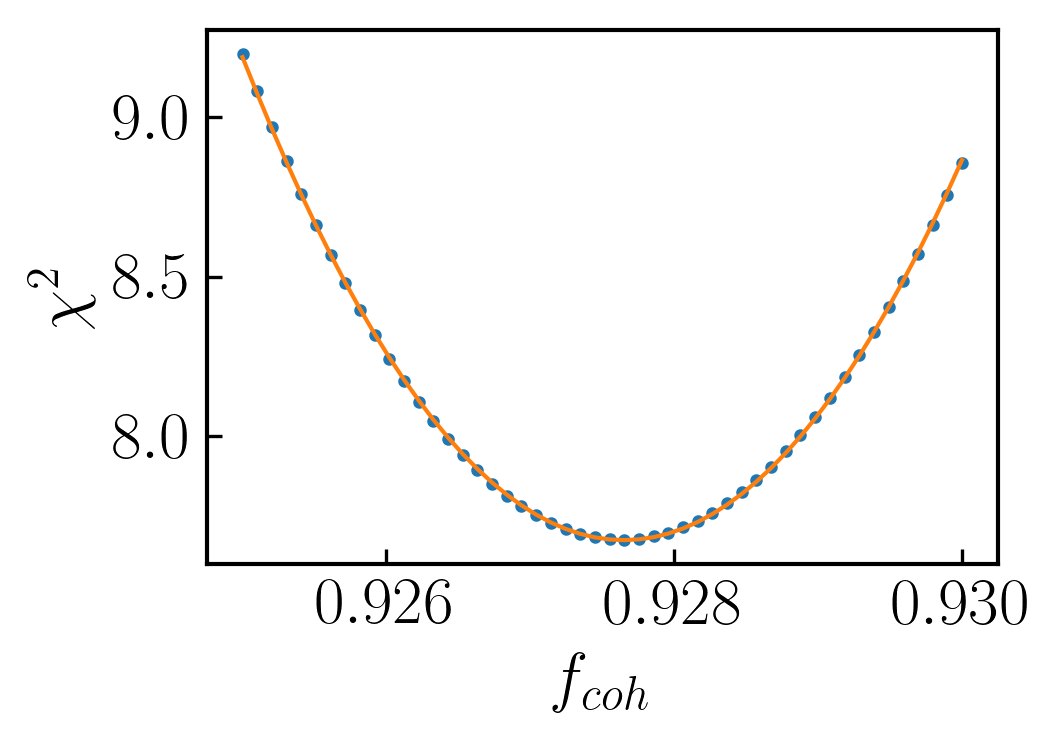

In [4]:
##############################
#############################
###### fitting f_coh #######
#############################
#############################

def parab(x, x0, x1, x2):
    return  x0+x1*x+x2*x**2


data=gn26
dataerr=gn26err

fcoh_min=0.925
fcoh_max=0.93
Npoint=50

fcoh=np.linspace(fcoh_min,fcoh_max,Npoint)
chisq=np.linspace(-2,-1,Npoint)
for i in range(Npoint):
    dev=0
    for n in range(6):
        diff=data[n]-(1+sum((np.math.factorial(n+1-p)*math.comb(n+1, p)**2-math.comb(n+1, p))*fcoh[i]**p*(1-fcoh[i])**(n+1-p) for p in range(n+1)))
        #print(diff)
        dev=dev+diff**2/dataerr[n]**2
    chisq[i]=dev

fit_res, cov = curve_fit(parab, 
                        fcoh, 
                        chisq,
                        p0=[0,0,1])    

plt.figure(figsize=[0.5*fig_width,0.5*fig_height])
plt.plot(fcoh,chisq,'o',markersize=2)
plt.plot(fcoh,fit_res[0]+fit_res[1]*fcoh+fit_res[2]*fcoh**2)
plt.xlabel(r'$f_{coh}$')
plt.ylabel(r'$\chi^2$')


# extract value of f_coh for which chi^2=1
fcoh0=-fit_res[1]/2/fit_res[2]

x = symbols('x')
expr = fit_res[0]+fit_res[1]*x+fit_res[2]*x**2-(fit_res[0]+fit_res[1]*fcoh0+fit_res[2]*fcoh0**2)-2
sol = solve(expr)


print("fcoh=",fcoh0)
print(-(sol[0]-fcoh0))
#print("error on fcoh=",np.sqrt(2*(fit_res[0]+fit_res[1]*(-fit_res[1]/2/fit_res[2])+fit_res[2]*(-fit_res[1]/2/fit_res[2])**2)))

## Load probability distribution data

In [5]:
##############################
######## DATA u=5
##############################

Nbin_UJ5=[ 0. , 1.,  2.,  3.,  4.,  5. , 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]
HistoN_UJ5=[0.008624781140000001 , 0.03698967675 , 0.08045558625 , 0.12644162783333335 , 0.15468501199999998 , 0.1510246755 , 0.13907933849999998 , 0.10752323783333334 ,
 0.0772418147 , 0.04903510621666667 , 0.030862504816666664 , 0.0181081872 ,0.009815930476666667 , 0.005485982953333333 , 0.002744175281666667 , 0.00110638647, 0.0003802113898333334, 
0.00027452403799999996 , 0.00012036670486666668 ]
err_HistoN_UJ5=[0.0005510544537322906 ,0.0007534591432095096 , 0.0015857586757318026 ,0.002187870055017162 , 0.0018637807830719643 , 0.0015318976459364297 , 0.0015938175577194897 , 0.0017217561997532665 ,
0.0014283164892756296 , 0.0012596526350327133 ,0.0014885171036567914 , 0.0009141087297326816 ,0.0003267488185264511 , 0.0002805204202430707 , 0.00016398030059472743 , 0.0003012608900018157, 9.032470718997646e-05, 
0.00018866253816853952 , 9.9149990540043685e-05]
Nmean_UJ5=5.35 # 5.3(2)


##############################
######## DATA u=95
##############################

Nbin_Mott=[0. ,1. ,2. ,3. ,4. ,5. ,6., 7]
HistoN_Mott=[0.6603749061666666 ,0.24536636033333334 ,0.06556986863333333 ,0.018813964483333334 ,0.005951304496666667 ,0.0024134634433333334 ,0.0009070221001666667, 0.0003876553563333333]
err_HistoN_Mott=[0.01952576925652685 ,0.008668338751704124 ,0.006178250511219853 ,0.0030298244394498706 ,0.0014106025833287045,0.0007874134594569809 ,0.0002934736533096364, 0.0001845334113831439]
Nmean_Mott=0.46  # 0.17(1)


##############################
######## DATA u=24
##############################

Nbin_UJ24=[ 0.,  1.,  2. , 3. , 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14. ,15. ,16. ,17.,18.]
HistoN_UJ24=[5.52941176e-01, 1.70564028e-01 ,8.23045267e-02 ,5.17066086e-02,
 3.84410554e-02 ,2.69668361e-02, 2.33841685e-02, 1.63640765e-02,
 1.16678770e-02 ,8.90825466e-03, 6.05180344e-03, 4.01839748e-03,
 2.46913580e-03 ,1.69450496e-03, 1.35560397e-03, 4.84144275e-04,
 4.84144275e-04 ,1.93657710e-04, 0.00000000e+00]
Nmean_UJ24=1.4
g2_UJ24=3.7

## Plots of correlation magnitudes

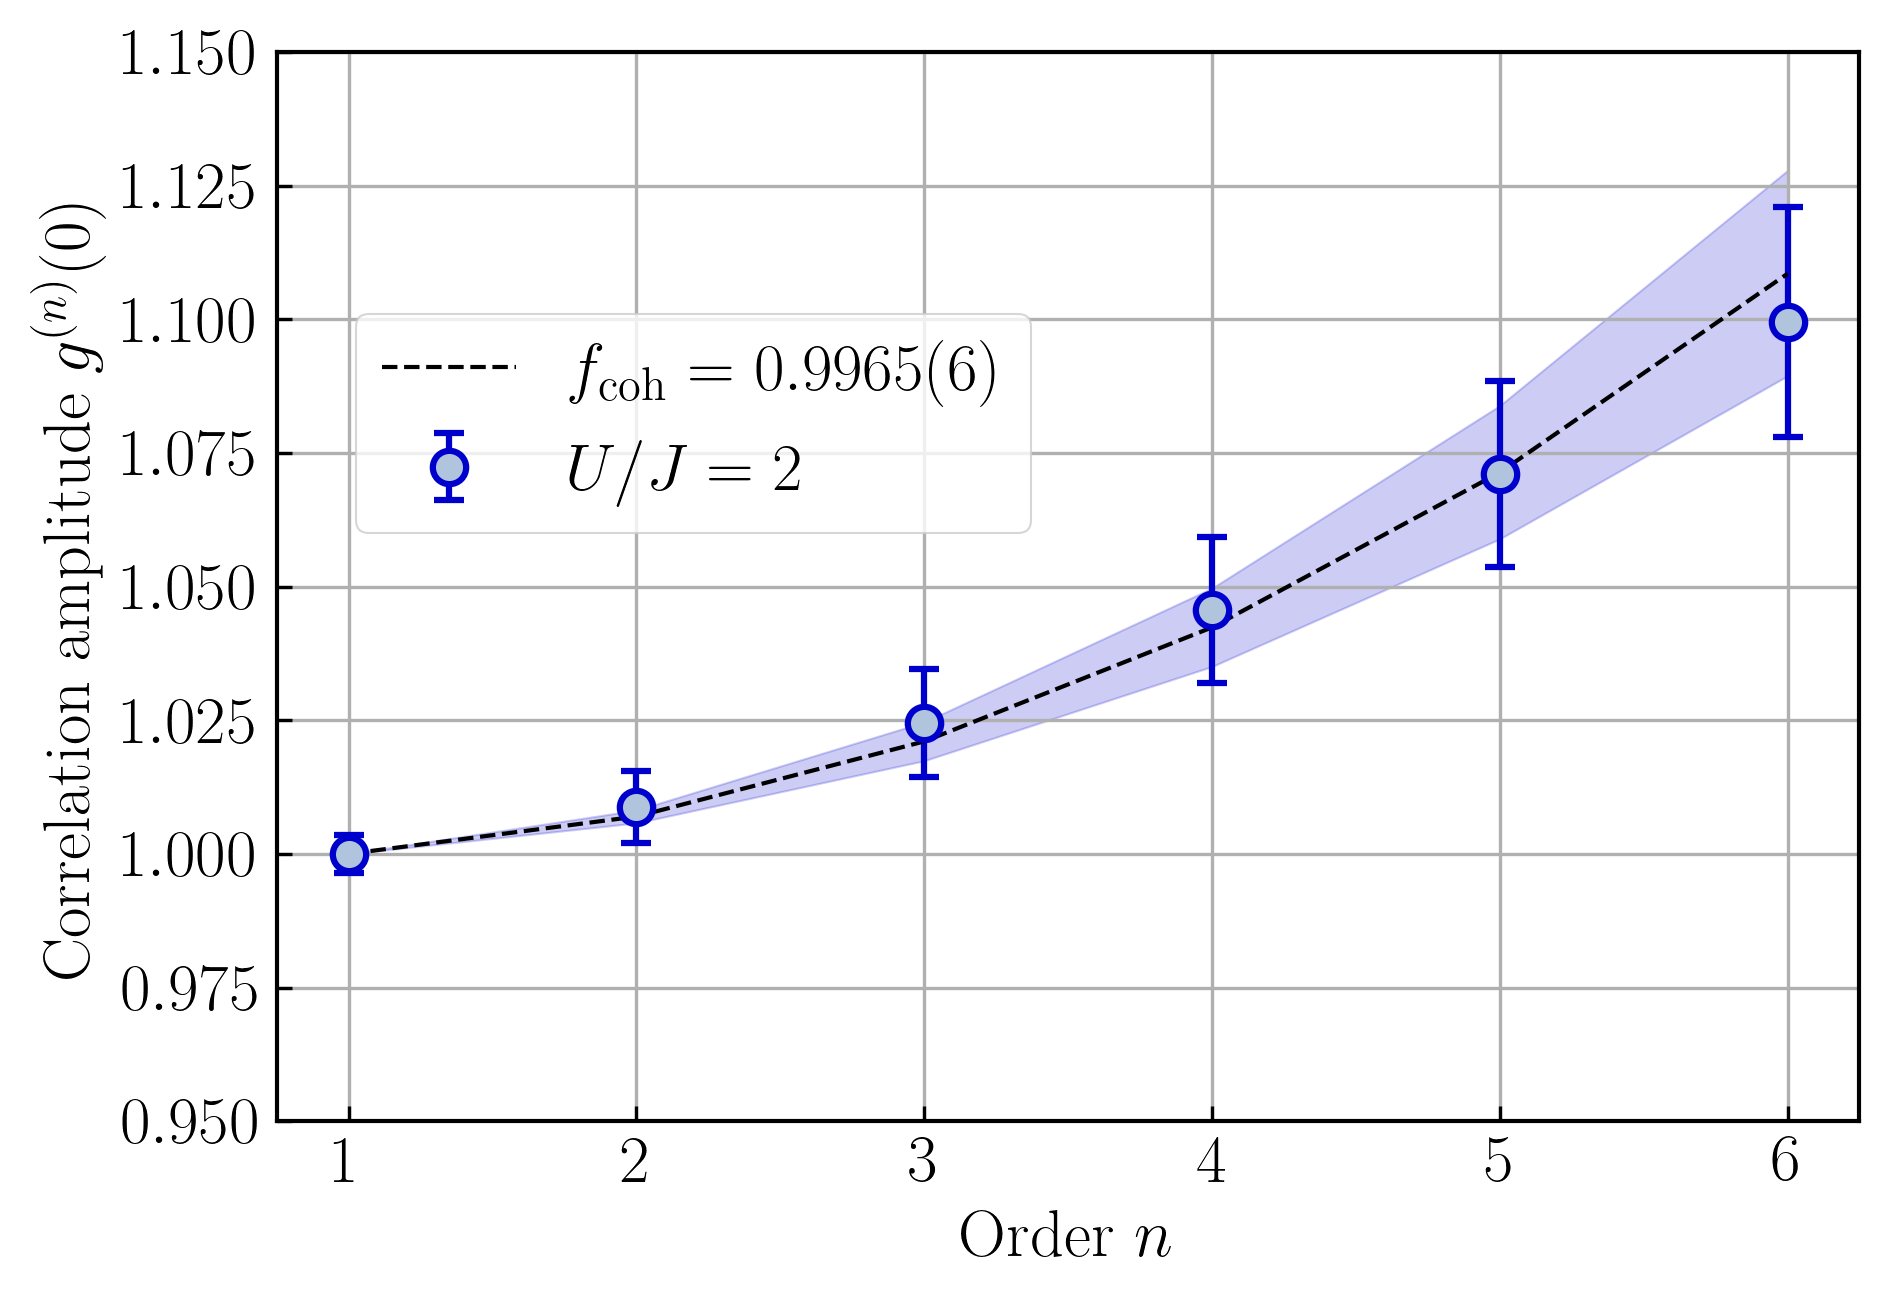

In [6]:
# DATA u=2

fc=0.9965;
gn2th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9959;
gn2th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5,  
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9971;
gn2th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.errorbar(xn,gn2,yerr=gn2err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=2$')
plt.plot(xnth,gn2th,'--',color='black',label=r'$f_{\rm coh}=0.9965(6)$')
plt.fill_between(xnth,gn2th1, gn2th2,color='mediumblue',alpha=.2)

plt.ylim(0.95,1.15)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.55])

plt.savefig('Fig-Coherence-BEC-u5.pdf', dpi=300,bbox_inches='tight')

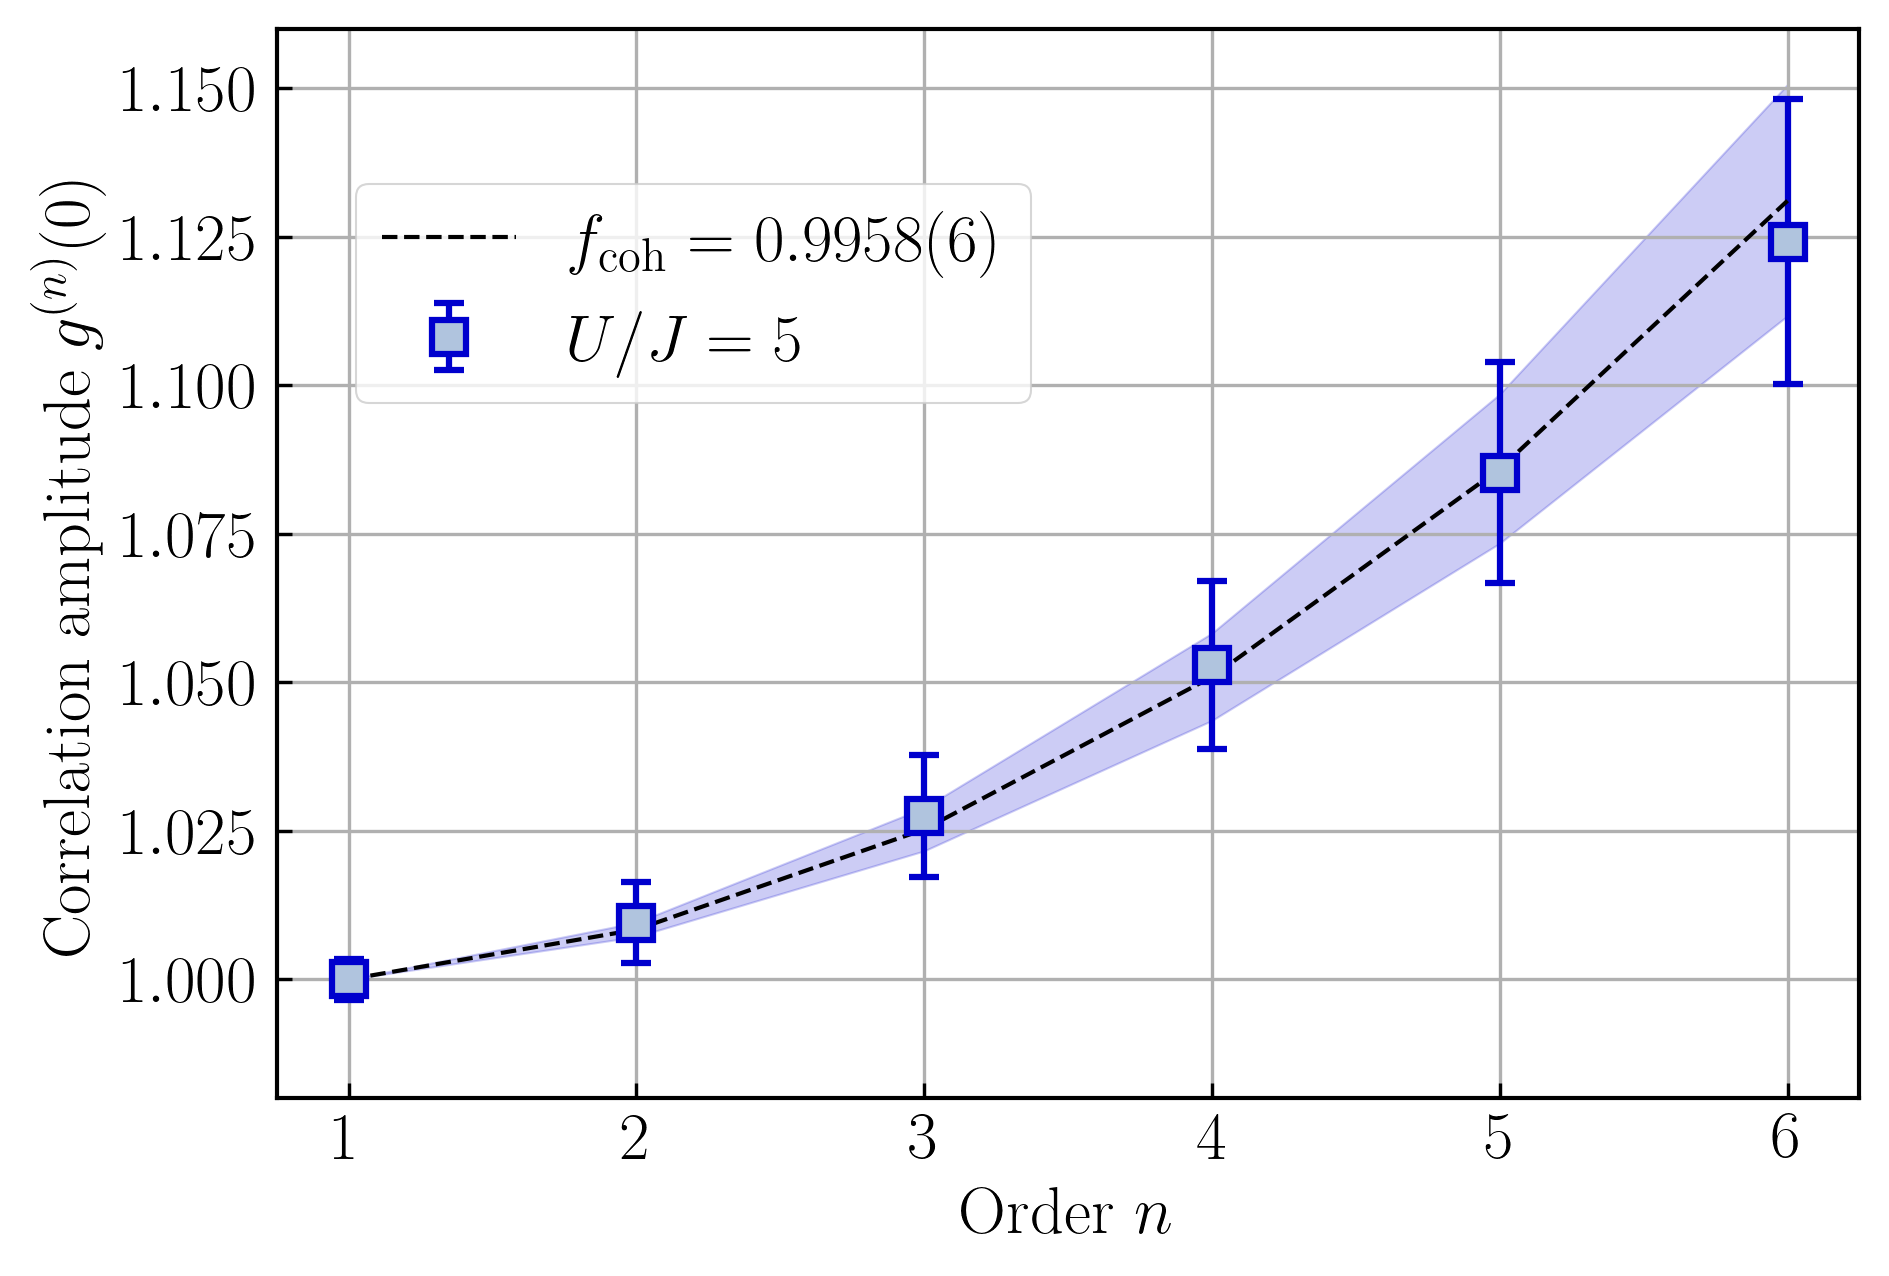

In [7]:
# DATA u=5

fc=0.9958;
gn5th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9952;
gn5th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5,  
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]


fc=0.9964;
gn5th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]


fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.errorbar(xn,gn5,yerr=gn5err, marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=5$')
plt.plot(xnth,gn5th,'--',color='black',label=r'$f_{\rm coh}=0.9958(6)$')
plt.fill_between(xnth,gn5th1, gn5th2,color='mediumblue',alpha=.2)

#plt.errorbar(xn,gnUJ5_shuffle,yerr=err_gnUJ5_shuffle, marker='.',markersize=15,capsize=2,elinewidth=1.5,
#             capthick=1.5, 
#             linestyle='none',         color='orange',
#        markeredgecolor='orange',
#        markerfacecolor='bisque',
#             markeredgewidth=1.5,lw=1.5,label='randomized')

plt.ylim(0.98,1.16)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.65])

plt.savefig('Fig-Coherence-BEC-u5.pdf', dpi=300,bbox_inches='tight')

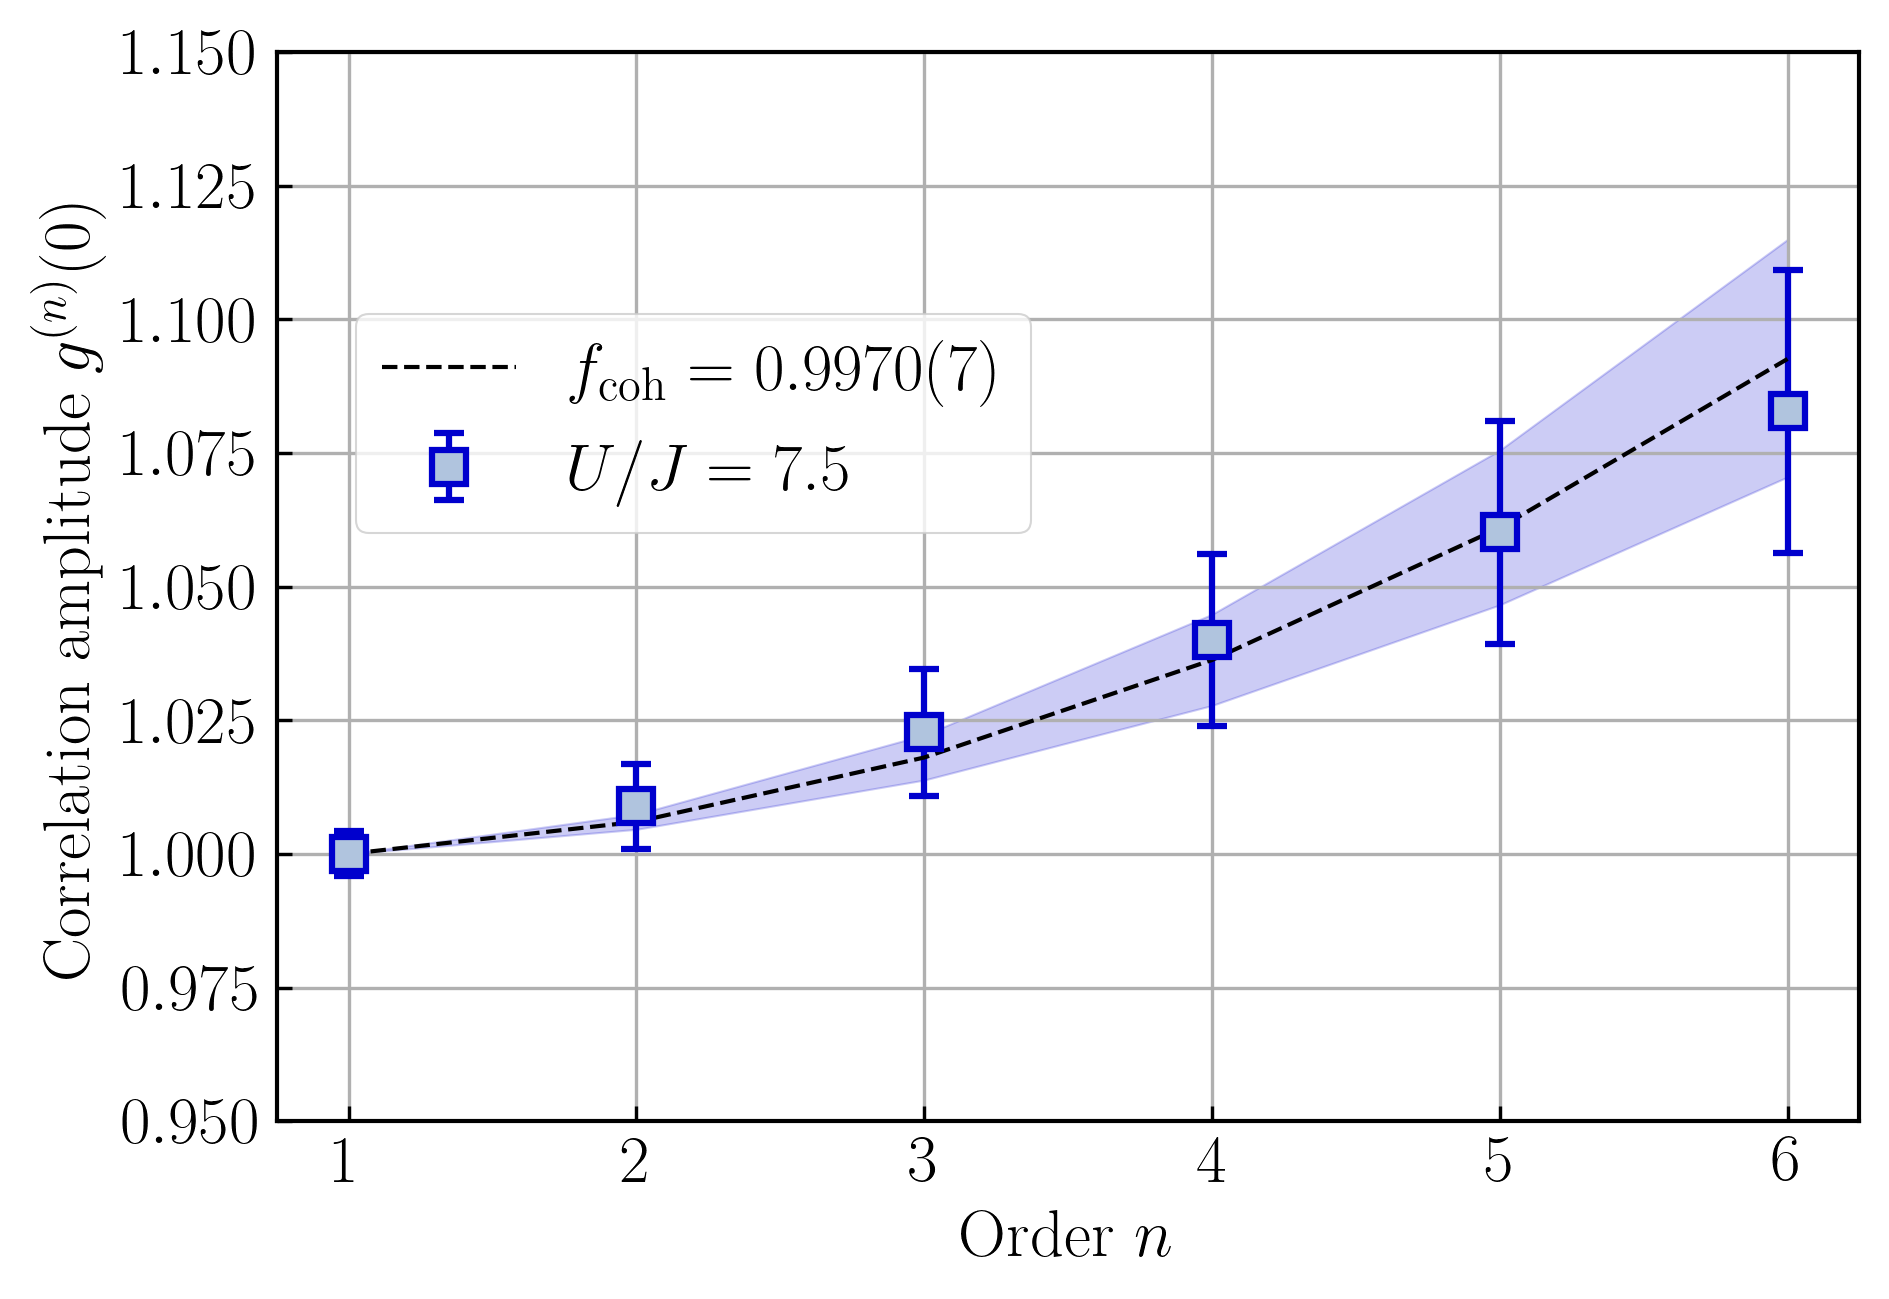

In [8]:
# DATA u=7.5

fc=0.997;
gn7th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9963;
gn7th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5,  
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9977;
gn7th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.errorbar(xn,gn7,yerr=gn7err, marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=7.5$')
plt.plot(xnth,gn7th,'--',color='black',label=r'$f_{\rm coh}=0.9970(7)$')
plt.fill_between(xnth,gn7th1, gn7th2,color='mediumblue',alpha=.2)

plt.ylim(0.95,1.15)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.55])

#plt.savefig('Fig-Coherence-BEC-u7p5.pdf', dpi=300,bbox_inches='tight')

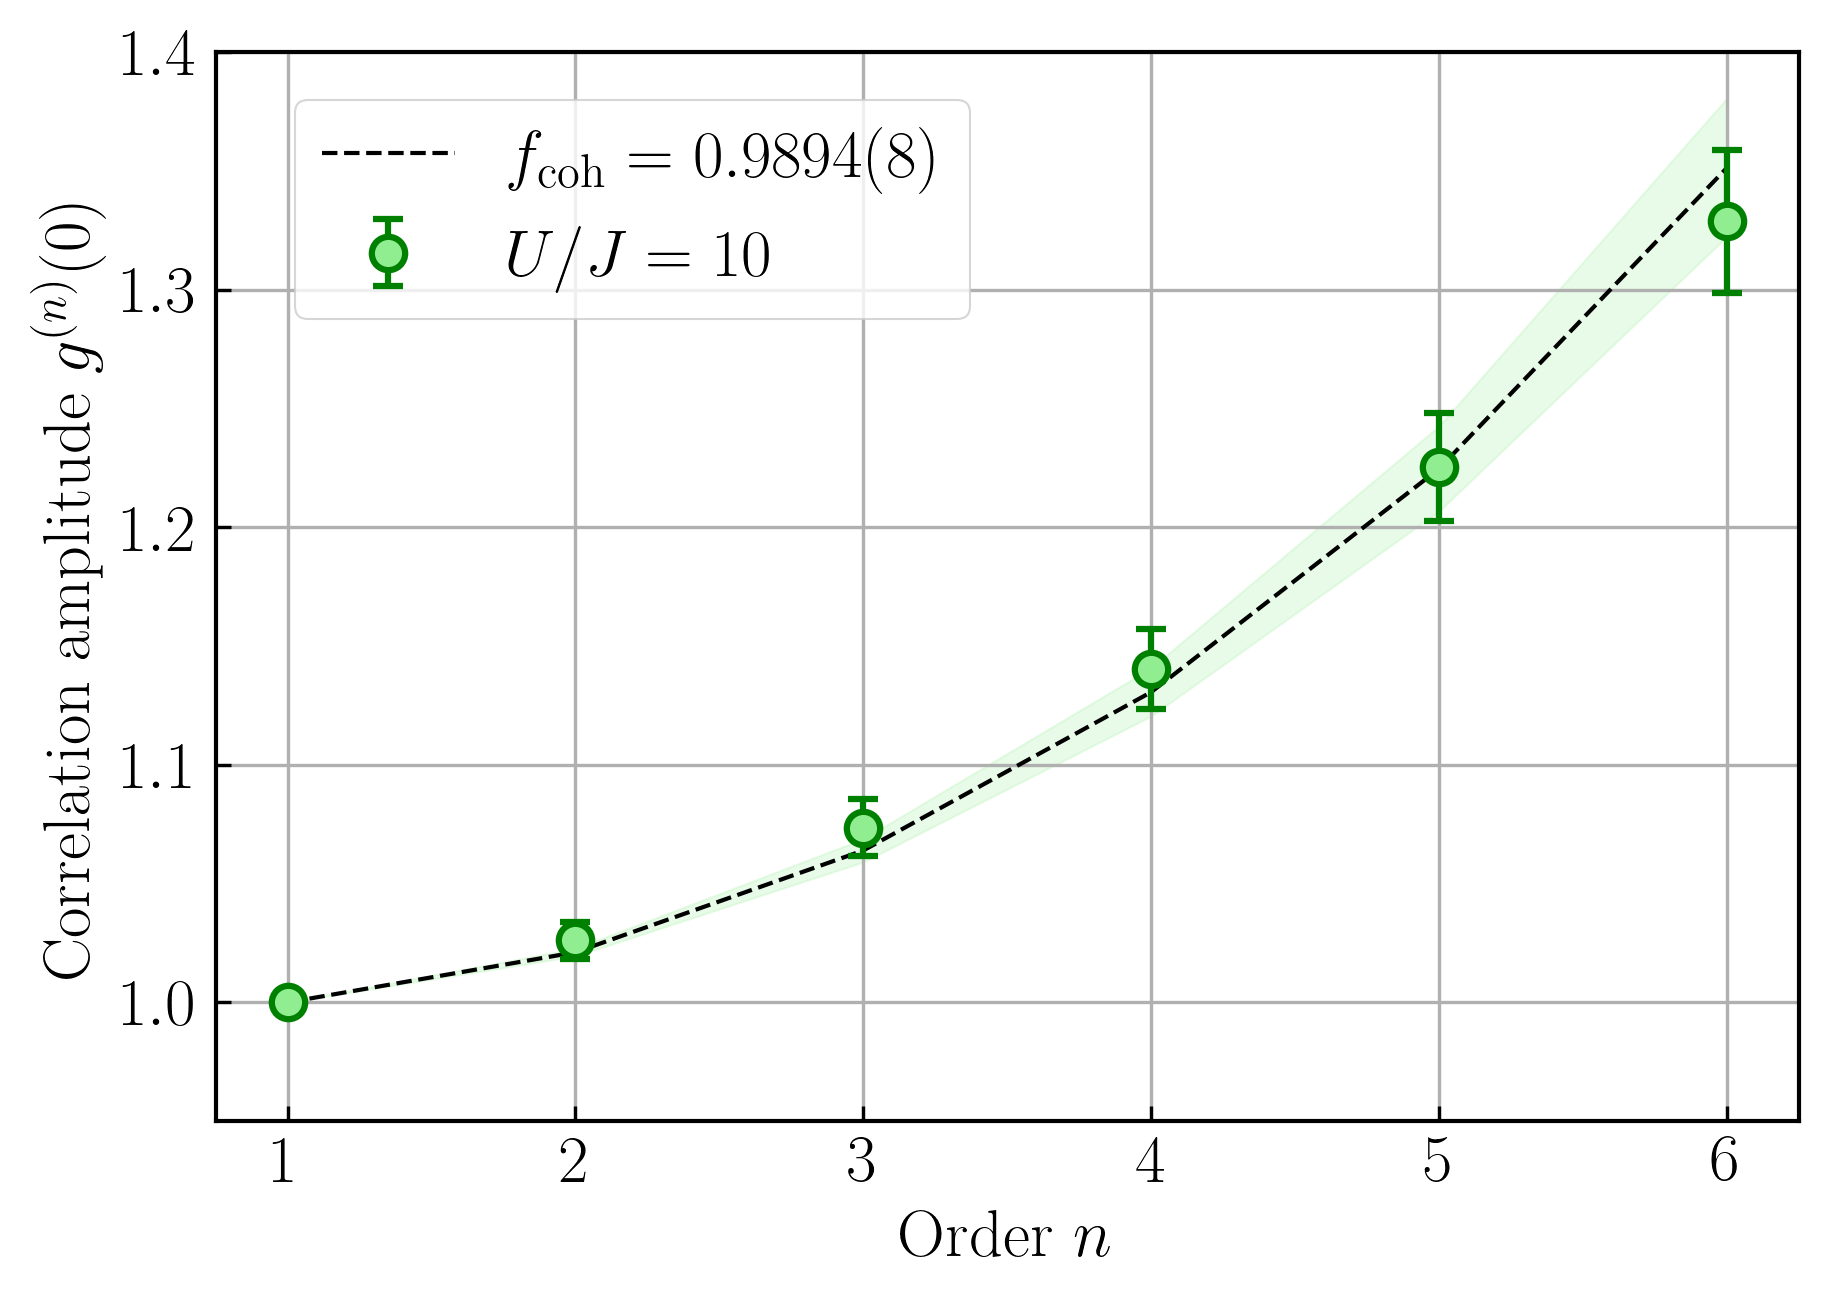

In [9]:
#DATA u=10

fc=0.9894;
gn10th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9902;
gn10th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9886;
gn10th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]


fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn10th,'--',color='black',label=r'$f_{\rm coh}=0.9894(8)$')
plt.fill_between(xnth,gn10th1, gn10th2,color='lightgreen',alpha=.2)

plt.errorbar(xn,gn10,yerr=gn10err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=10$')

plt.ylim(0.95,1.4)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.75])

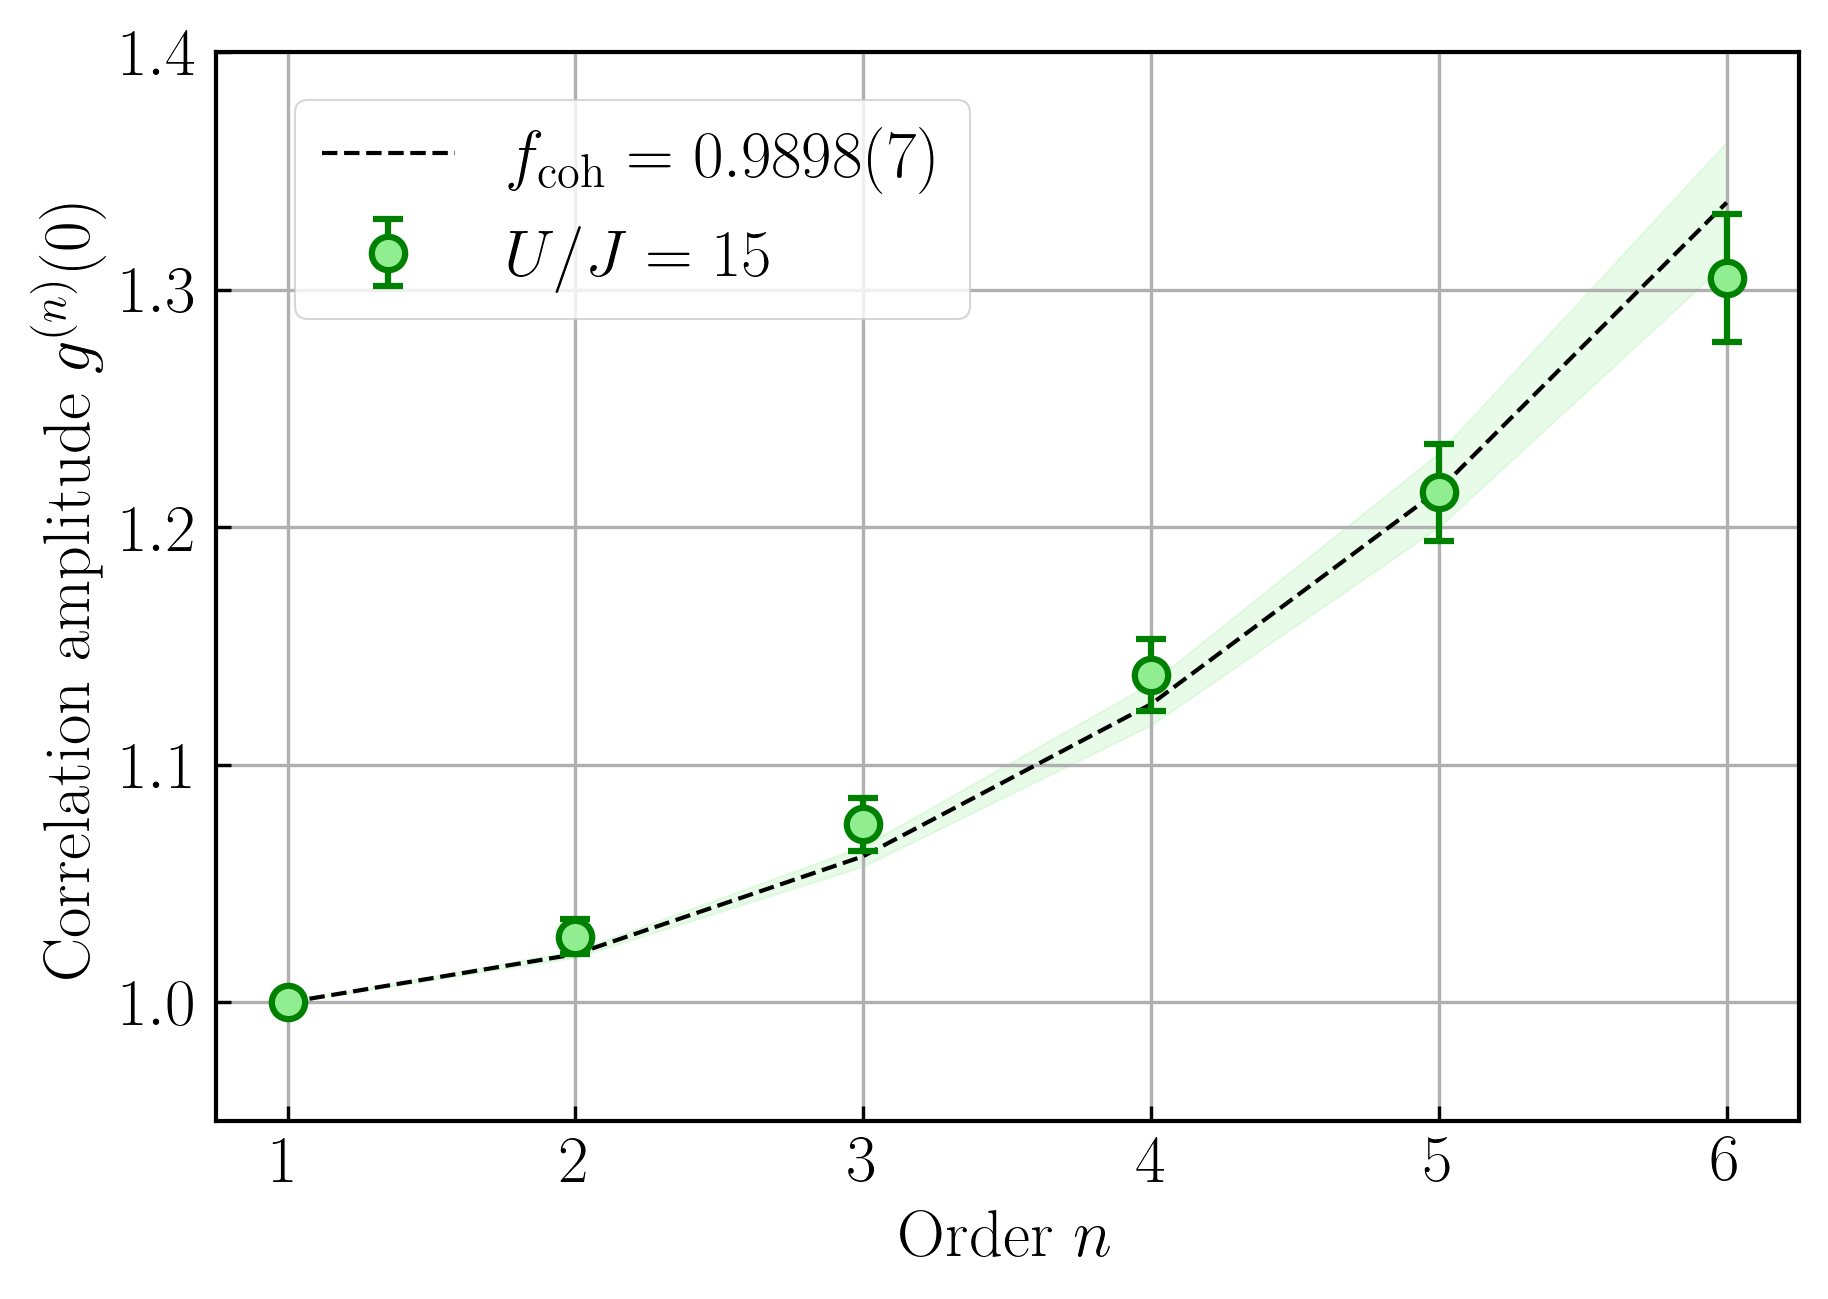

In [10]:
#DATA u=15

fc=0.9898;
gn15th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9905;
gn15th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.9891;
gn15th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]


fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn15th,'--',color='black',label=r'$f_{\rm coh}=0.9898(7)$')
plt.fill_between(xnth,gn15th1, gn15th2,color='lightgreen',alpha=.2)

plt.errorbar(xn,gn15,yerr=gn15err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=15$')

plt.ylim(0.95,1.4)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.75])

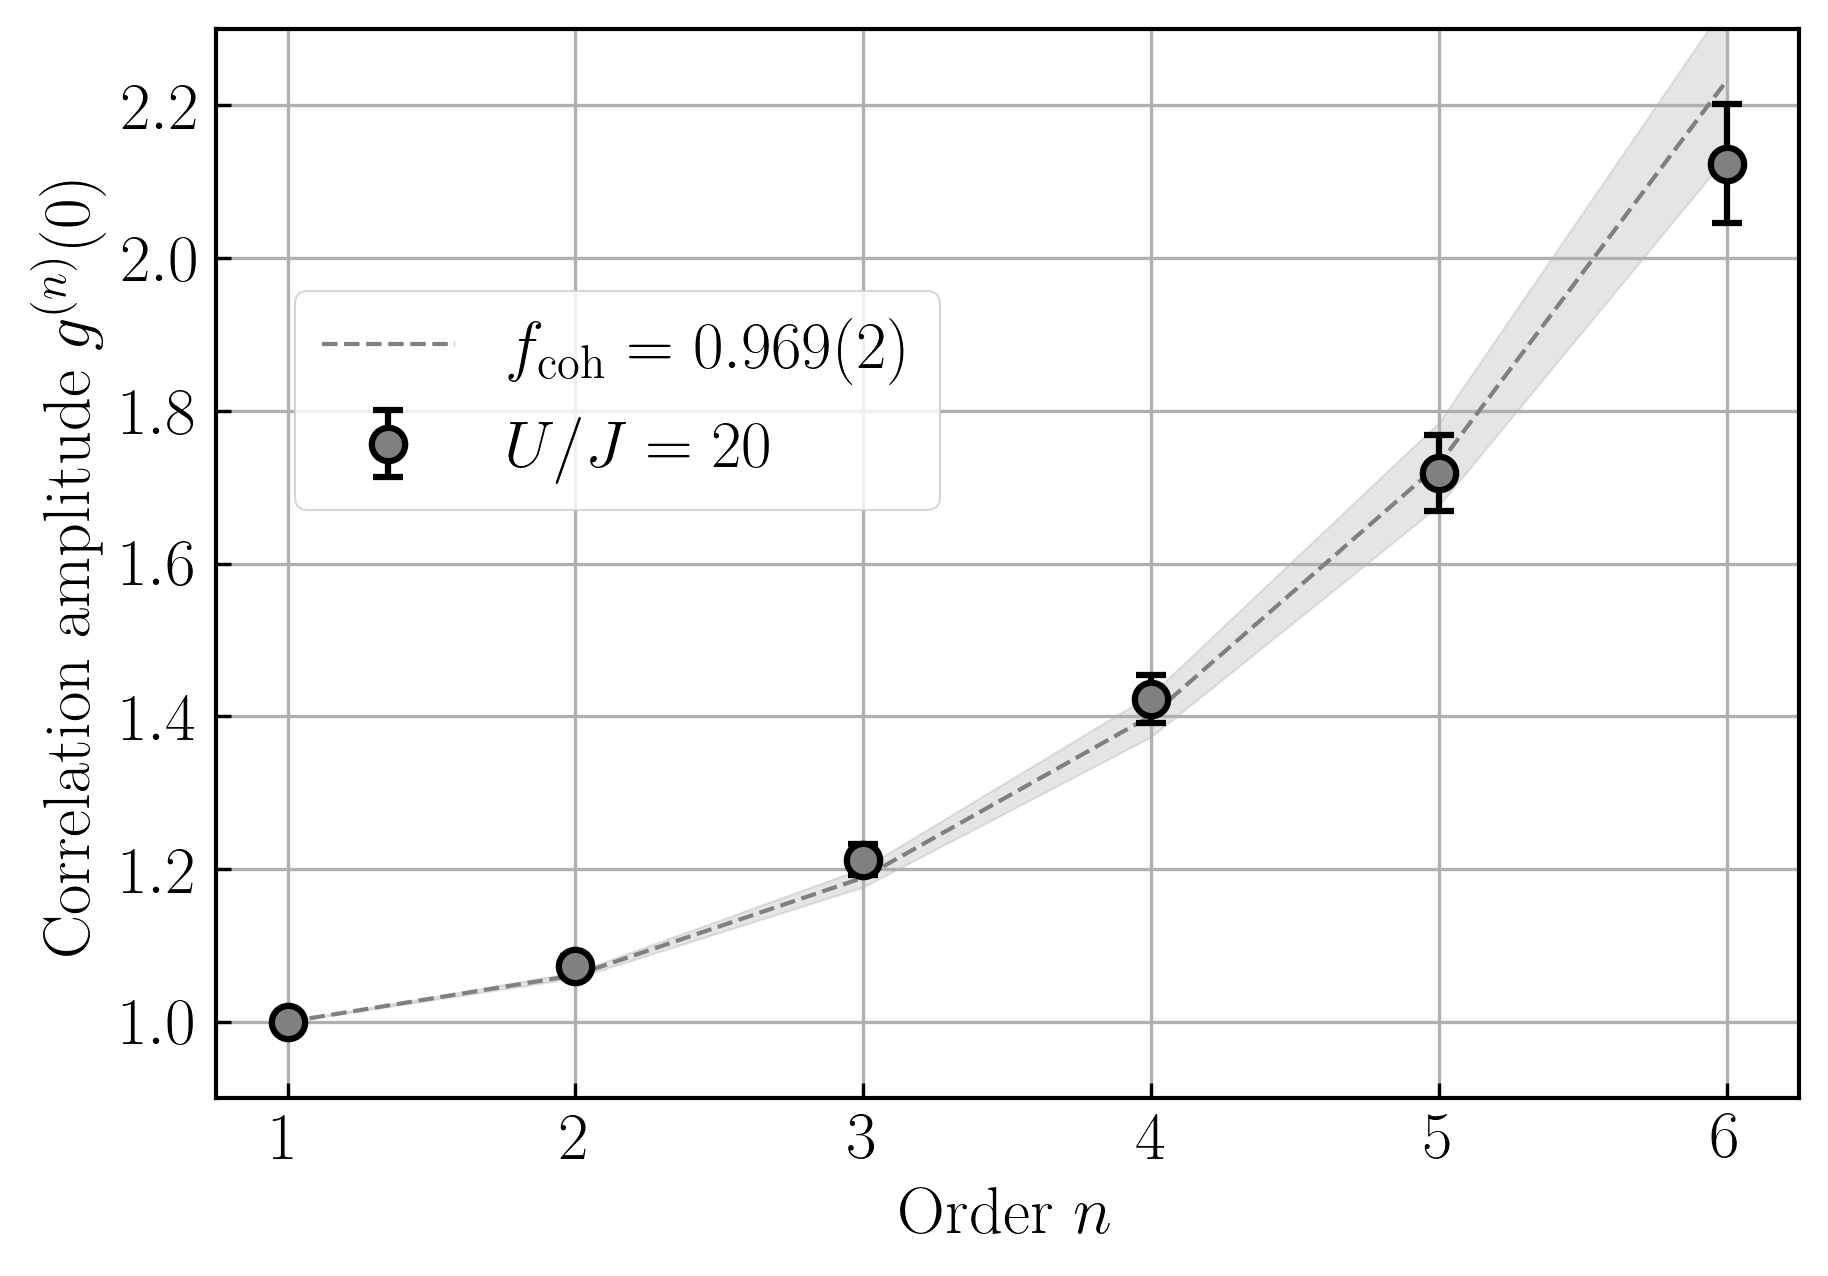

In [11]:
# DATA u=20

fc=0.969
gn20th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.971;
gn20th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.967;
gn20th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])


plt.fill_between(xnth,gn20th1, gn20th2,color='gray',alpha=.2)
plt.plot(xnth,gn20th,'--',color='gray',label=r'$f_{\rm coh}=0.969(2)$')


plt.errorbar(xn,gn20,yerr=gn20err,  
            marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=20$')


plt.ylim(0.9,2.3)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.55])

plt.savefig('Fig-Coherence-BEC-u20.pdf', dpi=300,bbox_inches='tight')

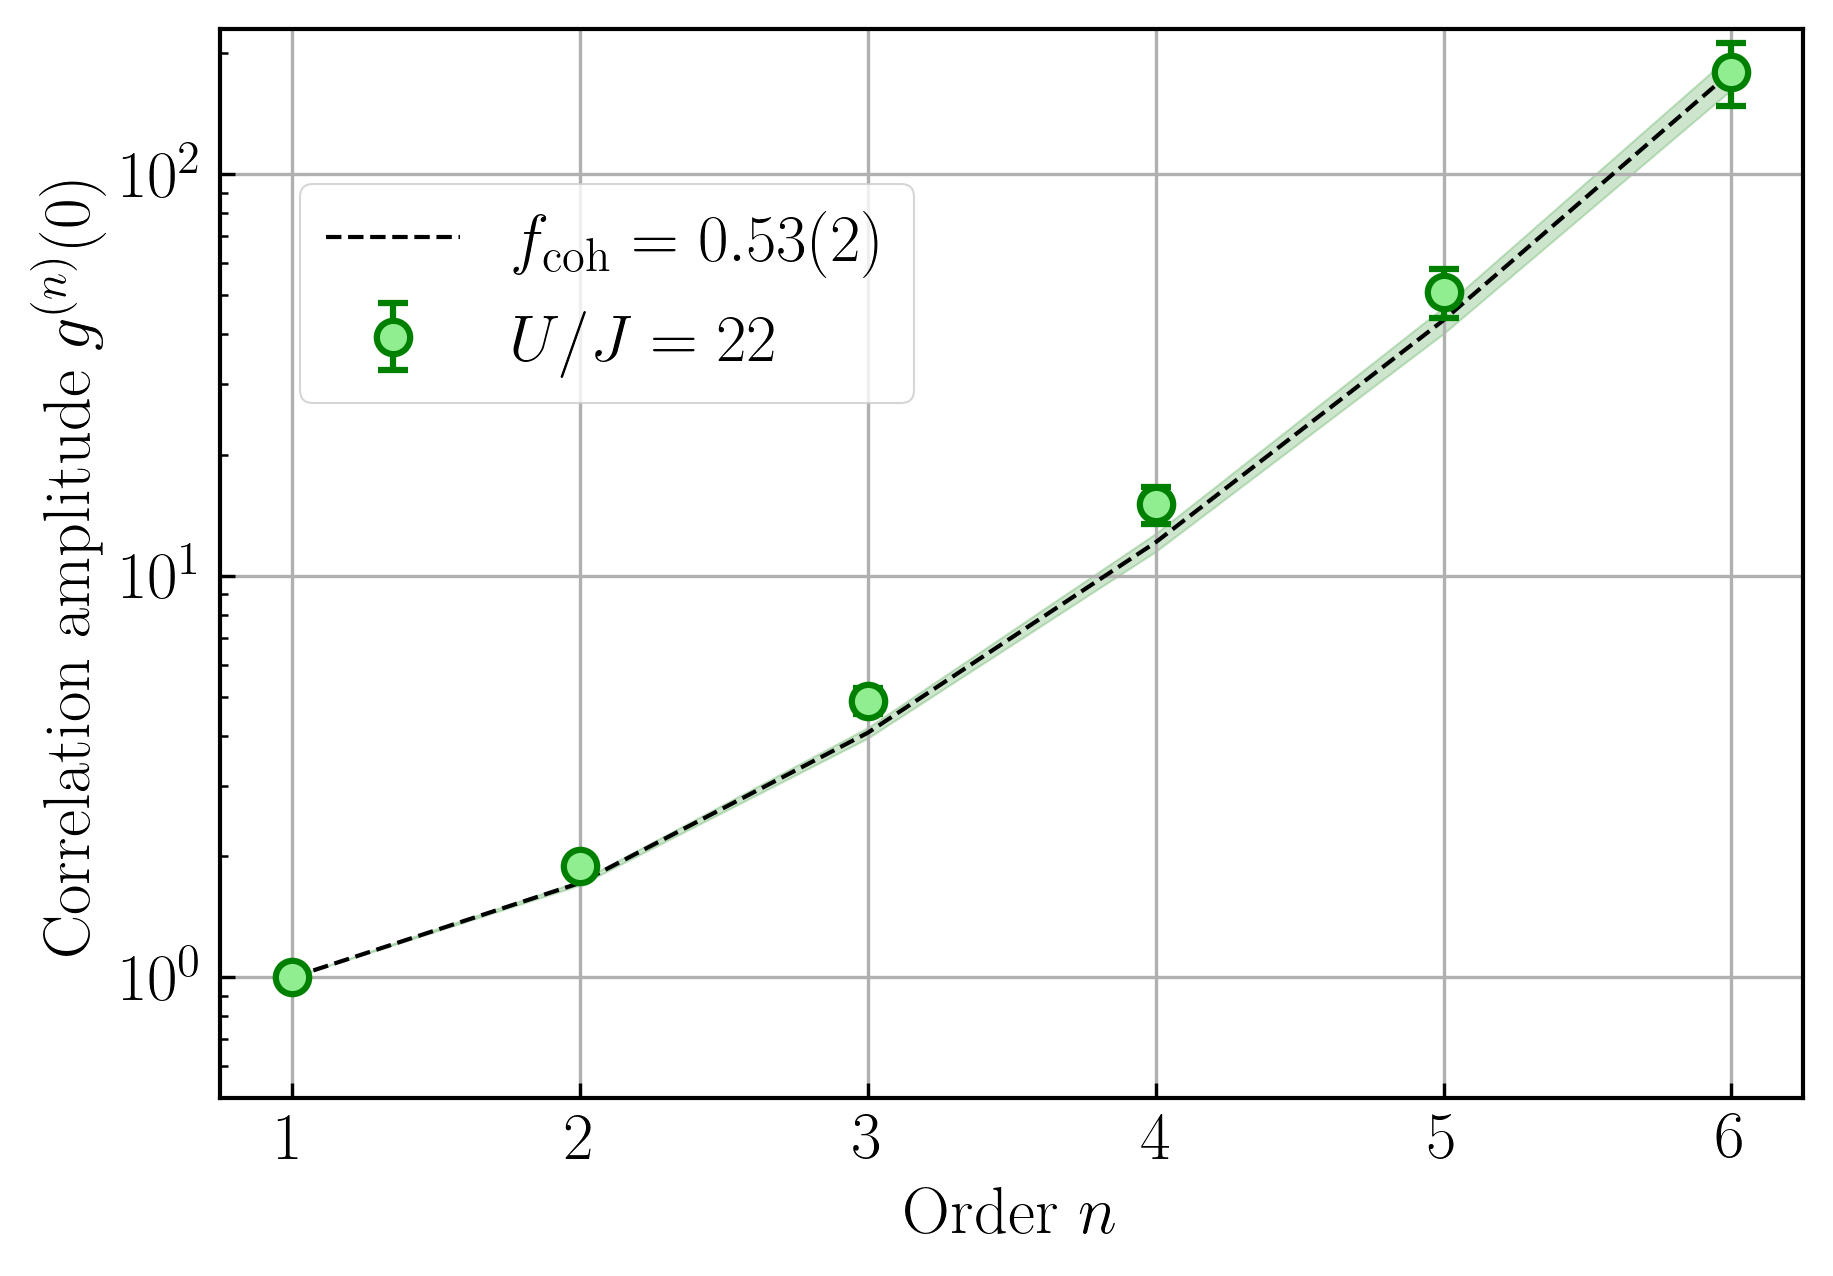

In [12]:
# DATA u=22
 
fc=0.53;
gn22th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.55;
gn22th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.51;
gn22th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn22th,'--',color='black',label=r'$f_{\rm coh}=0.53(2)$')
plt.fill_between(xn,gn22th1, gn22th2,color='green',alpha=.2)

plt.errorbar(xn,gn22,yerr=gn22err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=22$')

plt.ylim(0.5,230)
plt.grid(True)
plt.semilogy()
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.65])

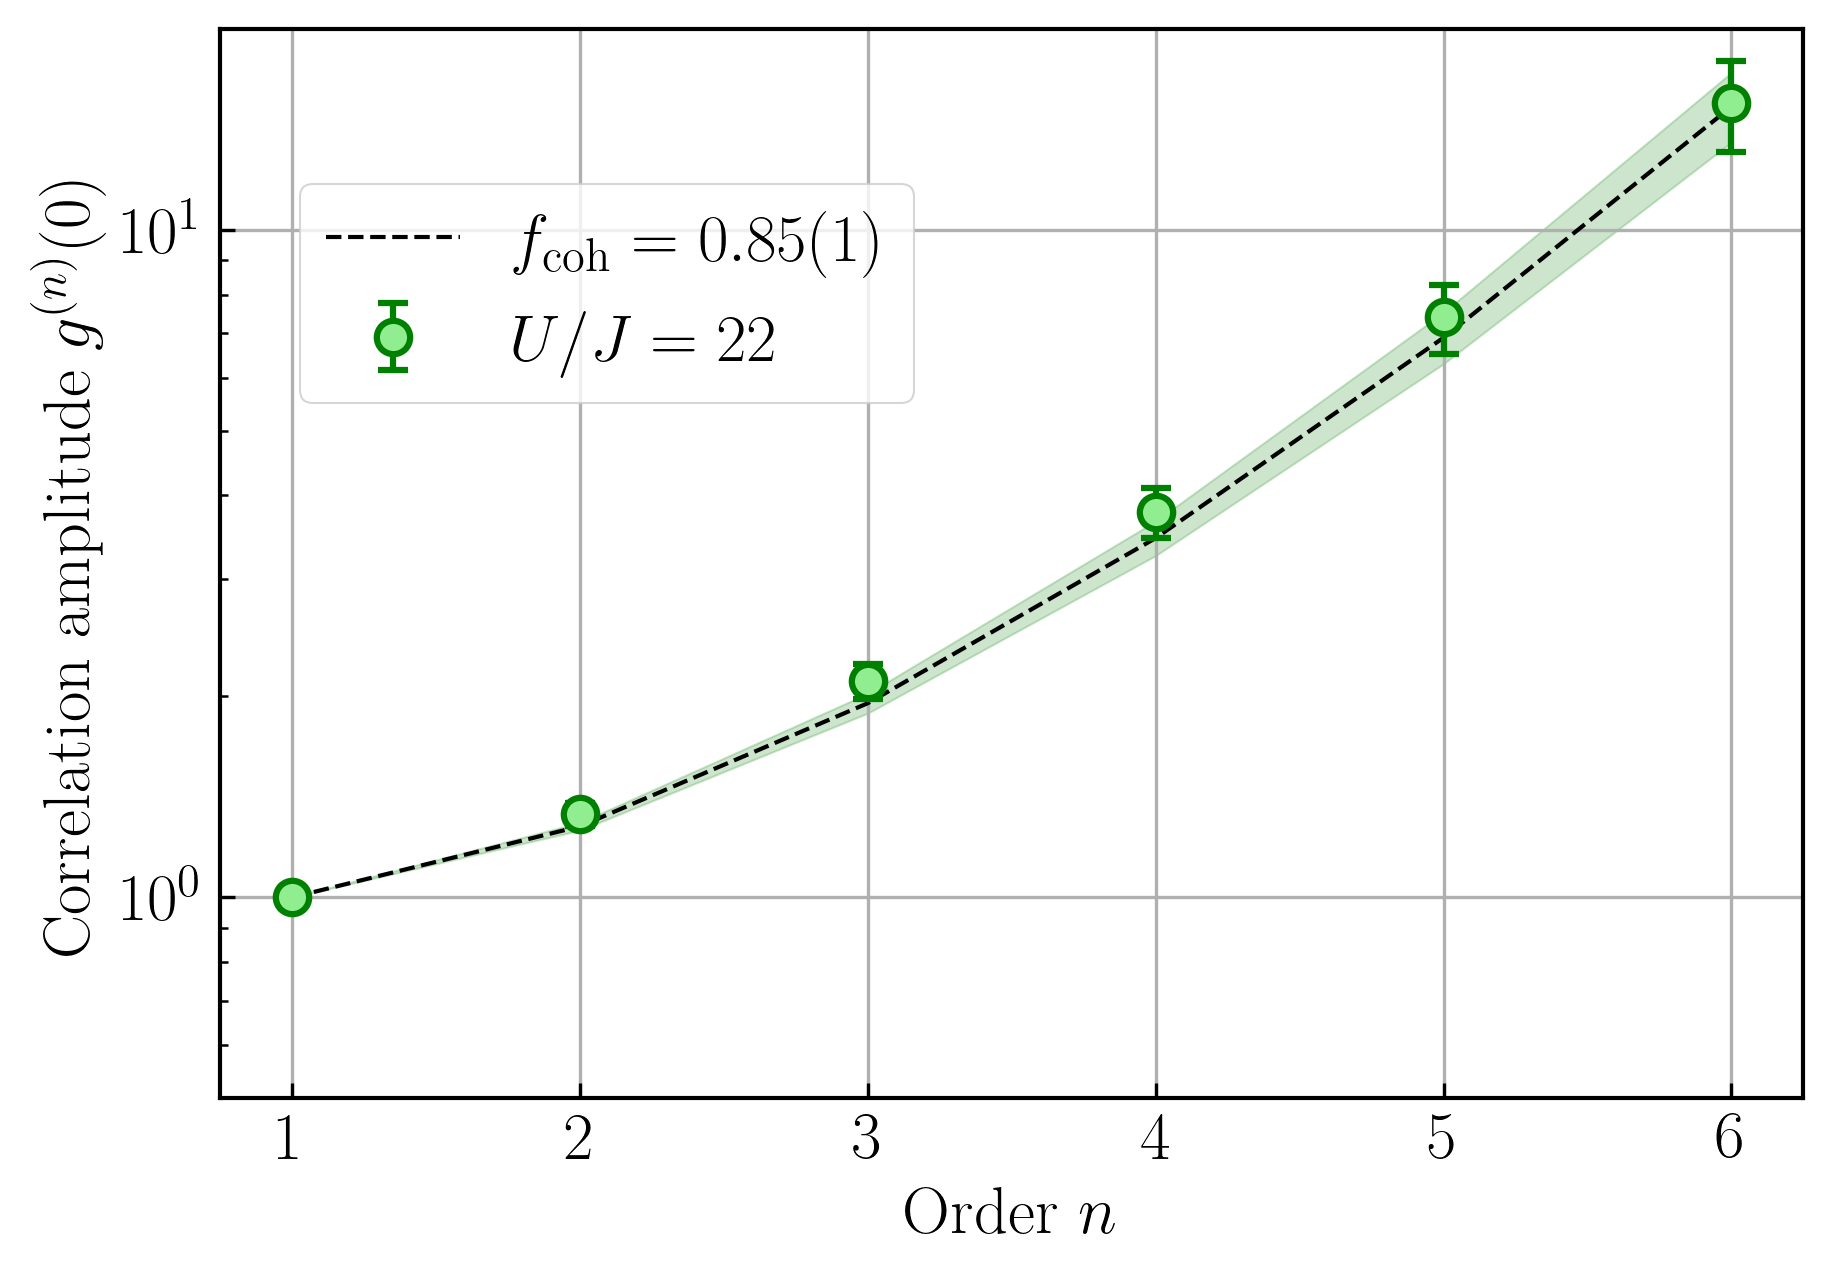

In [13]:
# DATA u=22

fc=0.85;
gn22th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.84;
gn22th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.86;
gn22th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn22th,'--',color='black',label=r'$f_{\rm coh}=0.85(1)$')
plt.fill_between(xn,gn22th1, gn22th2,color='green',alpha=.2)

plt.errorbar(xn,gn22_2,yerr=gn22err_2,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=22$')

plt.ylim(0.5,20)
plt.grid(True)
plt.semilogy()
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.65])

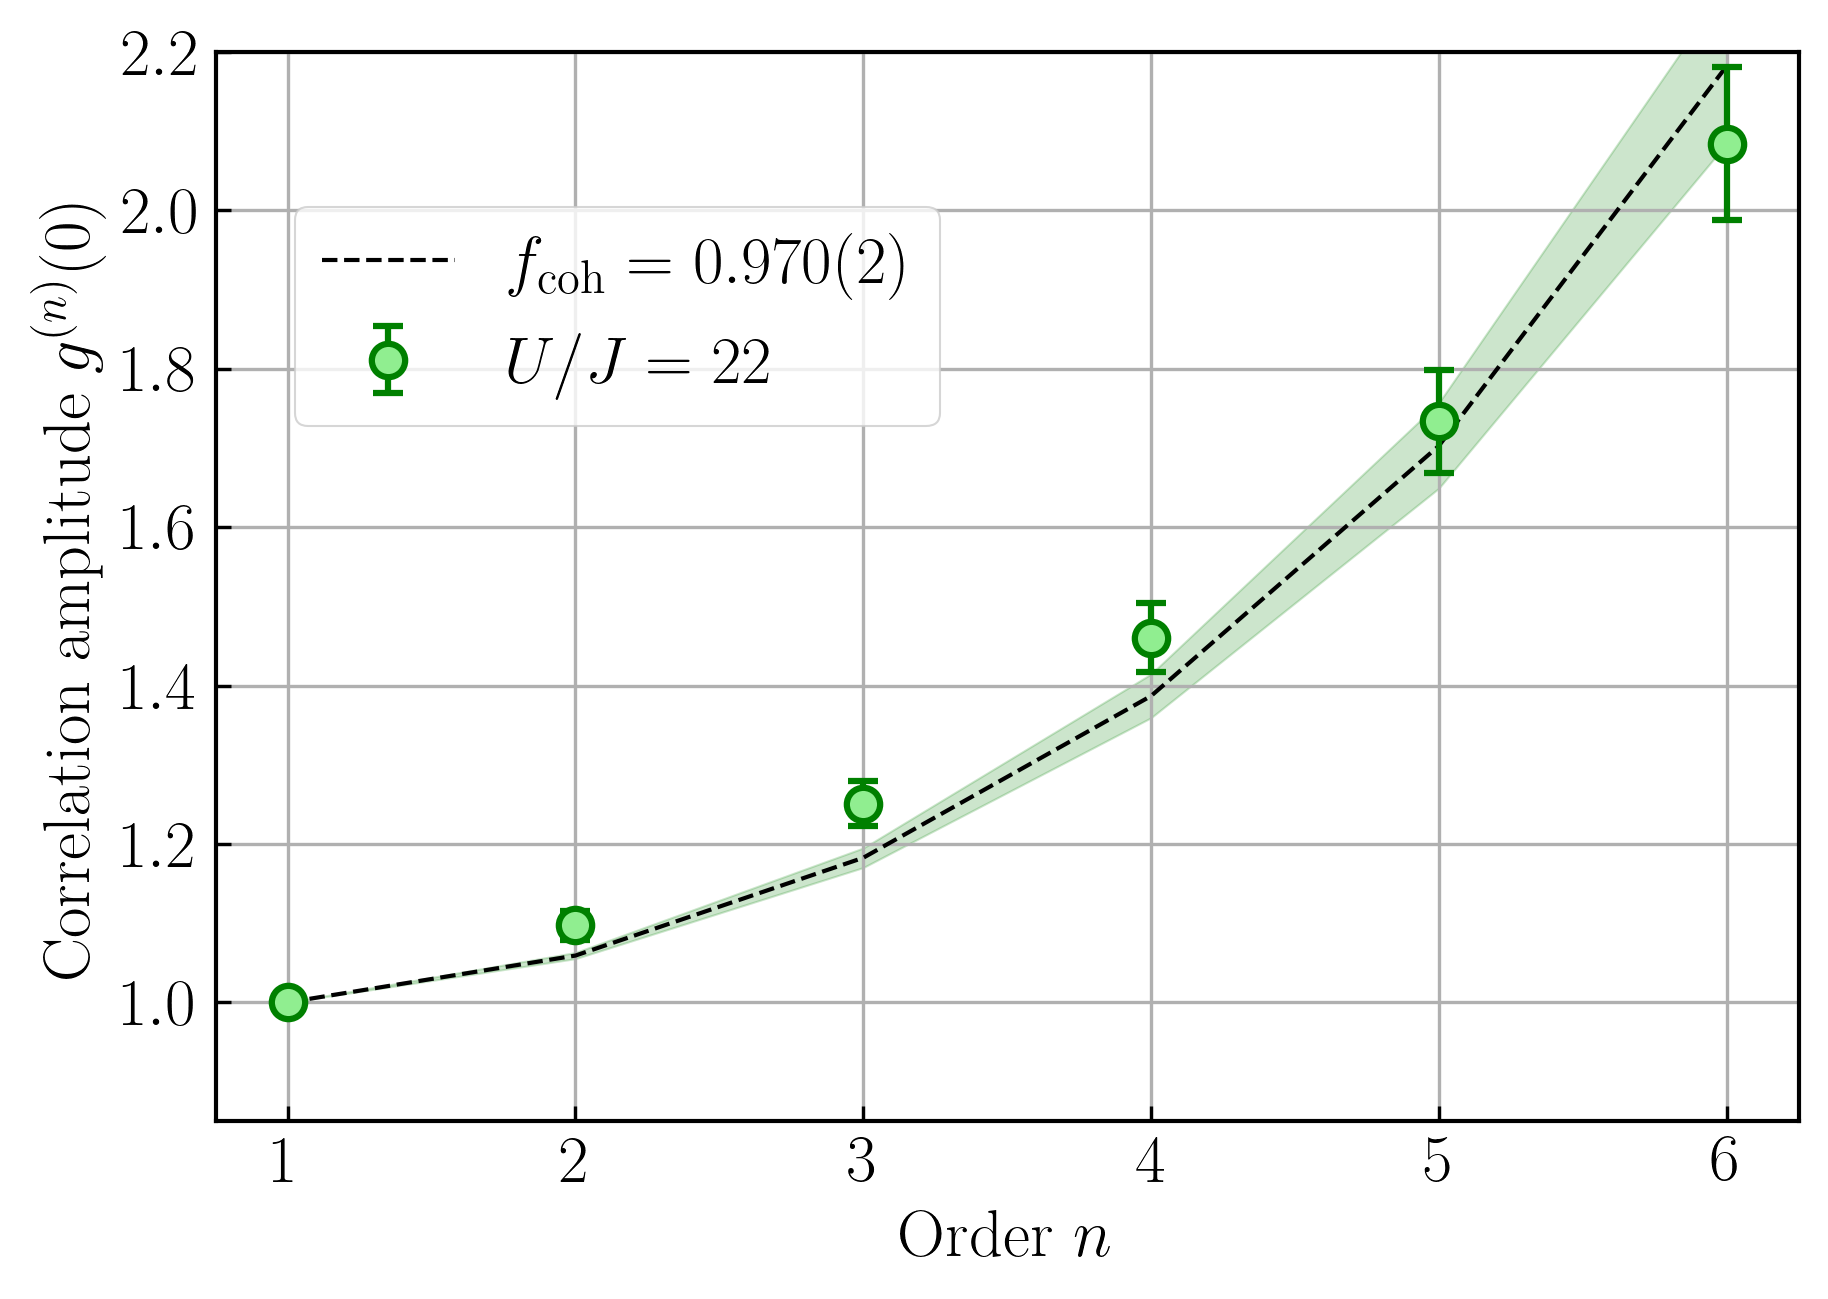

In [14]:
# DATA u=22

fc=0.97;
gn22th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.972;
gn22th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.968;
gn22th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn22th,'--',color='black',label=r'$f_{\rm coh}=0.970(2)$')
plt.fill_between(xn,gn22th1, gn22th2,color='green',alpha=.2)

plt.errorbar(xn,gn22_3,yerr=gn22err_3,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=22$')

plt.ylim(0.85,2.2)
plt.grid(True)
#plt.semilogy()
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.65])

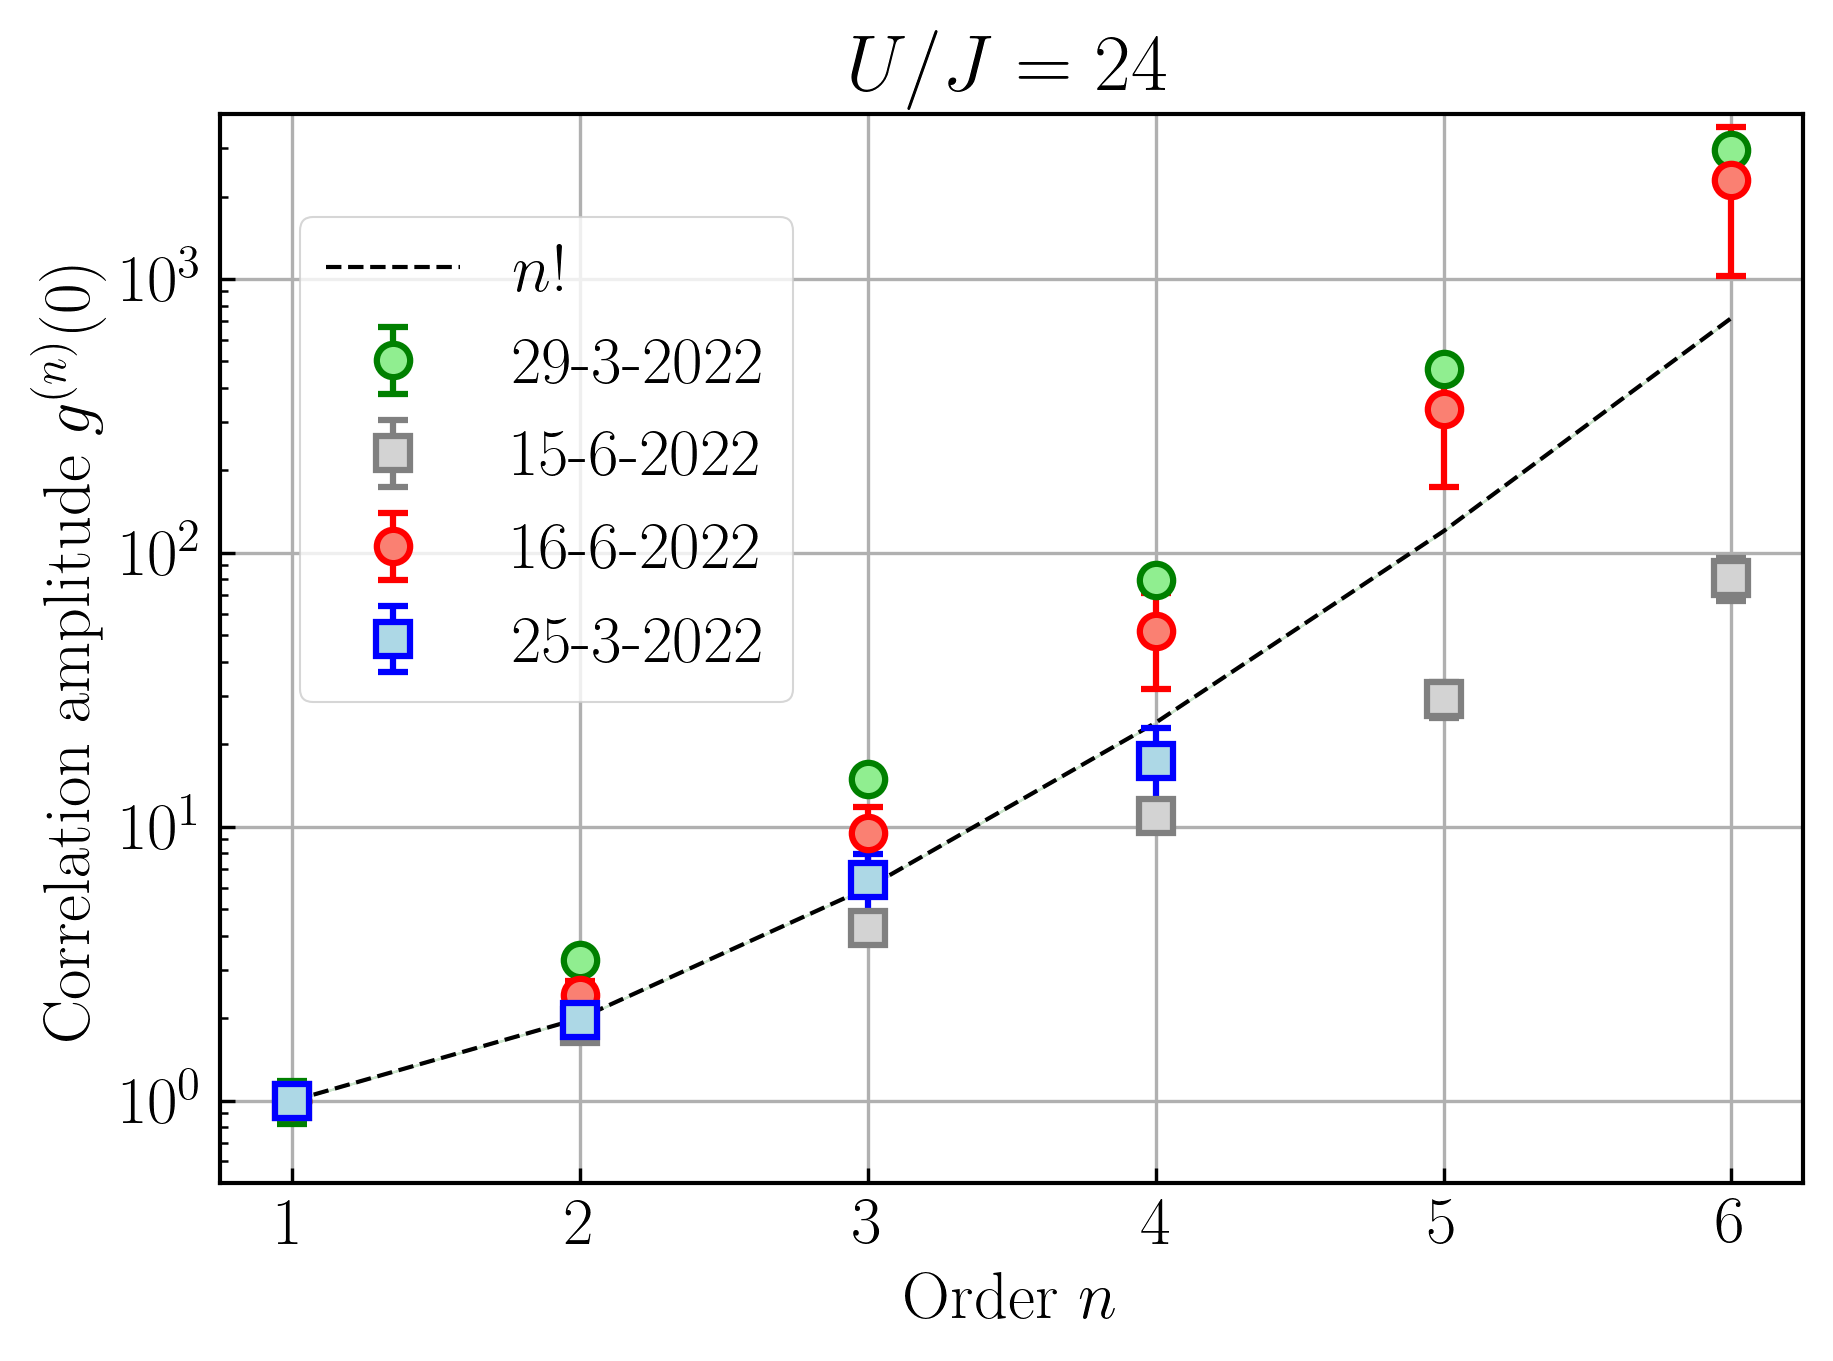

In [15]:
# DATA u=24

fc=0.;
gn24th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0;
gn24th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.;
gn24th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn24th,'--',color='black',label=r'$n!$')
plt.fill_between(xn,gn24th1, gn24th2,color='green',alpha=.2)

plt.errorbar(xn,gn24_290322,yerr=gn24err_290322,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label='29-3-2022')

plt.errorbar(xn,gn24_150622,yerr=gn24err_150622,  
             marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='gray',
             markeredgecolor='gray',markerfacecolor='lightgray',
             markeredgewidth=1.5,lw=1.5,label='15-6-2022')
plt.errorbar(xn,gn24_160622,yerr=gn24err_160622,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='red',
             markeredgecolor='red',markerfacecolor='salmon',
             markeredgewidth=1.5,lw=1.5,label='16-6-2022')

plt.errorbar(xn,gn24_250322,yerr=gn24err_250322,  
             marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='blue',
             markeredgecolor='blue',markerfacecolor='lightblue',
             markeredgewidth=1.5,lw=1.5,label='25-3-2022')

plt.ylim(0.5,4000)
plt.grid(True)
plt.semilogy()
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.45])
plt.title(r'$U/J=24$')

plt.savefig('Fig-Coherence-BEC-u24.pdf', dpi=300,bbox_inches='tight')

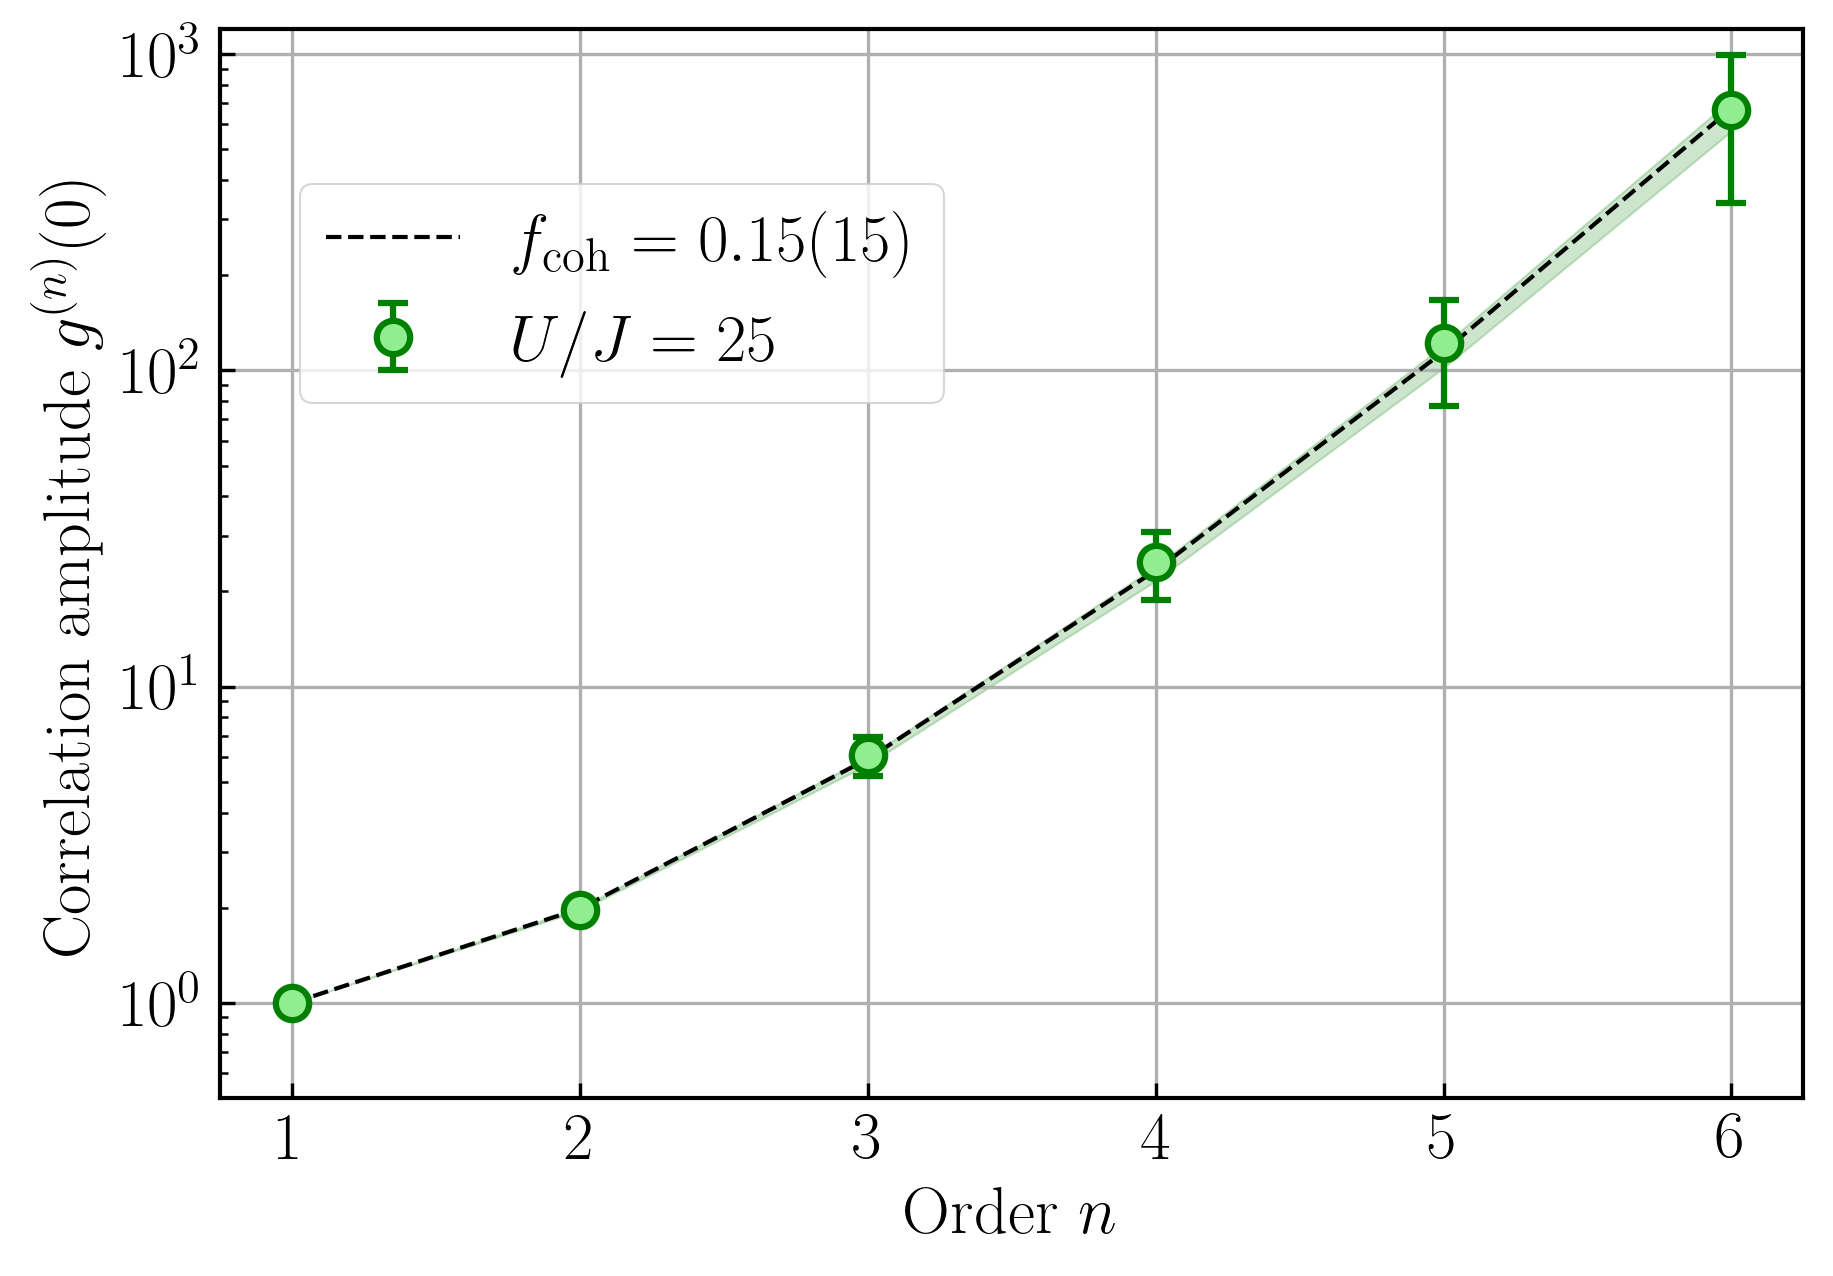

In [16]:
# DATA u=25

fc=0.102;
gn25th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.;
gn25th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.2;
gn25th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn25th,'--',color='black',label=r'$f_{\rm coh}=0.15(15)$')
plt.fill_between(xn,gn25th1, gn25th2,color='green',alpha=.2)

plt.errorbar(xn,gn25,yerr=gn25err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=25$')

plt.ylim(0.5,1200)
plt.grid(True)
plt.semilogy()
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.65])

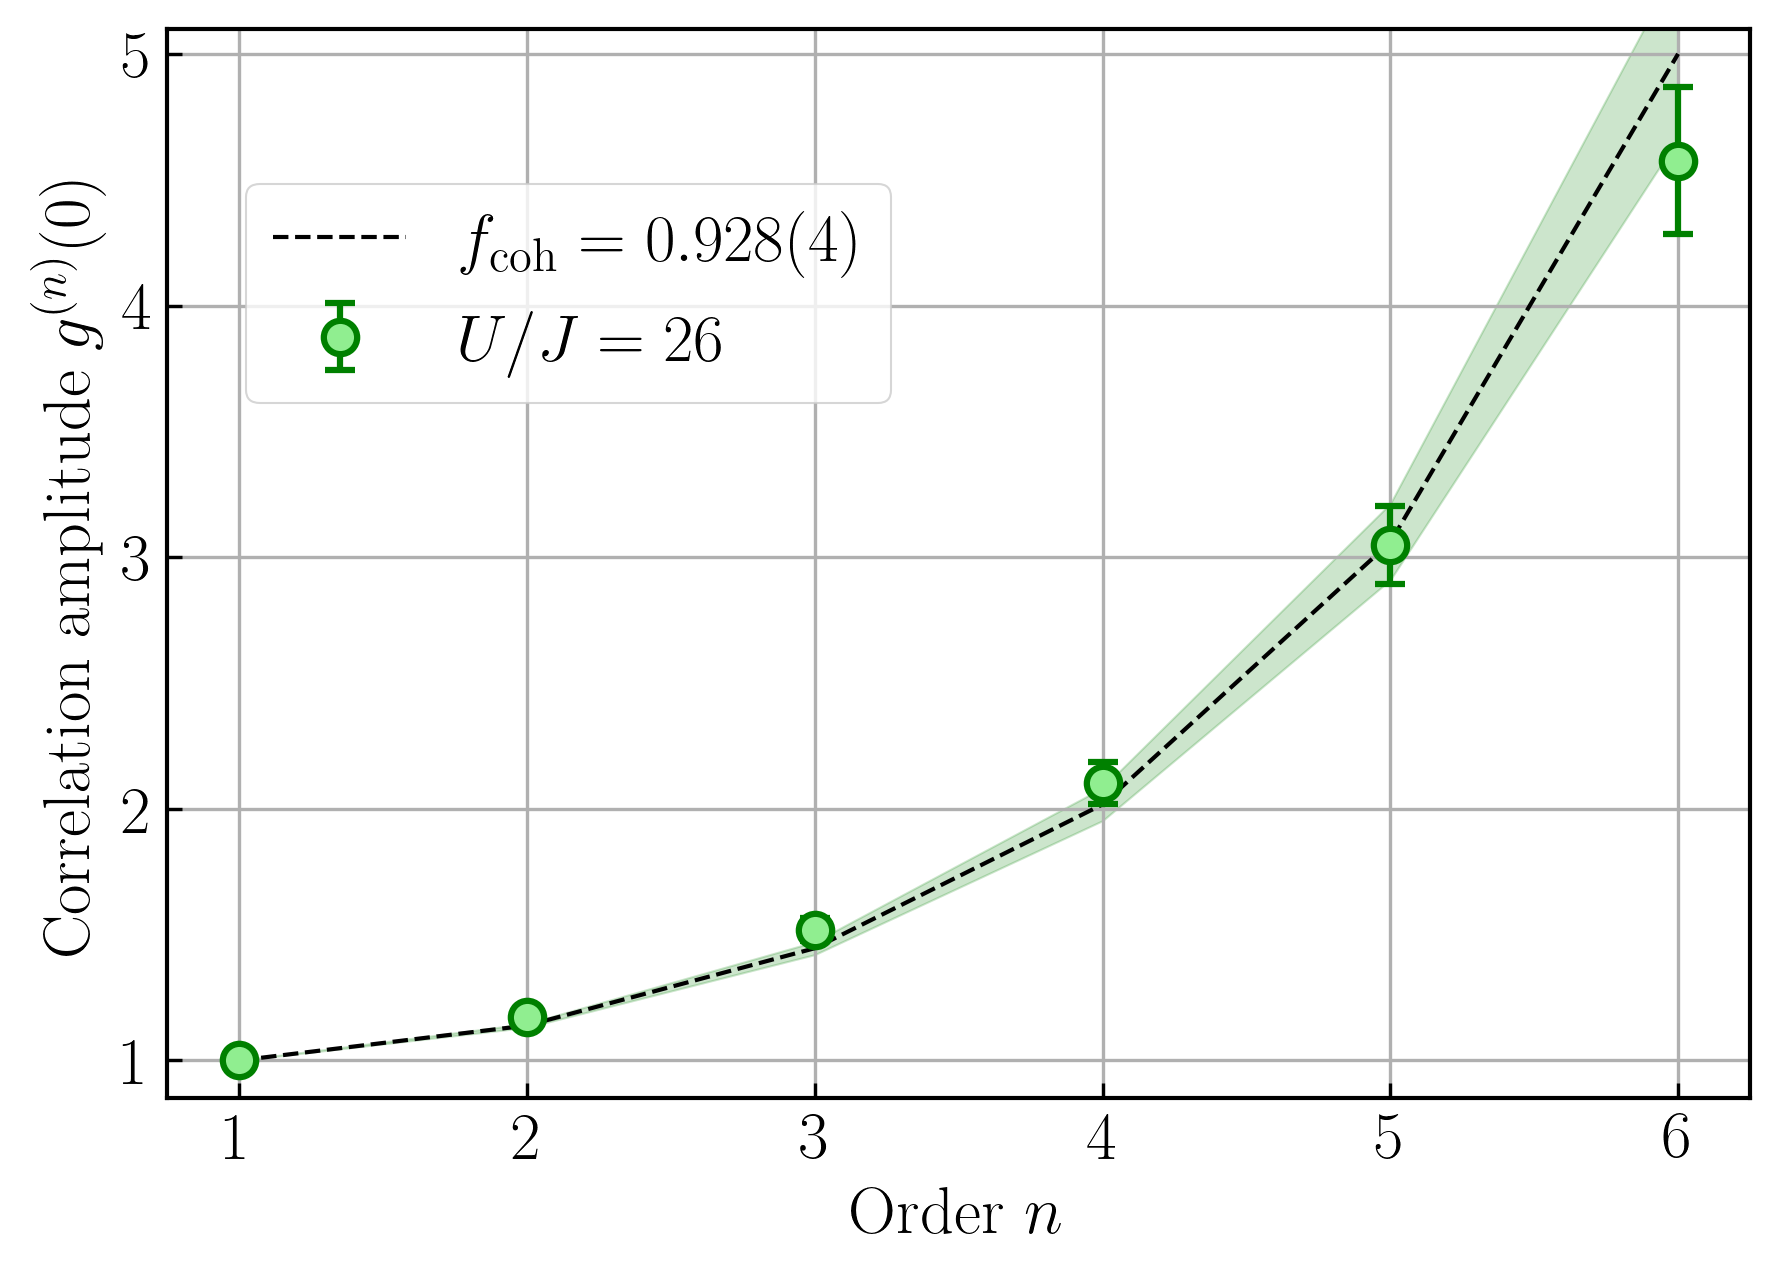

In [17]:
# DATA u=26

fc=0.928;
gn26th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.932;
gn26th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.924;
gn26th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn26th,'--',color='black',label=r'$f_{\rm coh}=0.928(4)$')
plt.fill_between(xn,gn26th1, gn26th2,color='green',alpha=.2)

plt.errorbar(xn,gn26,yerr=gn26err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=26$')

plt.ylim(0.85,5.1)
plt.grid(True)
#plt.semilogy()
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.65])

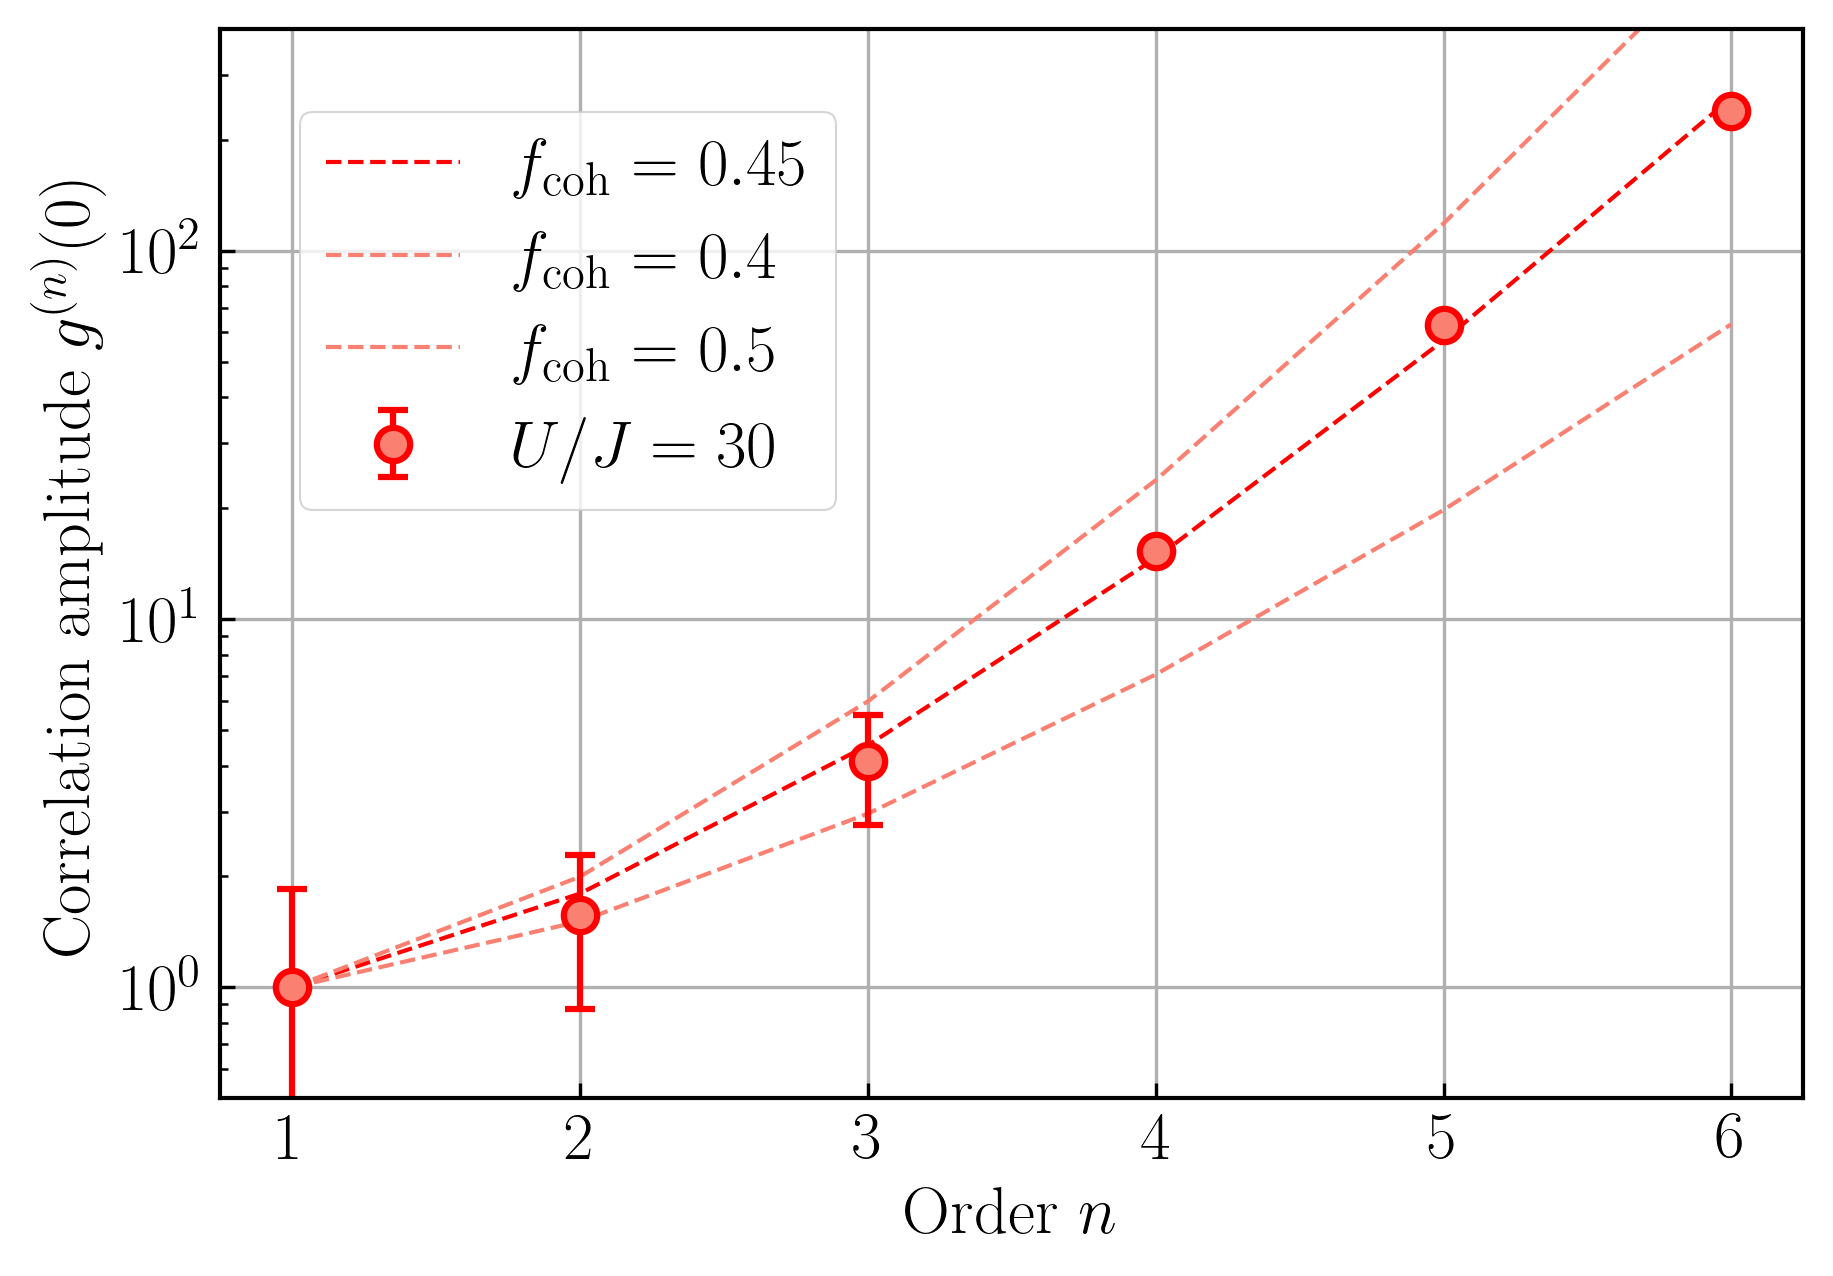

In [18]:
#DATA u=30

fc=0.45;
gn30th=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.05;
gn30th1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.7;
gn30th2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.plot(xn,gn30th,'--',color='red',label=r'$f_{\rm coh}=0.45$')
plt.plot(xn,gn30th1,'--',color='salmon',label=r'$f_{\rm coh}=0.4$')
plt.plot(xn,gn30th2,'--',color='salmon',label=r'$f_{\rm coh}=0.5$')

plt.errorbar(xn,gn30,yerr=gn30err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='red',
             markeredgecolor='red',markerfacecolor='salmon',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=30$')

plt.ylim(.5,400)
plt.grid(True)
plt.semilogy()
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.55])

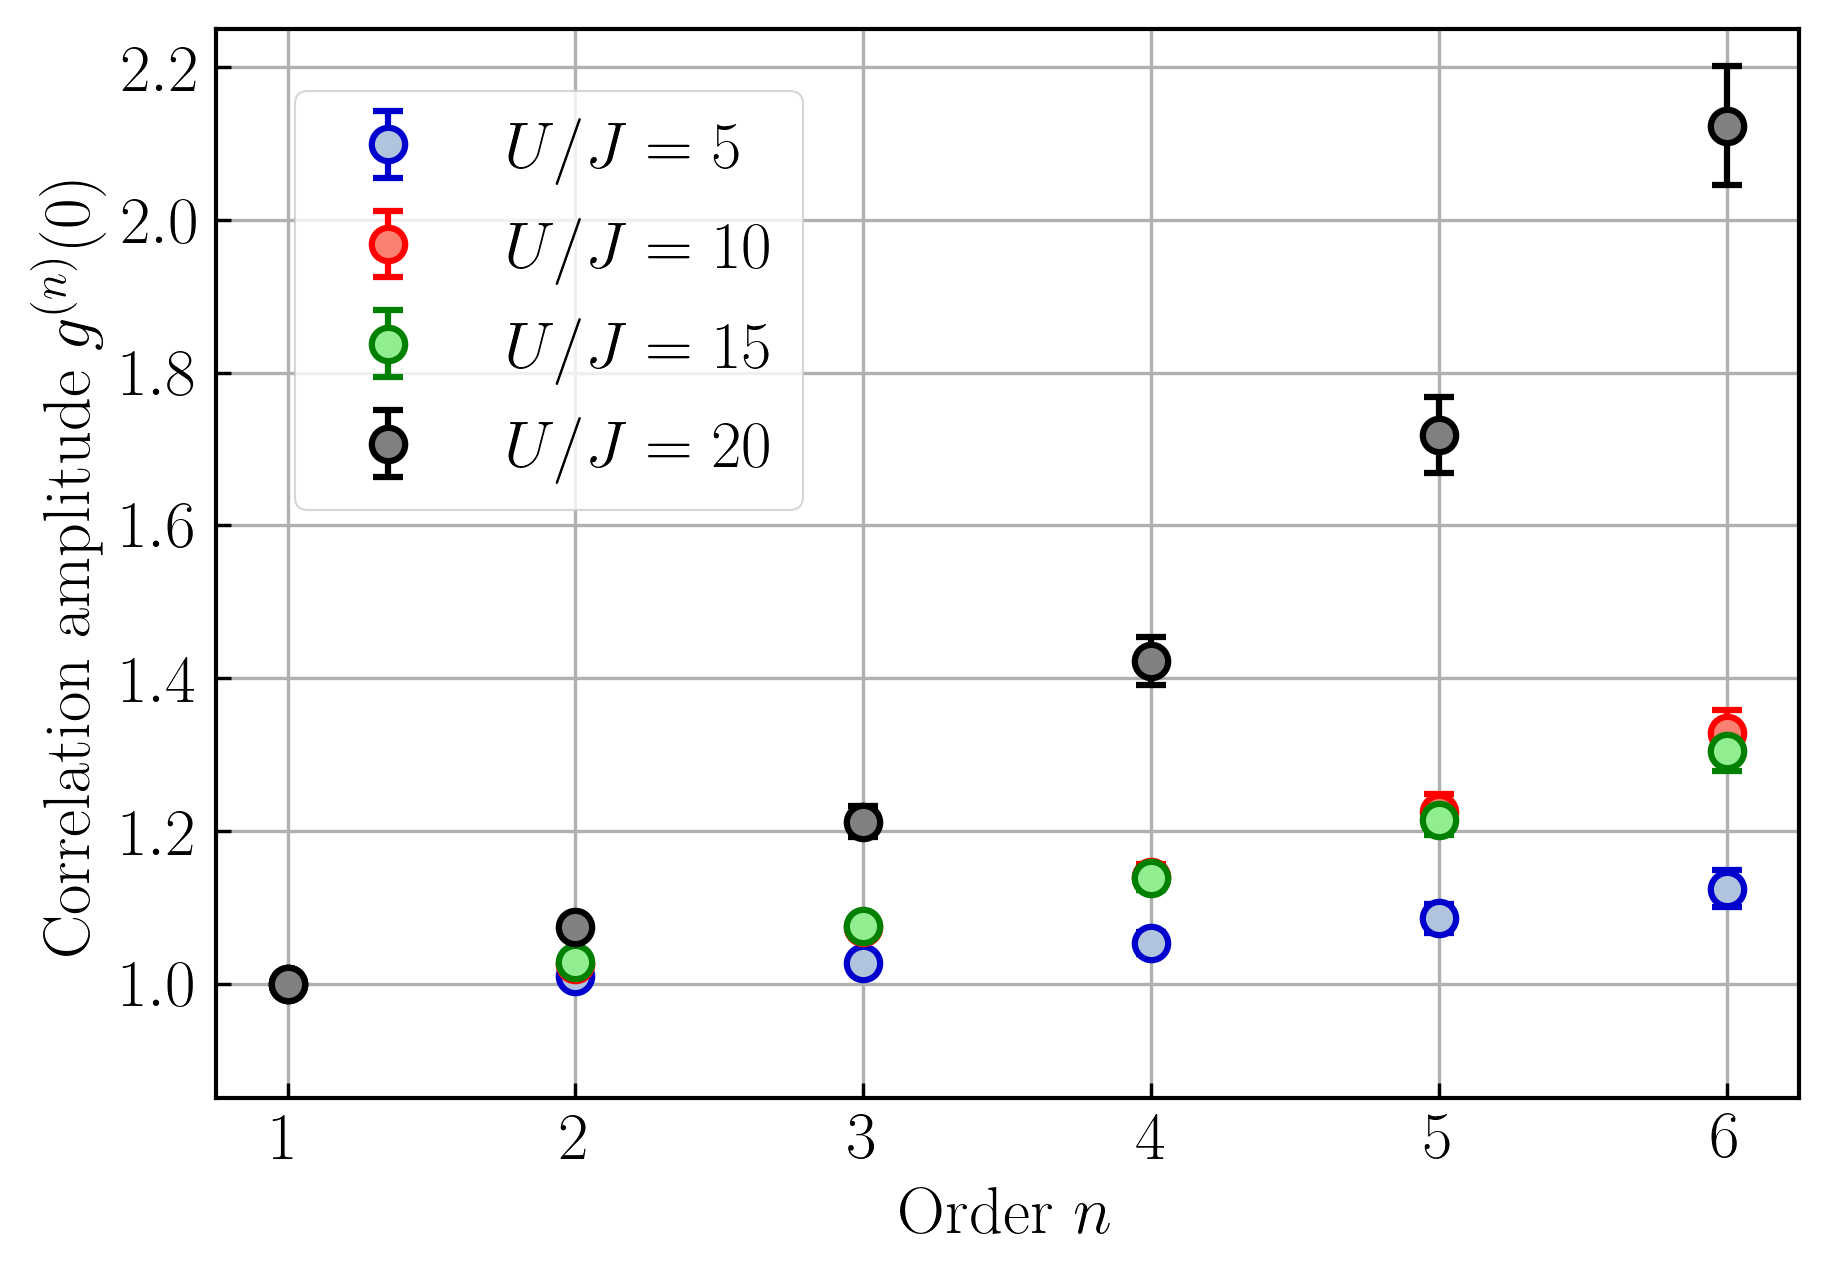

In [19]:
fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=5$')
#plt.plot(xn,gn5th,'--',color='lightblue')

plt.errorbar(xn,gn10,yerr=gn10err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='red',
             markeredgecolor='red',markerfacecolor='salmon',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=10$')
#plt.plot(xn,gn10th,'--',color='salmon')

plt.errorbar(xn,gn15,yerr=gn15err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=15$')
#plt.plot(xn,gn15th,'--',color='lightgreen')

plt.errorbar(xn,gn20,yerr=gn20err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=20$')
#plt.plot(xn,gn20th,'--',color='gray')

plt.ylim(0.85,2.25)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.55])


plt.savefig('Fig-Coherence-varyingU.pdf', dpi=300,bbox_inches='tight')

## Mott regime

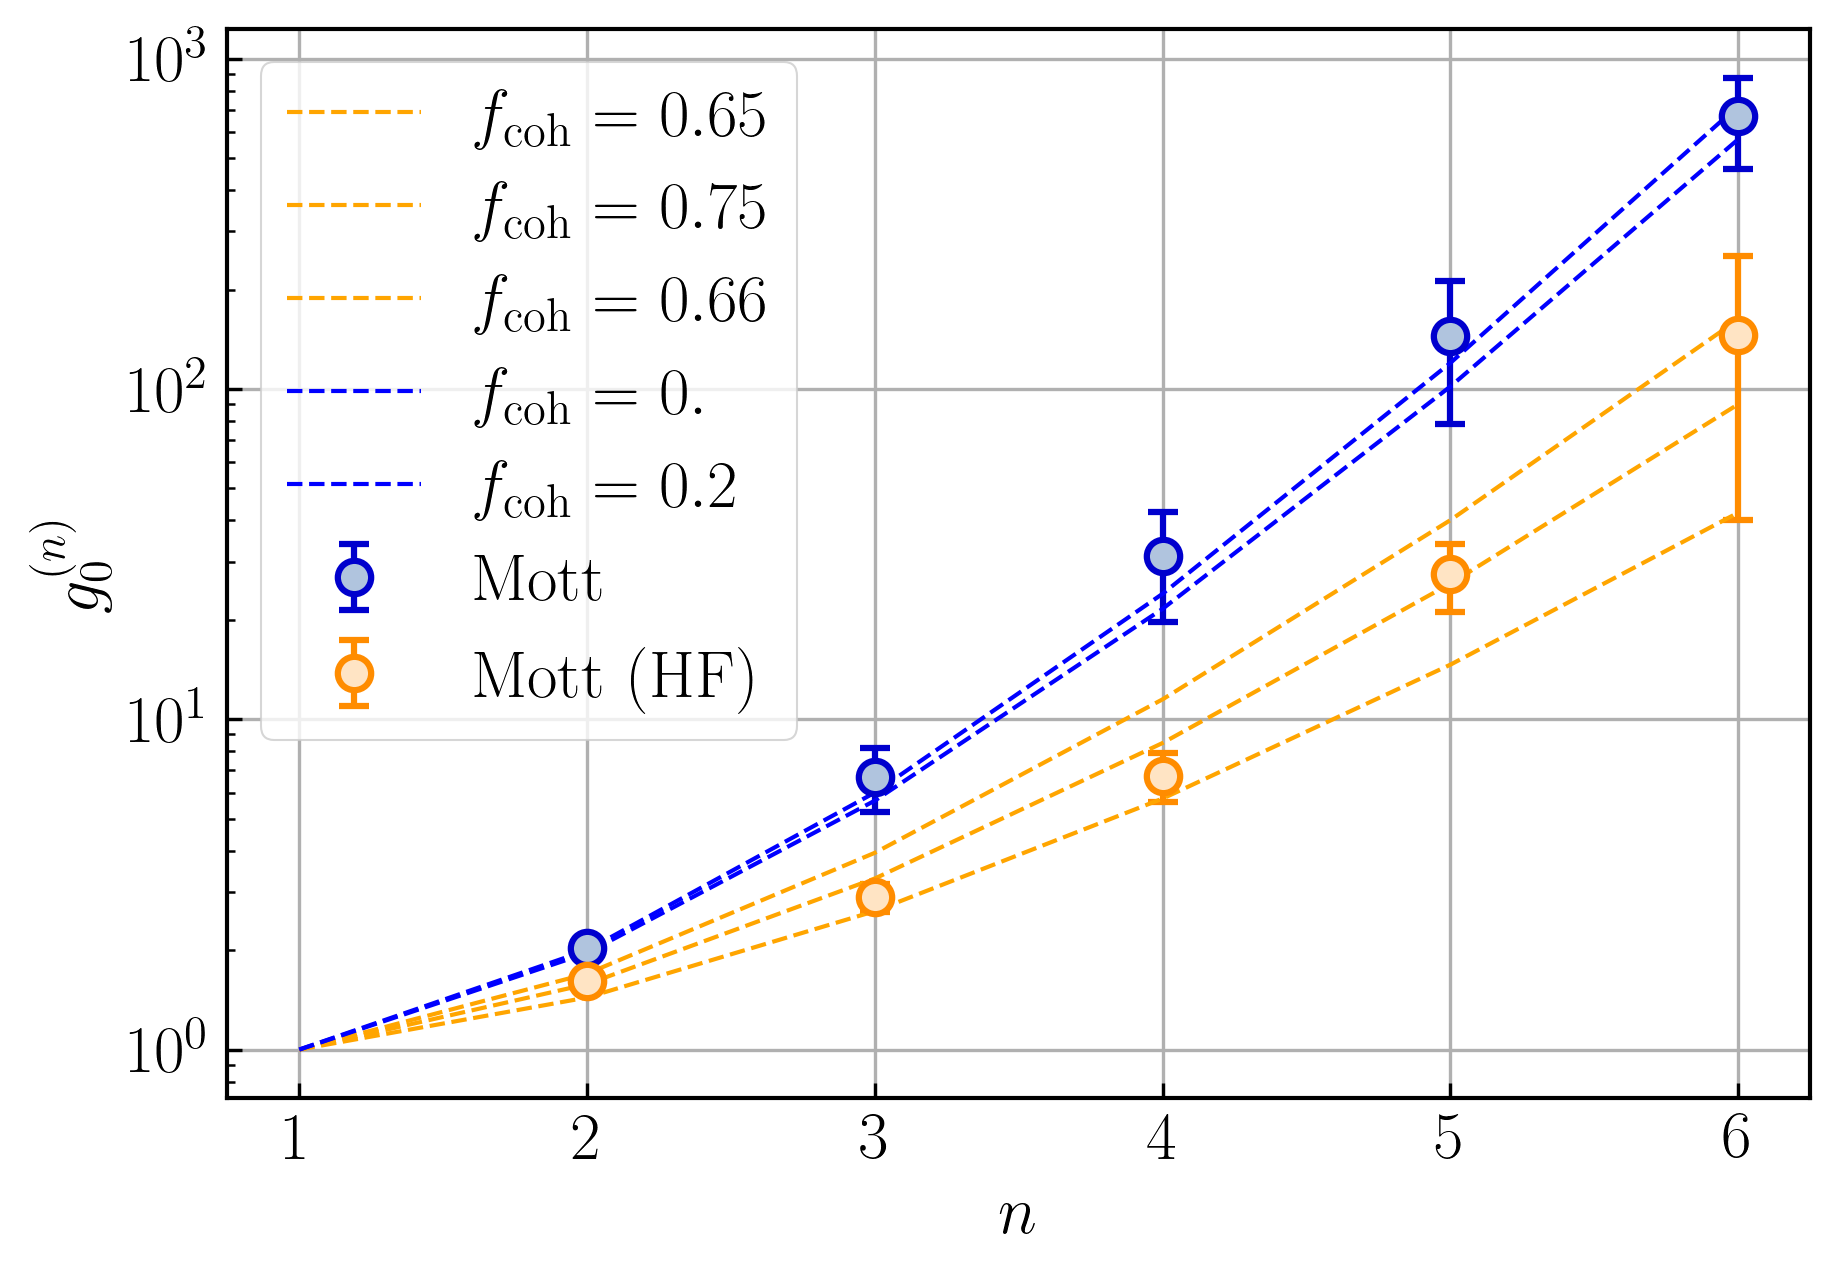

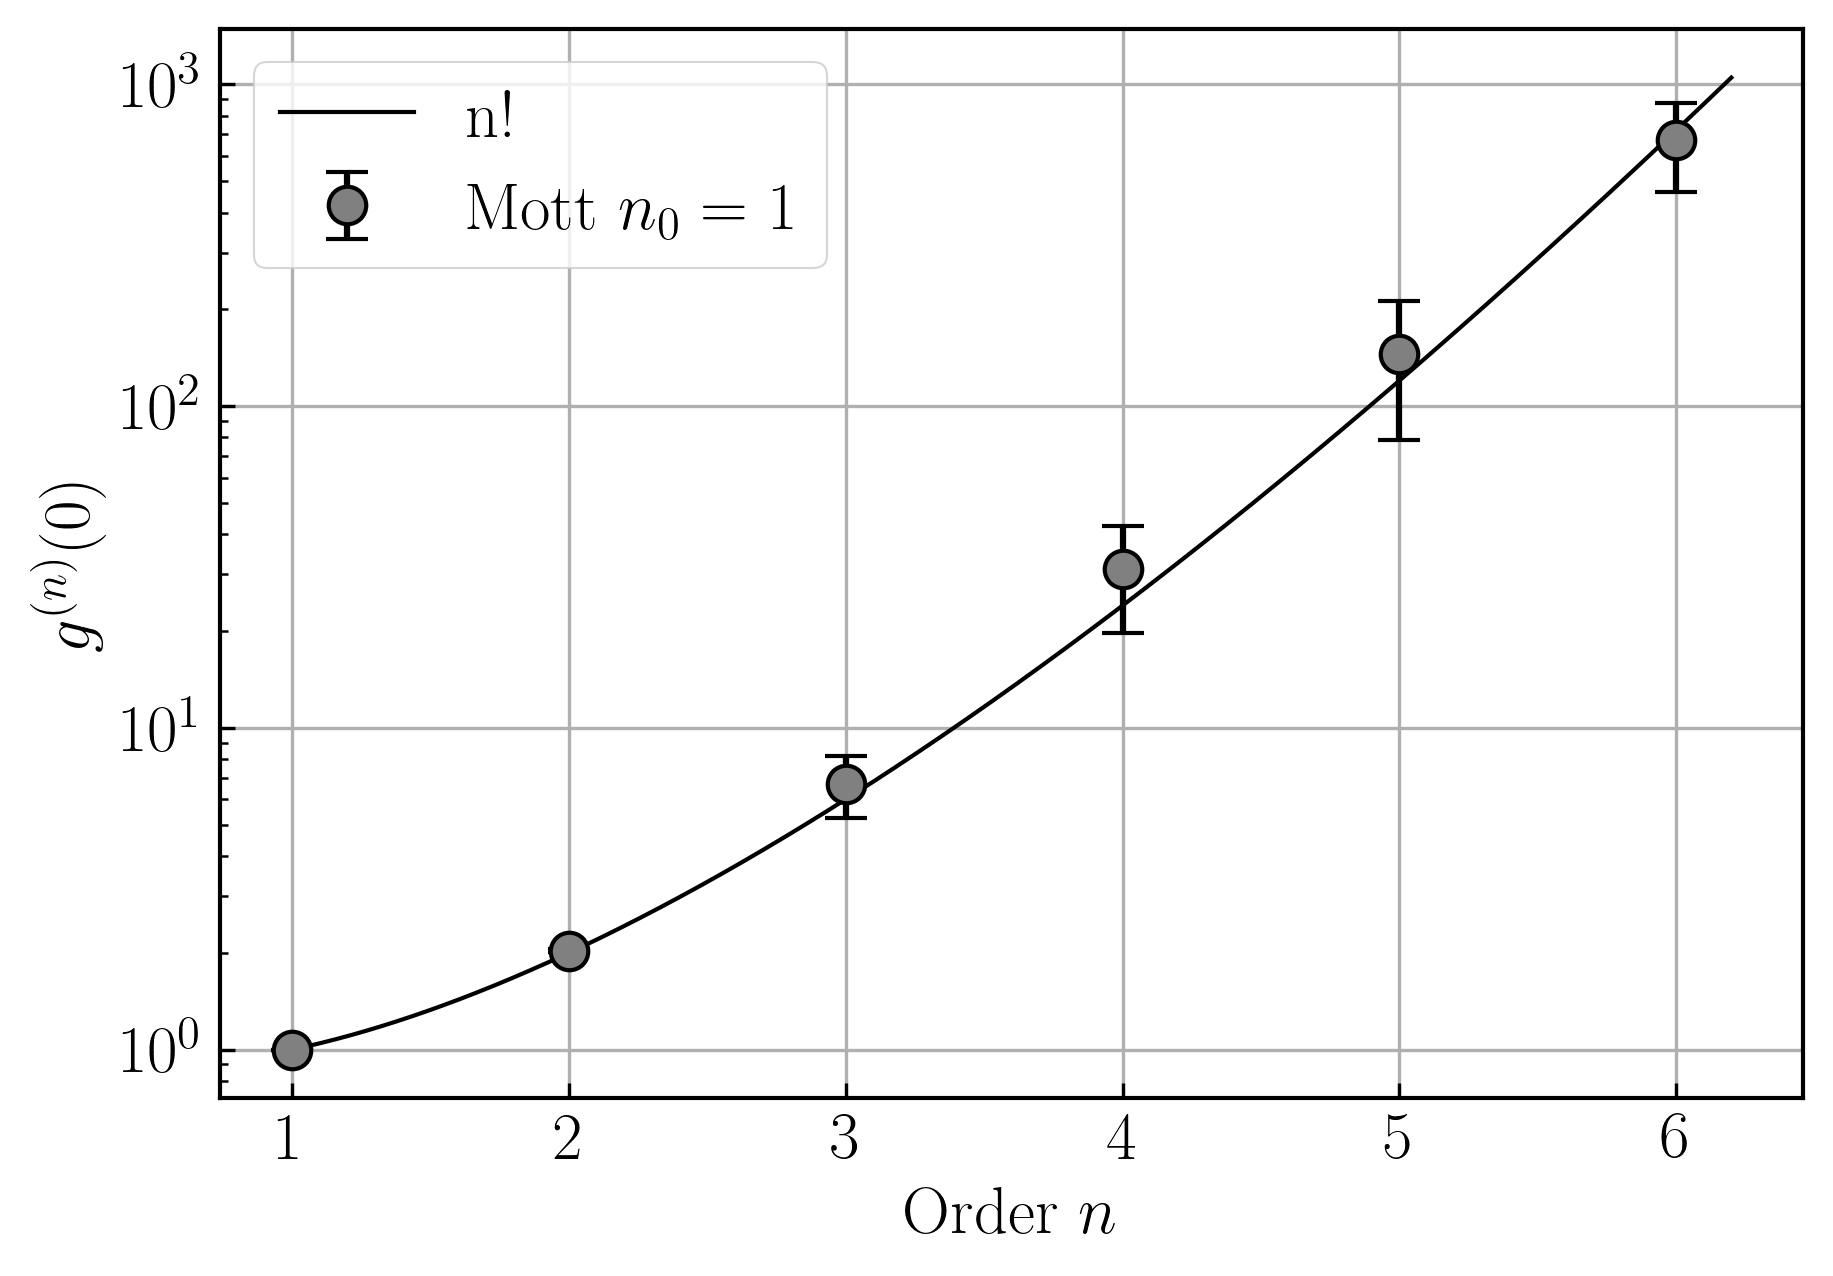

In [20]:
fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

# exp data
plt.errorbar(n_list1, gn_MOTT1, yerr=gn_MOTT_err1, 
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5, label="Mott")
plt.errorbar(n_list, gn_MOTT_HF, yerr=gn_MOTT_HF_err*3, 
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='darkorange',
        markeredgecolor='darkorange',
        markerfacecolor='bisque',
             markeredgewidth=1.5,lw=1.5,label="Mott (HF)")

x=[1., 2, 3 , 4, 5 ,6]
fc=0.65;
gnMottIncomth=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.55;
gnMottIncomth1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

fc=0.75;
gnMottIncomth2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]

plt.plot(x,gnMottIncomth,'--',color='orange',label=r'$f_{\rm coh}=0.65$')
plt.plot(x,gnMottIncomth1,'--',color='orange',label=r'$f_{\rm coh}=0.75$')
plt.plot(x,gnMottIncomth2,'--',color='orange',label=r'$f_{\rm coh}=0.66$')

fc=0.;
gnMottth=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]
fc=0.2;
gnMottth1=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]
fc=0.1;
gnMottth2=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6
       ]


plt.plot(x,gnMottth,'--',color='blue',label=r'$f_{\rm coh}=0.$')
plt.plot(x,gnMottth1,'--',color='blue',label=r'$f_{\rm coh}=0.2$')

plt.grid()
plt.xlabel('$n$')
plt.ylabel('$g^{(n)}_0$')
plt.legend()
plt.semilogy()
plt.savefig('Fig-Coherence-Mott.pdf', dpi=300,bbox_inches='tight')
plt.show()


fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

# exp data

plt.errorbar(n_list1, gn_MOTT1, yerr=gn_MOTT_err1, 
             fmt="o",markersize=9,
             linestyle='none',
             #color=(0/255,79/255,0/255),
             color='black',
            markeredgecolor='black',
            markerfacecolor='gray',
            markeredgewidth=1.0,lw=1.5,
            capsize=5,label="Mott $n_0=1$")

# n!
x = np.linspace(1, 6.2, 1000)
plt.plot(x, gamma(x+1), 'k', label="n!")

plt.errorbar([1], [1], yerr=[0],fmt="o",markersize=9,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5)
plt.grid()
plt.xlabel('Order $n$')
plt.ylabel('$g^{(n)}(0)$')
plt.legend()
plt.semilogy()
plt.savefig('Fig-Coherence-Mott-n=1.pdf', dpi=300,bbox_inches='tight')
plt.show()

## Probability distributions

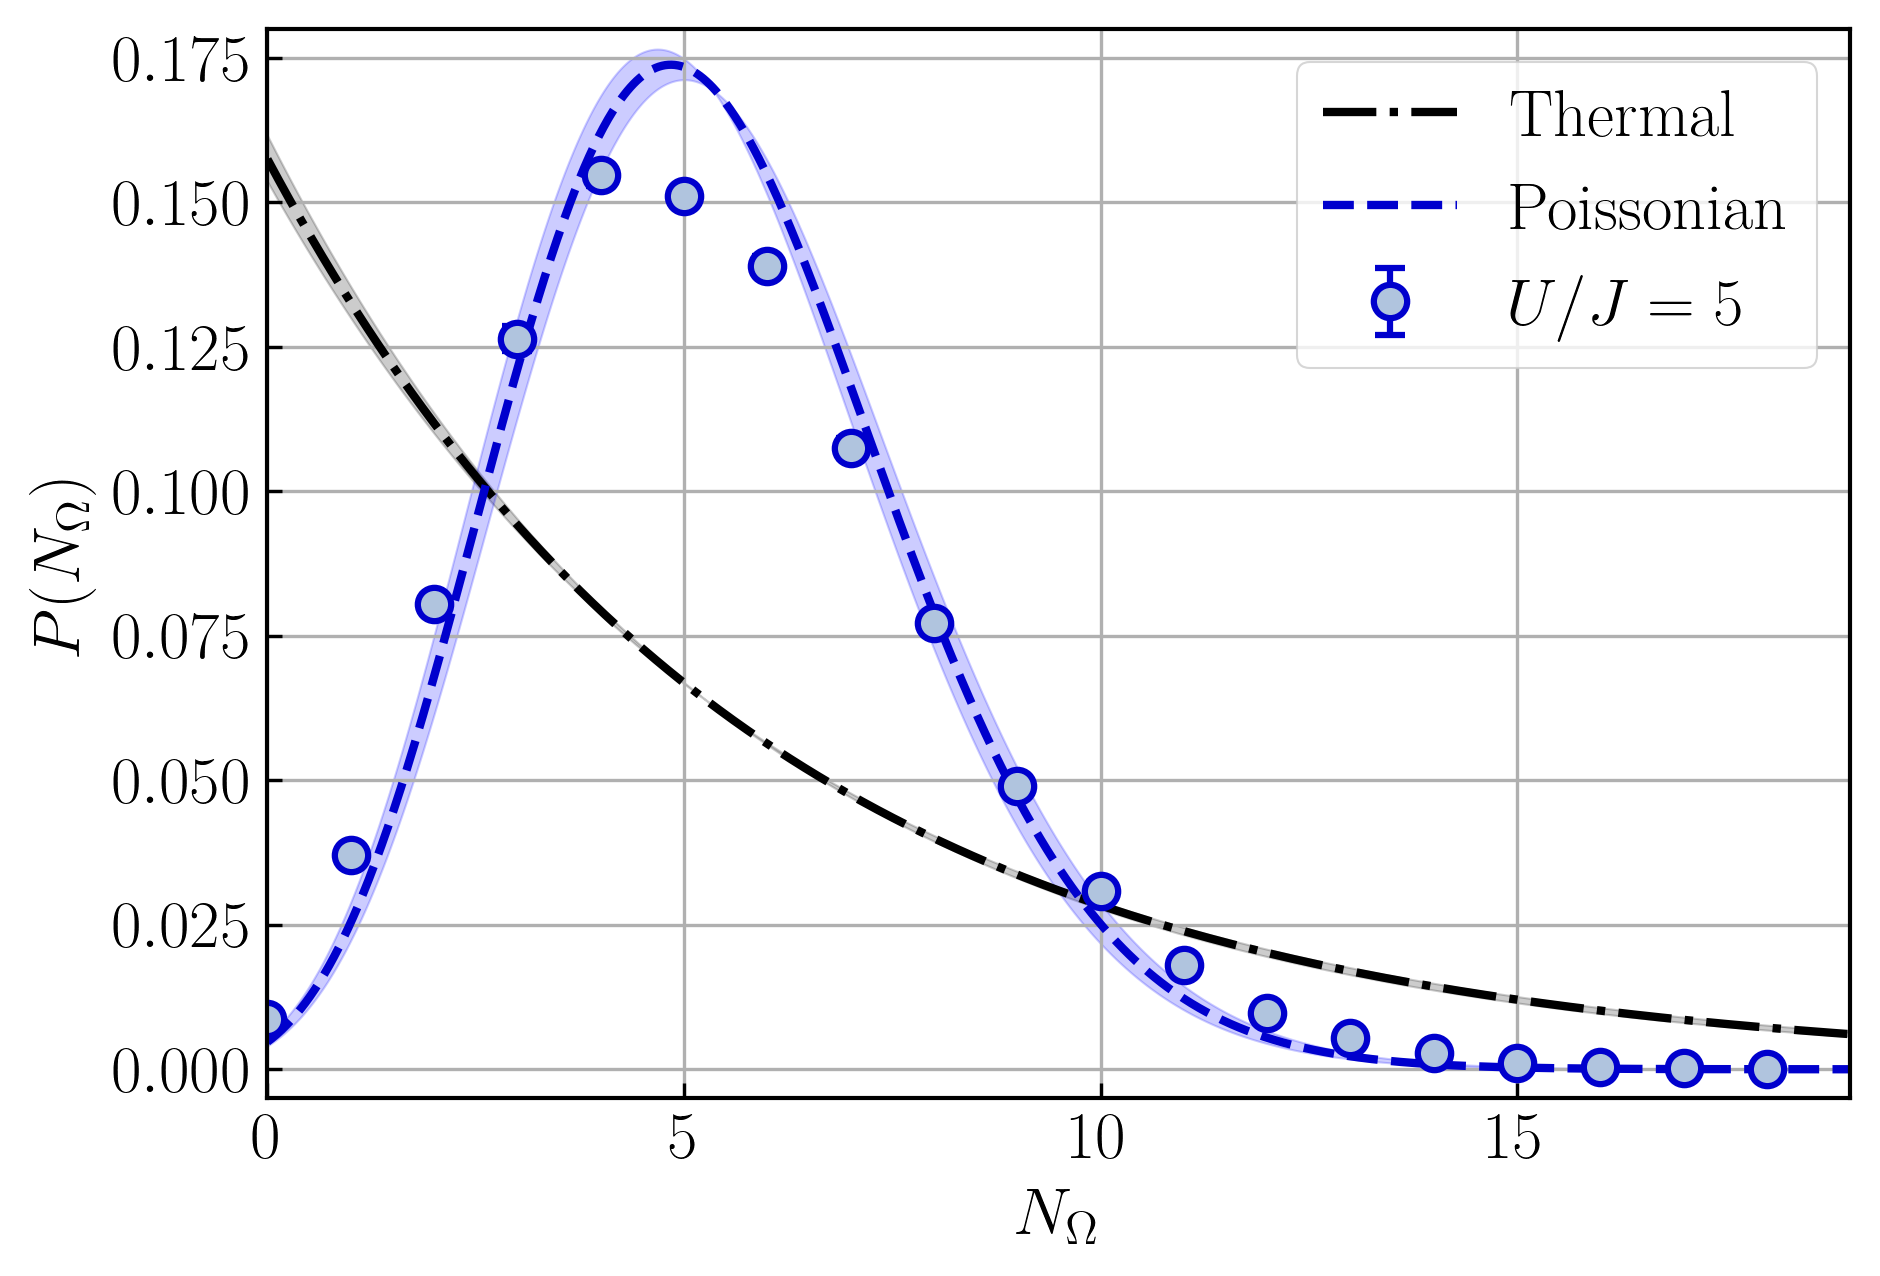

In [21]:
# -- theory
xN = np.linspace(0, 19, 1000)
q = Nmean_UJ5 / (1 + Nmean_UJ5)
qM = 1.03 * Nmean_UJ5 / (1 + 1.03*Nmean_UJ5)
qm = 0.97*Nmean_UJ5 / (1 + 0.97*Nmean_UJ5)
thermal_UJ5 = (1 - q) * q ** xN  
thermal_UJ5p = (1 - qM) * qM ** xN  
thermal_UJ5m = (1 - qm) * qm ** xN  
poisson_UJ5 = Nmean_UJ5 ** xN / factorial(xN) * np.exp(-Nmean_UJ5)  
poisson_UJ5p = (1.03*Nmean_UJ5) ** xN / factorial(xN) * np.exp(-1.03*Nmean_UJ5)
poisson_UJ5m = (0.97*Nmean_UJ5) ** xN / factorial(xN) * np.exp(-0.97*Nmean_UJ5)

plt.figure(figsize=[fig_width,fig_height])

plt.errorbar(Nbin_UJ5, HistoN_UJ5, yerr=err_HistoN_UJ5,
         marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5,
        linestyle='none', color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=5$')

plt.plot(xN, thermal_UJ5,'-.',linewidth=2,color='black',label='Thermal')
plt.fill_between(xN,thermal_UJ5p, thermal_UJ5m,color='black',alpha=.2)

plt.plot(xN, poisson_UJ5,'--',linewidth=2,color='mediumblue',label='Poissonian')
plt.fill_between(xN,poisson_UJ5p, poisson_UJ5m,color='blue',alpha=.2)


plt.ylim(-.005, 0.18)
plt.xlim(0,19)
#plt.semilogy()

plt.grid()
plt.legend()
plt.ylabel(r'$P(N_{\Omega})$')
plt.xlabel(r'$N_{\Omega}$')

plt.savefig('CountingStat-UJ5.pdf', dpi=300,bbox_inches='tight')
plt.show()


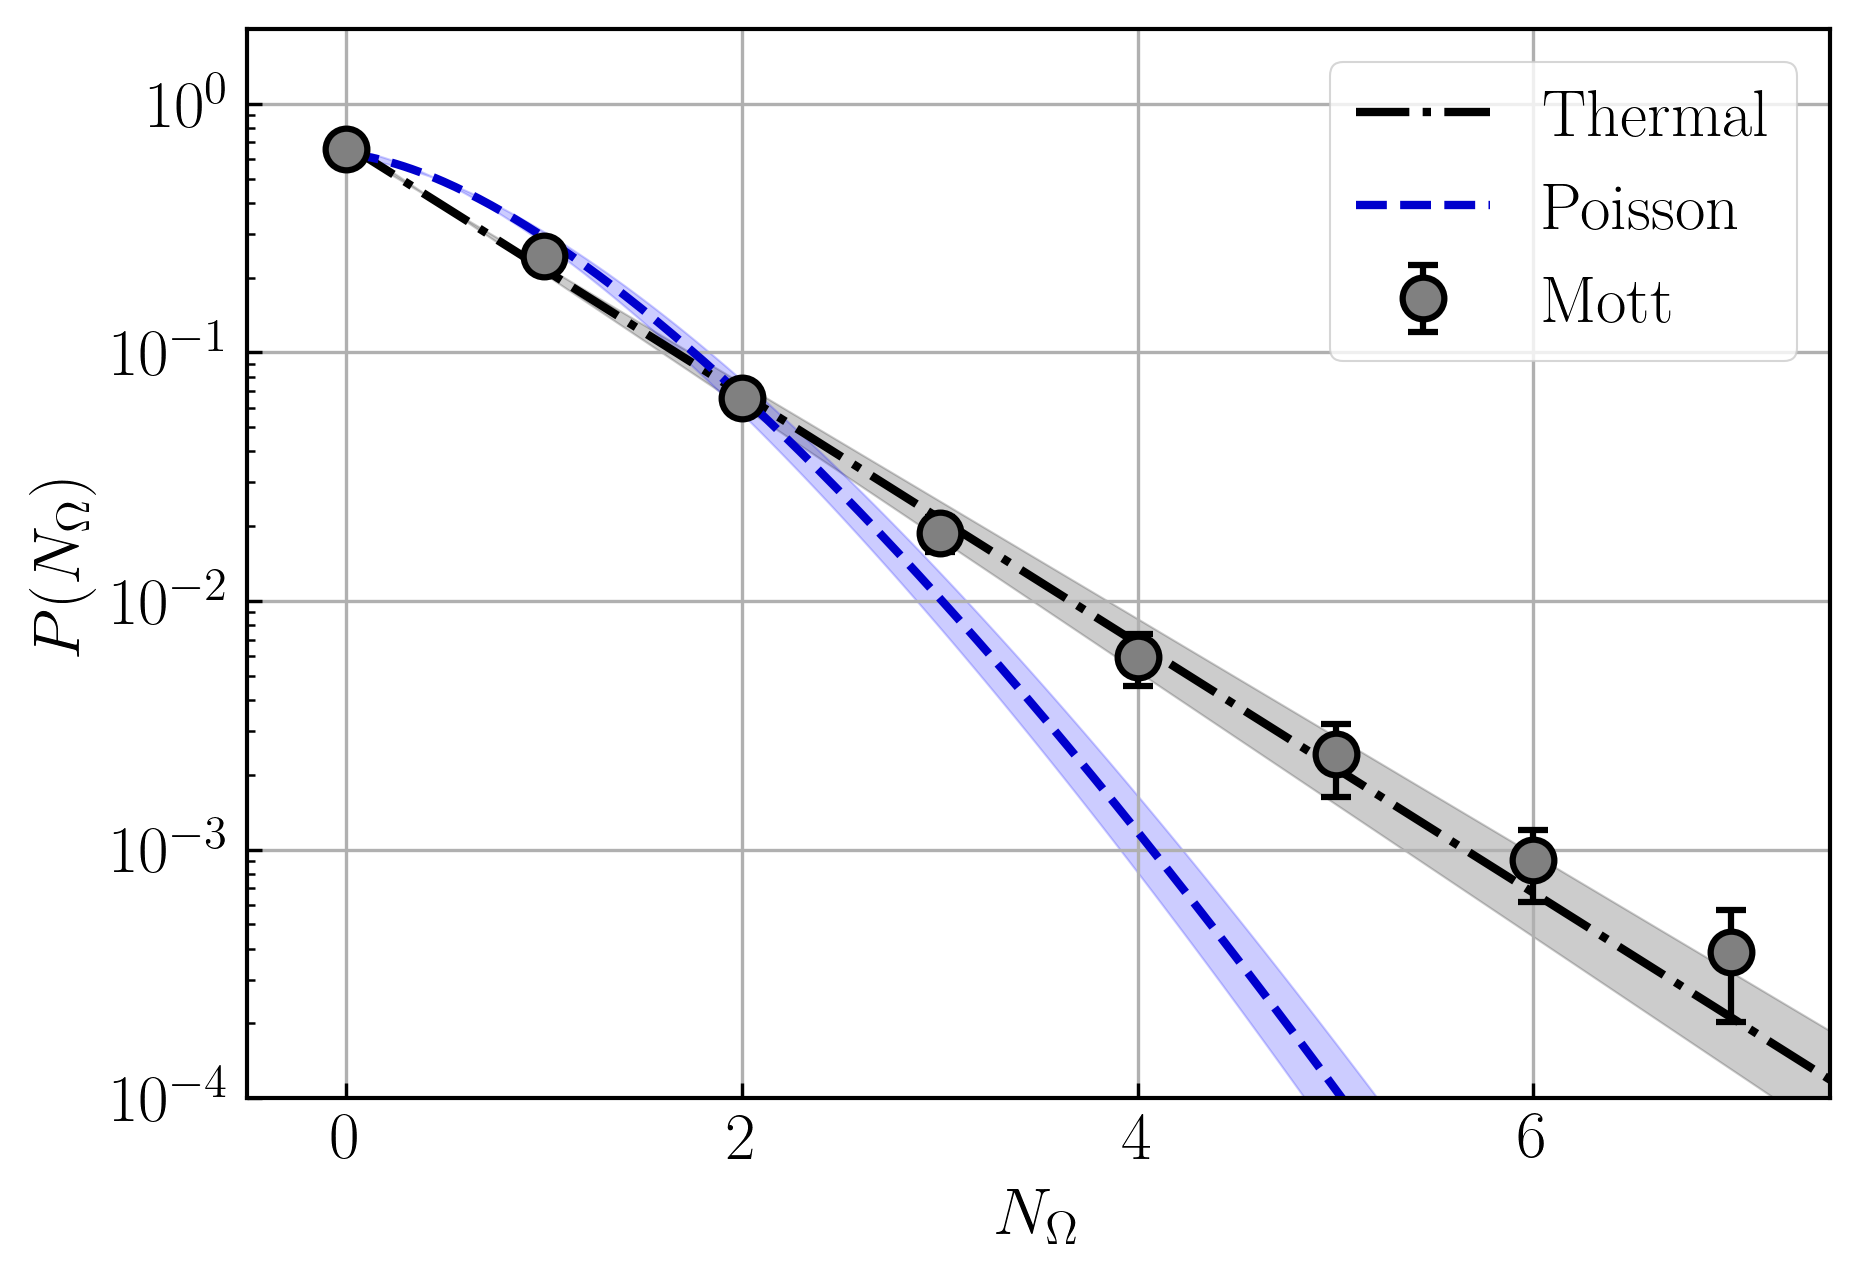

In [22]:
# -- theory
xN = np.linspace(0.01, 20, 1000)
q = Nmean_Mott / (1 + Nmean_Mott)
qM = 1.1*Nmean_Mott / (1 + 1.1*Nmean_Mott)
qm = 0.9*Nmean_Mott / (1 + 0.9*Nmean_Mott)
thermal_Mott = (1 - q) * q ** xN #dist.thermal(x, Nmean_UJ5)
thermal_Mottp = (1 - qM) * qM ** xN #dist.thermal(x, Nmean_UJ5)
thermal_Mottm = (1 - qm) * qm ** xN #dist.thermal(x, Nmean_UJ5)
poisson_Mott = Nmean_Mott ** xN / factorial(xN) * np.exp(-Nmean_Mott) #dist.poisson(x, Nmean_UJ5)
poisson_Mottp = (1.1*Nmean_Mott) ** xN / factorial(xN) * np.exp(-1.1*Nmean_Mott)
poisson_Mottm = (0.9*Nmean_Mott) ** xN / factorial(xN) * np.exp(-0.9*Nmean_Mott)

q_UJ24 = Nmean_UJ24 / (1 + Nmean_UJ24)
thermal_UJ24 = (1 - q_UJ24) * q_UJ24 ** xN #dist.thermal(x, Nmean_UJ5)
poisson_UJ24 = 0.9*Nmean_UJ24 ** xN / factorial(xN) * np.exp(-0.9*Nmean_UJ24)
a_UJ24= 1/(g2_UJ24-1) - 1
b_UJ24= (1 + a_UJ24)/Nmean_UJ24
C_UJ24=b_UJ24**(1+a_UJ24) / 2.3# factorial(a_UJ24)
weird_UJ24 = C_UJ24 * xN**a_UJ24 * np.exp(- b_UJ24 *xN) # published in PRL 86, 2786 (2001)

plt.figure(figsize=[fig_width,fig_height])

plt.errorbar(Nbin_Mott, HistoN_Mott, yerr=err_HistoN_Mott,
    marker='o',markersize=10,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5, label=r"Mott")


plt.plot(xN, thermal_Mott,'-.',linewidth=2,color='black',label='Thermal')
plt.fill_between(xN,thermal_Mottp, thermal_Mottm,color='black',alpha=.2)

plt.plot(xN, poisson_Mott,'--',linewidth=2,color='mediumblue',label='Poisson')
plt.fill_between(xN,poisson_Mottp, poisson_Mottm,color='blue',alpha=.2)

plt.semilogy()
plt.ylim(1e-4, 2)
plt.xlim(-.5,7.5)

plt.grid()
plt.legend()
plt.ylabel(r'$P(N_{\Omega})$')
plt.xlabel(r'$N_{\Omega}$')

plt.savefig('CountingStat-UJ75.pdf', dpi=300,bbox_inches='tight')
plt.show()


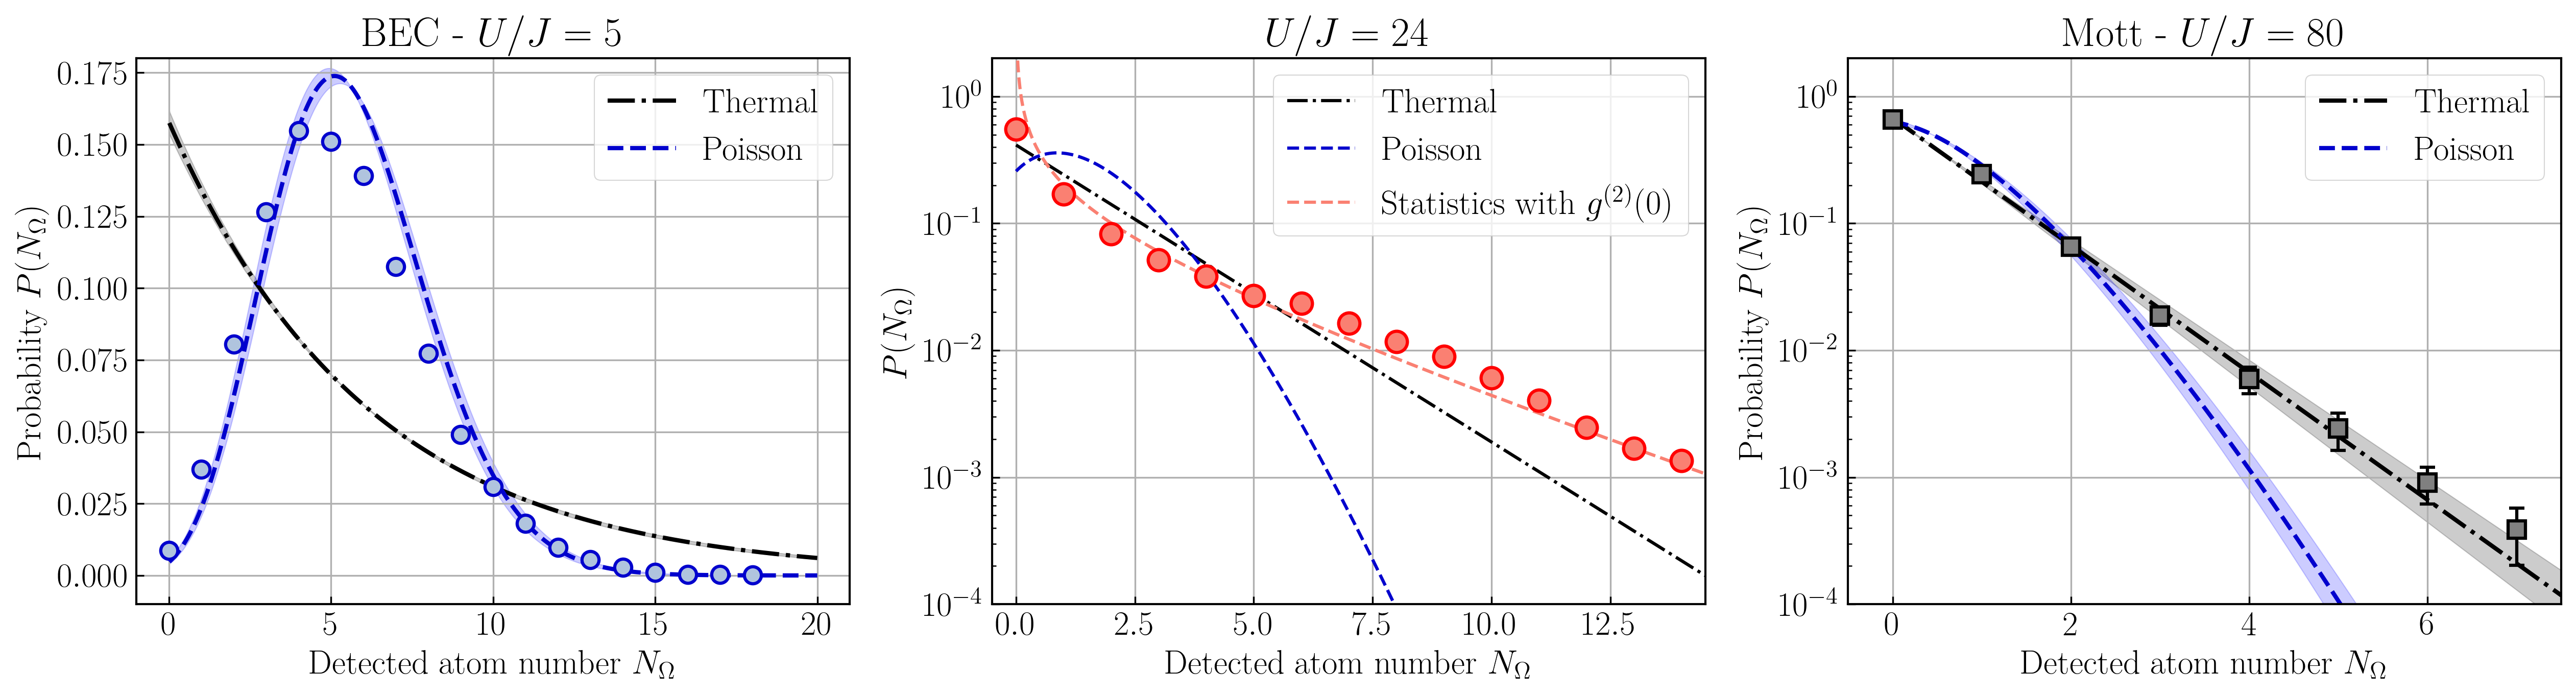

In [23]:

fig,ax=plt.subplots(1,3,figsize=[3*fig_width,fig_height])

plt.subplot(1,3,1)

plt.errorbar(Nbin_UJ5, HistoN_UJ5, 
         marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5,
        linestyle='none', color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5)#,label=r'BEC')

plt.plot(xN, thermal_UJ5,'-.',linewidth=2,color='black',label='Thermal')
plt.fill_between(xN,thermal_UJ5p, thermal_UJ5m,color='black',alpha=.2)

plt.plot(xN, poisson_UJ5,'--',linewidth=2,color='mediumblue',label='Poisson')
plt.fill_between(xN,poisson_UJ5p, poisson_UJ5m,color='blue',alpha=.2)

plt.ylim(-.01, 0.18)

plt.grid()
plt.legend()
plt.ylabel(r'Probability $P(N_{\Omega})$')
plt.xlabel(r'Detected atom number $N_{\Omega}$')
plt.title(r'BEC - $U/J=5$')

plt.subplot(1,3,3)

plt.errorbar(Nbin_Mott, HistoN_Mott, yerr=err_HistoN_Mott,
    marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5)#, label=r"Mott")
xN = np.linspace(0, 20, 1000)

plt.plot(xN, thermal_Mott,'-.',linewidth=2,color='black',label='Thermal')
plt.fill_between(xN,thermal_Mottp, thermal_Mottm,color='black',alpha=.2)

plt.plot(xN, poisson_Mott,'--',linewidth=2,color='mediumblue',label='Poisson')
plt.fill_between(xN,poisson_Mottp, poisson_Mottm,color='blue',alpha=.2)

plt.semilogy()
plt.ylim(1e-4, 2)
plt.xlim(-.5,7.5)

plt.grid()
plt.legend()
plt.ylabel(r'Probability $P(N_{\Omega})$')
plt.xlabel(r'Detected atom number $N_{\Omega}$')
plt.title(r'Mott - $U/J=80$')


plt.subplot(1,3,2)

plt.errorbar(Nbin_UJ24, HistoN_UJ24, 
    marker='o',markersize=10,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='red',
        markeredgecolor='red',
        markerfacecolor='salmon',
             markeredgewidth=1.5,lw=1.5)#, label=r"$U/J=24$")
plt.plot(xN, thermal_UJ24,'-.',linewidth=1.5,color='black',label='Thermal')
plt.plot(xN, poisson_UJ24,'--',linewidth=1.5,color='mediumblue',label='Poisson')
plt.plot(xN, weird_UJ24,'--',linewidth=1.5,color='salmon',label=r'Statistics with $g^{(2)}(0)$')

plt.semilogy()
plt.ylim(1e-4, 2)
plt.xlim(-.5,14.5)

plt.grid()
plt.legend()
plt.ylabel(r'$P(N_{\Omega})$')
plt.xlabel(r'Detected atom number $N_{\Omega}$')
plt.title(r'$U/J=24$')

plt.savefig('fig-weird-correlations.pdf', dpi=300,bbox_inches='tight')
plt.show()

## Figures of the FCS paper

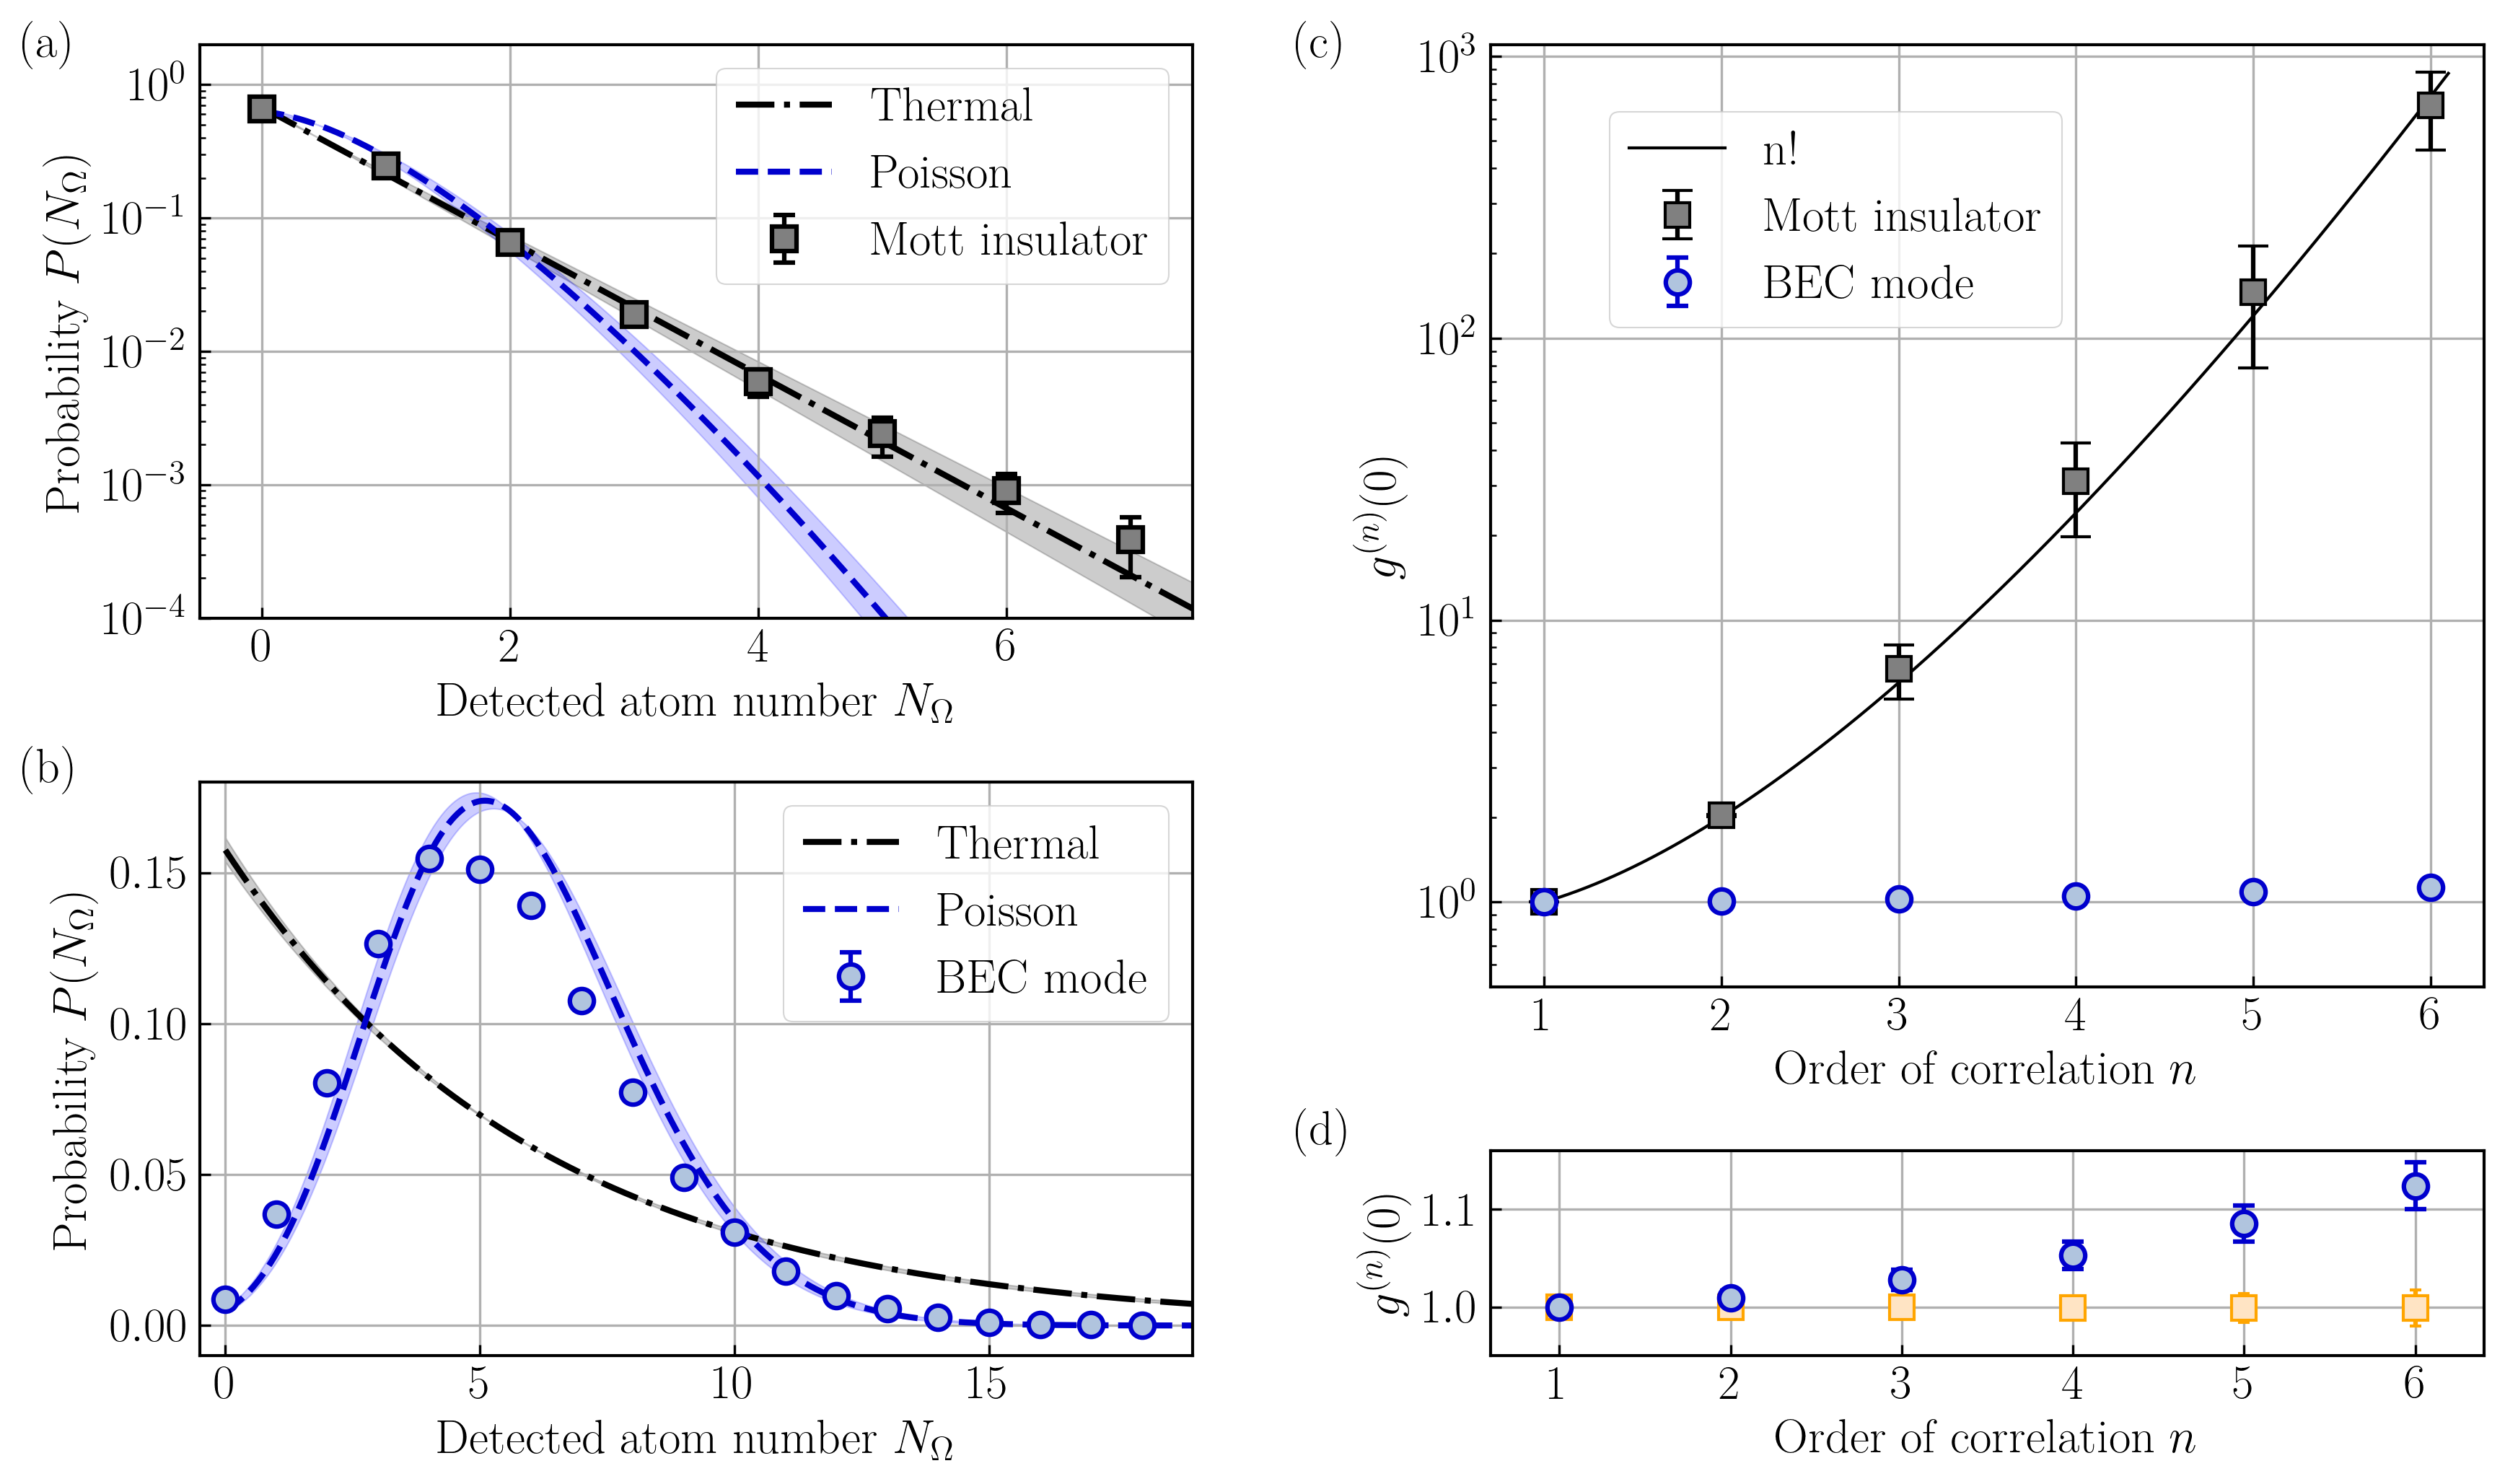

In [31]:
#########################################################  
##############       figure 1         ###################  
#########################################################  


plt.rcParams['figure.figsize'] = 2*fig_width,1.7*fig_height

#grid=plt.GridSpec(2,2,height_ratios=[0.65,1],width_ratios=[1,1])
grid=plt.GridSpec(4,2)#height_ratios=[10,10],width_ratios=[10,10])


fig=plt.figure()
grid.update(wspace=.3)#2*fig_width)
grid.update(hspace=.8)#2*fig_height)

ax2 = plt.subplot(grid[0:2,0])
ax1 = plt.subplot(grid[2:4, 0])
ax3 = plt.subplot(grid[0:3, 1])
ax4 = plt.subplot(grid[3, 1])

ax1.text(-4,.42,'(a)')
ax1.text(-4,.18,'(b)')
ax1.text(21,.42,'(c)')
ax1.text(21,.06,'(d)')

ax1.errorbar(Nbin_UJ5, HistoN_UJ5, yerr=err_HistoN_UJ5,
         marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5,
        linestyle='none', color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'BEC mode')

ax1.plot(xN, thermal_UJ5,'-.',linewidth=2,color='black',label='Thermal')
ax1.fill_between(xN,thermal_UJ5p, thermal_UJ5m,color='black',alpha=.2)

ax1.plot(xN, poisson_UJ5,'--',linewidth=2,color='mediumblue',label='Poisson')
ax1.fill_between(xN,poisson_UJ5p, poisson_UJ5m,color='blue',alpha=.2)

ax1.set_ylim(-.01, 0.18)
ax1.set_xlim(-0.5, 19)
#ax1.semilogy()

ax1.grid()
ax1.legend()
ax1.set_ylabel(r'Probability $P(N_{\Omega})$')
ax1.set_xlabel(r'Detected atom number $N_{\Omega}$')


#plt.subplot(1,3,2)

ax2.errorbar(Nbin_Mott, HistoN_Mott, yerr=err_HistoN_Mott,
    marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5, label=r"Mott insulator")
xN = np.linspace(0, 20, 1000)

ax2.plot(xN, thermal_Mott,'-.',linewidth=2,color='black',label='Thermal')
ax2.fill_between(xN,thermal_Mottp, thermal_Mottm,color='black',alpha=.2)

ax2.plot(xN, poisson_Mott,'--',linewidth=2,color='mediumblue',label='Poisson')
ax2.fill_between(xN,poisson_Mottp, poisson_Mottm,color='blue',alpha=.2)

ax2.semilogy()
ax2.set_ylim(1e-4, 2)
ax2.set_xlim(-.5,7.5)

ax2.grid()
ax2.legend()
ax2.set_ylabel(r'Probability $P(N_{\Omega})$')
ax2.set_xlabel(r'Detected atom number $N_{\Omega}$')


#plt.subplot(1,3,3)

ax3.errorbar(n_list1, gn_MOTT1, yerr=gn_MOTT_err1, fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5,label="Mott insulator")

ax3.errorbar([1], [1], yerr=[0],fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5)
# n!
x = np.linspace(1, 6.1, 1000)
ax3.plot(x, gamma(x+1), 'k', label="n!")

ax3.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'BEC mode')

ax3.set_xlabel('Order of correlation $n$')
ax3.set_ylabel('$g^{(n)}(0)$')


# specify the location of (left,bottom),width,height
#rect=patches.Rectangle((0.9,.9),5.2,.3, 
#                        fill = False,
#                        color = 'black',
#                        linewidth = 1,
#                       linestyle='--')#dashes=[6, 2])
#ax3.add_patch(rect)

ax3.legend(loc=(.12,.7))
ax3.grid()
ax3.set_ylim(0.5,1100)
ax3.semilogy()
ax3.set_xlim([0.7,6.3])

# this is an inset axes over the main axes
#axins = plt.axes([.56, -.05, .35, .1])


ax4.errorbar(xn,gnUJ5_shuffle,yerr=err_gnUJ5_shuffle, marker='s',markersize=8,capsize=2,elinewidth=1.5,
             capthick=1.5, 
             linestyle='none',         color='orange',
        markeredgecolor='orange',
        markerfacecolor='bisque',
             markeredgewidth=1.,lw=1.,label='randomised')

ax4.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5)
#ax4.legend(loc=(.03,.52))
ax4.grid(True)
ax4.set_ylim([0.95,1.16])
ax4.set_xlim([0.6,6.4])
ax4.set_xlabel('Order of correlation $n$')
ax4.set_ylabel('$g^{(n)}(0)$')


plt.savefig('fig1.pdf', dpi=300,bbox_inches='tight')
plt.show()

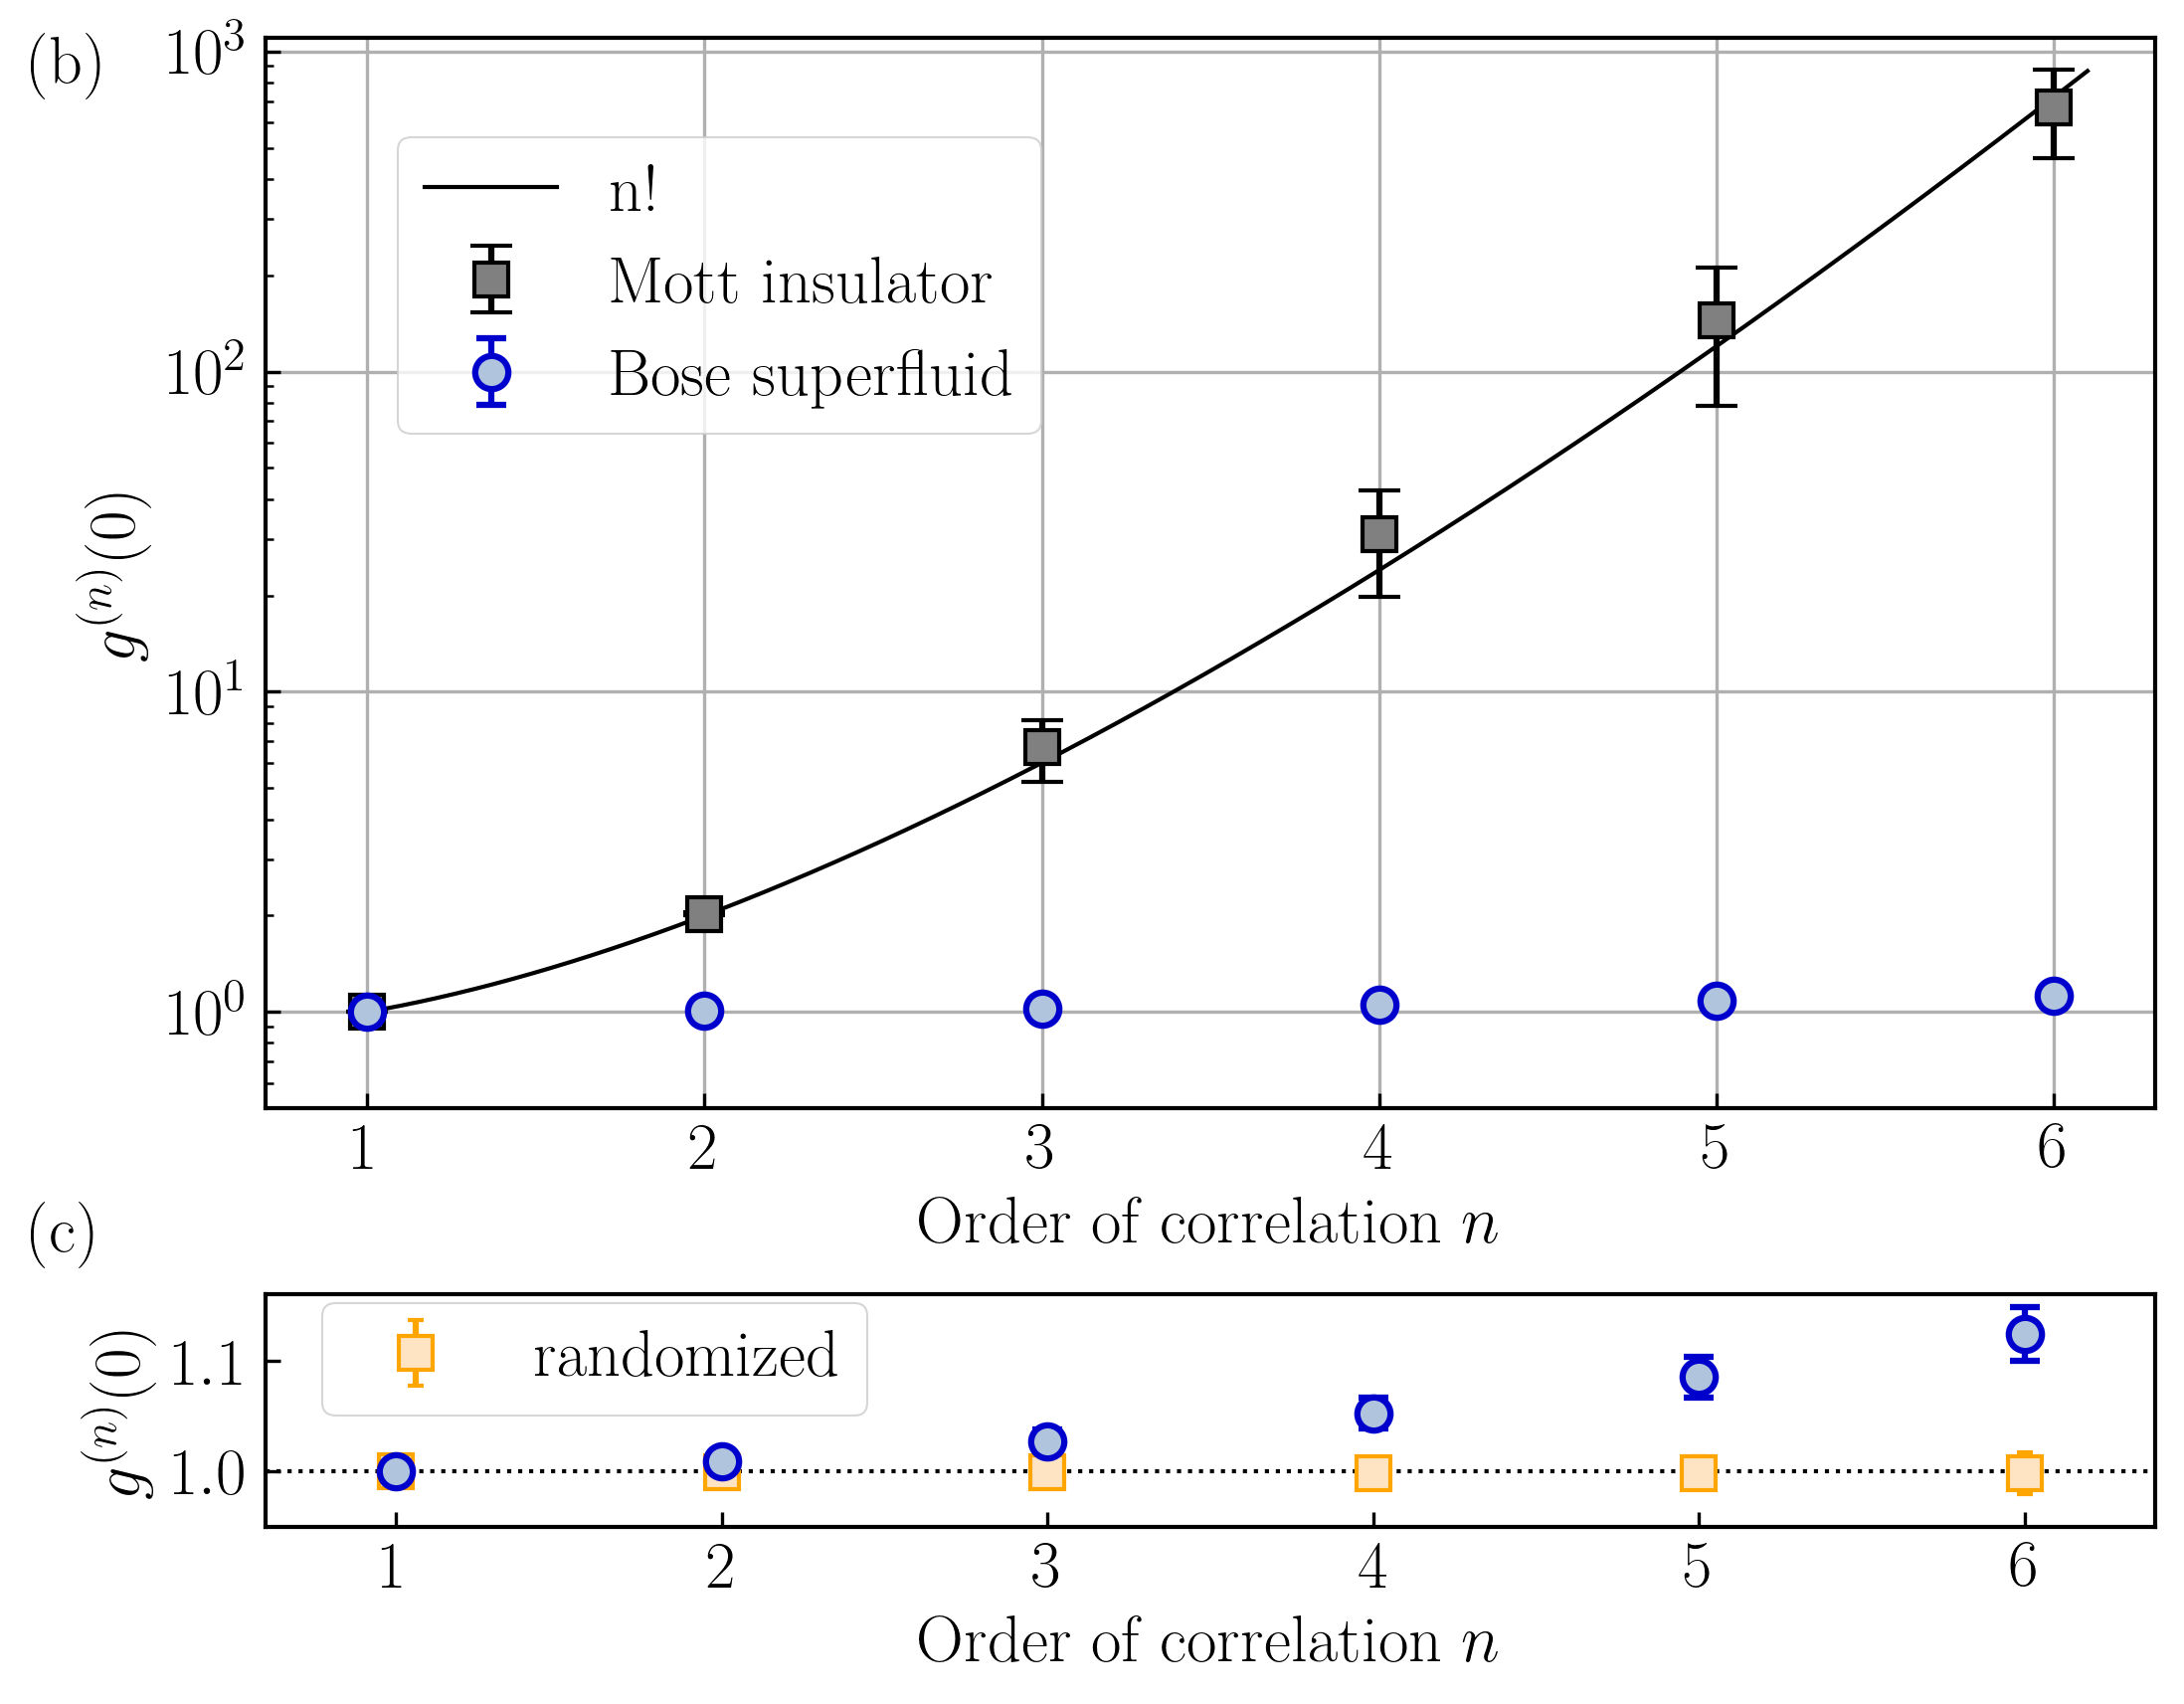

In [25]:
#########################################################  
##############       figure 1 new         ###################  
#########################################################  


plt.rcParams['figure.figsize'] = 1.2*fig_width,1.4*fig_height

#grid=plt.GridSpec(2,2,height_ratios=[0.65,1],width_ratios=[1,1])
grid=plt.GridSpec(4,1)#height_ratios=[10,10],width_ratios=[10,10])


fig=plt.figure()
grid.update(wspace=.3)#2*fig_width)
grid.update(hspace=.8)#2*fig_height)

ax3 = plt.subplot(grid[0:3, 0])
ax4 = plt.subplot(grid[3, 0])

ax3.text(0,800,'(b)')
ax3.text(0,.18,'(c)')

#plt.subplot(1,3,3)

ax3.errorbar(n_list1, gn_MOTT1, yerr=gn_MOTT_err1, fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5,label="Mott insulator")

ax3.errorbar([1], [1], yerr=[0],fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5)
# n!
x = np.linspace(1, 6.1, 1000)
ax3.plot(x, gamma(x+1), 'k', label="n!")

ax3.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'Bose superfluid')

ax3.set_xlabel('Order of correlation $n$')
ax3.set_ylabel('$g^{(n)}(0)$')


# specify the location of (left,bottom),width,height
#rect=patches.Rectangle((0.9,.9),5.2,.3, 
#                        fill = False,
#                        color = 'black',
#                        linewidth = 1,
#                       linestyle='--')#dashes=[6, 2])
#ax3.add_patch(rect)

ax3.legend(loc=(.07,.63))
ax3.grid()
ax3.set_ylim(.5,1100)
ax3.semilogy()
ax3.set_xlim([0.7,6.3])

# this is an inset axes over the main axes
#axins = plt.axes([.56, -.05, .35, .1])


ax4.errorbar(xn,gnUJ5_shuffle,yerr=err_gnUJ5_shuffle, marker='s',markersize=8,capsize=2,elinewidth=1.5,
             capthick=1.5, 
             linestyle='none',         color='orange',
        markeredgecolor='orange',
        markerfacecolor='bisque',
             markeredgewidth=1.,lw=1.,label='randomized')

ax4.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5)
ax4.legend(loc=(.03,.48))
ax4.axhline(1,color='black',linestyle='dotted')
#ax4.grid(True)
ax4.set_ylim([0.95,1.16])
ax4.set_xlim([0.6,6.4])
ax4.set_xlabel('Order of correlation $n$')
ax4.set_ylabel('$g^{(n)}(0)$')


plt.savefig('fig1.pdf', dpi=300,bbox_inches='tight')
plt.savefig('fig1.png', dpi=300,bbox_inches='tight')
plt.show()

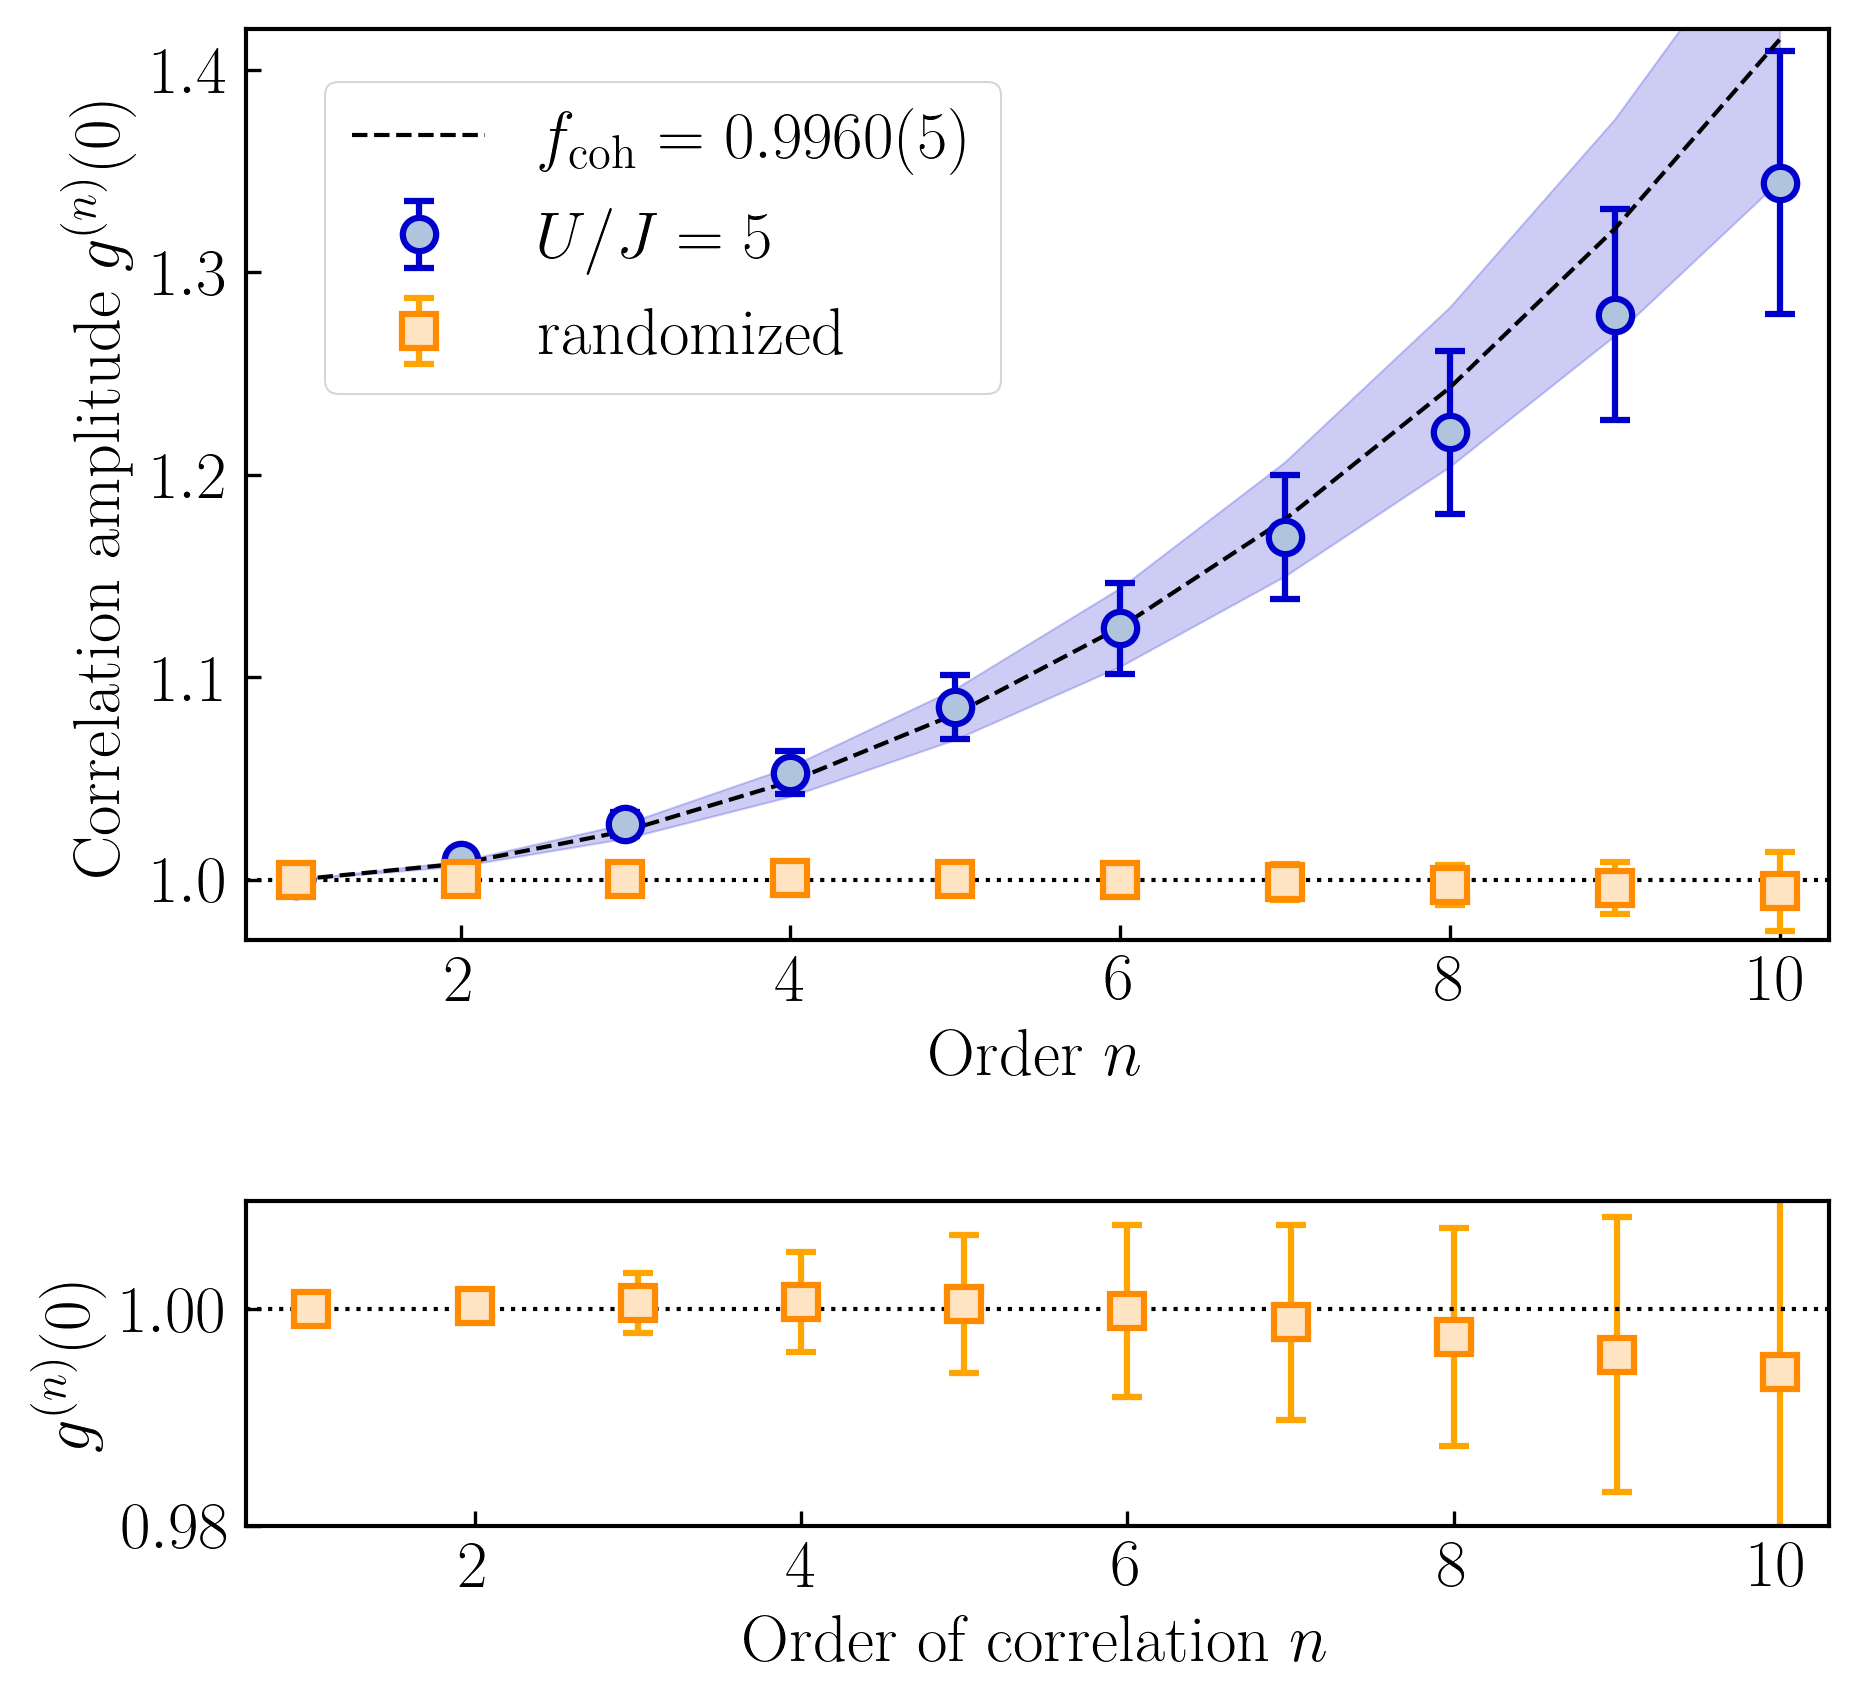

In [26]:
#########################################################  
##############       figure large orders         ################  
#########################################################  



xn_ext=[1., 2, 3 , 4, 5 ,6, 7, 8, 9, 10]
#gn2=[1.    ,     1.01429651, 1.04280105, 1.08598066, 1.14487895, 1.22122027, 1.31762124, 1.43794255, 1.58782618, 1.77547116]
gn2_ext=[1.   ,      1.00955415, 1.02749217, 1.05294742, 1.0853102,  1.12419528, 1.16942255, 1.22100851, 1.27916638, 1.34431156]
#gn2err=[0.  ,       0.00570705, 0.01719836, 0.03483282, 0.05929789, 0.09170903, 0.13381399, 0.18839608, 0.2600935,  0.3571143 ]
gn2err_ext=[0.  ,       0.00505302/np.sqrt(2*2), 0.01487432/np.sqrt(3*2), 0.02970661/np.sqrt(4*2), 0.05032684/np.sqrt(5*2), 0.0780207/np.sqrt(6*2), 
        0.11446333/np.sqrt(7*2), 0.16141694/np.sqrt(8*2), 0.22021673/np.sqrt(9*2), 0.29112596/np.sqrt(10*2)]

#gn2_rand=[1.    ,     1.00039447, 1.00107682, 1.00195831, 1.00298552, 1.00419835, 1.00584471, 1.00855839, 1.01359414, 1.02309477]
gn2_rand_ext=[1.   ,      1.00026642, 1.00055308, 1.00066238, 1.00045076, 0.99983594, 0.99880449, 0.99741879, 0.9958219,  0.99423924]
#gn2err_rand=[0.    ,     0.00084561, 0.00277285, 0.00620146, 0.01175582, 0.02039243, 0.03360578, 0.0536689,  0.08387959, 0.12881945]
gn2err_rand_ext=[0.     ,    0.00232482/np.sqrt(2*2), 0.00677344/np.sqrt(3*2), 0.01295617/np.sqrt(4*2), 0.02016122/np.sqrt(5*2), 0.02735711/np.sqrt(6*2), 
             0.03367236/np.sqrt(7*2), 0.04023288/np.sqrt(8*2), 0.05390016/np.sqrt(9*2), 0.08653596/np.sqrt(10*2)]

fc=0.9960
delta=0.0006
xnth_ext=[1., 2, 3 , 4, 5 ,6, 7, 8, 9, 10]
gn2th_ext=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6,
 1 + 42*fc**6 *(1 - fc) + 861* fc**5 *(1 - fc)**2 + 7315 * fc**4 * (1 - fc)**3 + 29365 *fc**3 *(1 - fc)**4 + 52899 *fc**2 *(1 - fc)**5 + 35273 * fc * (1-fc)**6 + 50239 * (1-fc)**7,
 1 + 56*fc**7 *(1 - fc) + 1540* fc**6 *(1 - fc)**2 + 18760 * fc**5 * (1 - fc)**3 + 117530 *fc**4 *(1 - fc)**4 + 376264 *fc**3 *(1 - fc)**5 + 564452 * fc**2 * (1-fc)**6 + 322552 * fc * (1-fc)**7+ 40319 * (1-fc)**8,
 1 + 72*fc**8 *(1 - fc) + 2556* fc**7 *(1 - fc)**2 + 42252 * fc**6 * (1 - fc)**3 + 380898 *fc**5 *(1 - fc)**4 + 1904994 *fc**4 *(1 - fc)**5 + 5080236 * fc**3 * (1-fc)**6 + 6531804 * fc**2 * (1-fc)**7+ 3265911 * fc * (1-fc)**8+ 362879 * (1-fc)**9,
 1 + 90*fc**9 *(1 - fc) + 4005* fc**8 *(1 - fc)**2 + 86280 * fc**7 * (1 - fc)**3 + 1058190 *fc**6 *(1 - fc)**4 + 7620228 *fc**5 *(1 - fc)**5 + 31751790 * fc**4 * (1-fc)**6 + 72575880 * fc**3 * (1-fc)**7+ 81647955 * fc**2 * (1-fc)**8+ 36287990 * fc * (1-fc)**9+ 3628799 * (1-fc)**10
       ]
fc=fc+delta;
gn2th1_ext=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5,  
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6,
 1 + 42*fc**6 *(1 - fc) + 861* fc**5 *(1 - fc)**2 + 7315 * fc**4 * (1 - fc)**3 + 29365 *fc**3 *(1 - fc)**4 + 52899 *fc**2 *(1 - fc)**5 + 35273 * fc * (1-fc)**6 + 50239 * (1-fc)**7,
 1 + 56*fc**7 *(1 - fc) + 1540* fc**6 *(1 - fc)**2 + 18760 * fc**5 * (1 - fc)**3 + 117530 *fc**4 *(1 - fc)**4 + 376264 *fc**3 *(1 - fc)**5 + 564452 * fc**2 * (1-fc)**6 + 322552 * fc * (1-fc)**7+ 40319 * (1-fc)**8,
 1 + 72*fc**8 *(1 - fc) + 2556* fc**7 *(1 - fc)**2 + 42252 * fc**6 * (1 - fc)**3 + 380898 *fc**5 *(1 - fc)**4 + 1904994 *fc**4 *(1 - fc)**5 + 5080236 * fc**3 * (1-fc)**6 + 6531804 * fc**2 * (1-fc)**7+ 3265911 * fc * (1-fc)**8+ 362879 * (1-fc)**9,
 1 + 90*fc**9 *(1 - fc) + 4005* fc**8 *(1 - fc)**2 + 86280 * fc**7 * (1 - fc)**3 + 1058190 *fc**6 *(1 - fc)**4 + 7620228 *fc**5 *(1 - fc)**5 + 31751790 * fc**4 * (1-fc)**6 + 72575880 * fc**3 * (1-fc)**7+ 81647955 * fc**2 * (1-fc)**8+ 36287990 * fc * (1-fc)**9+ 3628799 * (1-fc)**10
       ]

fc=fc-2*delta;
gn2th2_ext=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,  
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6,
 1 + 42*fc**6 *(1 - fc) + 861* fc**5 *(1 - fc)**2 + 7315 * fc**4 * (1 - fc)**3 + 29365 *fc**3 *(1 - fc)**4 + 52899 *fc**2 *(1 - fc)**5 + 35273 * fc * (1-fc)**6 + 50239 * (1-fc)**7,
 1 + 56*fc**7 *(1 - fc) + 1540* fc**6 *(1 - fc)**2 + 18760 * fc**5 * (1 - fc)**3 + 117530 *fc**4 *(1 - fc)**4 + 376264 *fc**3 *(1 - fc)**5 + 564452 * fc**2 * (1-fc)**6 + 322552 * fc * (1-fc)**7+ 40319 * (1-fc)**8,
 1 + 72*fc**8 *(1 - fc) + 2556* fc**7 *(1 - fc)**2 + 42252 * fc**6 * (1 - fc)**3 + 380898 *fc**5 *(1 - fc)**4 + 1904994 *fc**4 *(1 - fc)**5 + 5080236 * fc**3 * (1-fc)**6 + 6531804 * fc**2 * (1-fc)**7+ 3265911 * fc * (1-fc)**8+ 362879 * (1-fc)**9, 1 + 90*fc**9 *(1 - fc) + 4005* fc**8 *(1 - fc)**2 + 86280 * fc**7 * (1 - fc)**3 + 1058190 *fc**6 *(1 - fc)**4 + 7620228 *fc**5 *(1 - fc)**5 + 31751790 * fc**4 * (1-fc)**6 + 72575880 * fc**3 * (1-fc)**7+ 81647955 * fc**2 * (1-fc)**8+ 36287990 * fc * (1-fc)**9+ 3628799 * (1-fc)**10
       ]

fc=1.00005
gn2th_rand_ext=[1, 1 + 2*fc*(1-fc) + (1 - fc)**2  , 1  + 6 * fc**2 *(1 - fc) + 15 * fc *(1 - fc)**2 +  5*(1 - fc)**3, 
 1 + 12*fc**3 *(1 - fc) + 66* fc**2 *(1 - fc)**2 + 92 * fc * (1 - fc)**3 + 23 * (1 - fc)**4,
 1 + 20*fc**4 *(1 - fc) + 190* fc**3 *(1 - fc)**2 + 590 * fc**2 * (1 - fc)**3 + 595 *fc *(1 - fc)**4 + 119 * (1-fc)**5, 
 1 + 30*fc**5 *(1 - fc) + 435* fc**4 *(1 - fc)**2 + 2380 * fc**3 * (1 - fc)**3 + 5385 *fc**2 *(1 - fc)**4 + 4314 *fc *(1 - fc)**5 + 719 * (1-fc)**6,
 1 + 42*fc**6 *(1 - fc) + 861* fc**5 *(1 - fc)**2 + 7315 * fc**4 * (1 - fc)**3 + 29365 *fc**3 *(1 - fc)**4 + 52899 *fc**2 *(1 - fc)**5 + 35273 * fc * (1-fc)**6 + 50239 * (1-fc)**7,
 1 + 56*fc**7 *(1 - fc) + 1540* fc**6 *(1 - fc)**2 + 18760 * fc**5 * (1 - fc)**3 + 117530 *fc**4 *(1 - fc)**4 + 376264 *fc**3 *(1 - fc)**5 + 564452 * fc**2 * (1-fc)**6 + 322552 * fc * (1-fc)**7+ 40319 * (1-fc)**8,
 1 + 72*fc**8 *(1 - fc) + 2556* fc**7 *(1 - fc)**2 + 42252 * fc**6 * (1 - fc)**3 + 380898 *fc**5 *(1 - fc)**4 + 1904994 *fc**4 *(1 - fc)**5 + 5080236 * fc**3 * (1-fc)**6 + 6531804 * fc**2 * (1-fc)**7+ 3265911 * fc * (1-fc)**8+ 362879 * (1-fc)**9,
 1 + 90*fc**9 *(1 - fc) + 4005* fc**8 *(1 - fc)**2 + 86280 * fc**7 * (1 - fc)**3 + 1058190 *fc**6 *(1 - fc)**4 + 7620228 *fc**5 *(1 - fc)**5 + 31751790 * fc**4 * (1-fc)**6 + 72575880 * fc**3 * (1-fc)**7+ 81647955 * fc**2 * (1-fc)**8+ 36287990 * fc * (1-fc)**9+ 3628799 * (1-fc)**10
       ]

plt.rcParams['figure.figsize'] = fig_width,1.4*fig_height

#grid=plt.GridSpec(2,2,height_ratios=[0.65,1],width_ratios=[1,1])
grid=plt.GridSpec(3,1)#height_ratios=[10,10],width_ratios=[10,10])


fig=plt.figure()
grid.update(wspace=.3)#2*fig_width)
grid.update(hspace=.8)#2*fig_height)

ax3 = plt.subplot(grid[0:2, 0])
ax4 = plt.subplot(grid[2, 0])

#ax3.text(0,800,'(b)')
#ax3.text(0,.18,'(c)')

#plt.subplot(1,3,3)

ax3.errorbar(xn_ext,gn2_ext,yerr=gn2err_ext, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=5$')
ax3.plot(xnth_ext,gn2th_ext,'--',color='black',label=r'$f_{\rm coh}=0.9960(5)$')
ax3.fill_between(xnth_ext,gn2th1_ext, gn2th2_ext,color='mediumblue',alpha=.2)

ax3.errorbar(xn_ext,gn2_rand_ext,yerr=gn2err_rand_ext, marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',       color='orange',
        markeredgecolor='darkorange',
        markerfacecolor='bisque',
             markeredgewidth=1.5,lw=1.5,label=r'randomized')


ax3.axhline(1,color='black',linestyle='dotted')
#ax3.grid(True)
ax3.set_xlabel('Order $n$')
ax3.set_ylabel(r'Correlation amplitude $g^{(n)}(0)$')
ax3.legend(loc=[0.05,.6])
ax3.set_ylim(0.97,1.42)
ax3.set_xlim(0.7,10.3)


ax4.errorbar(xn_ext,gn2_rand_ext,yerr=gn2err_rand_ext, marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',       color='orange',
        markeredgecolor='darkorange',
        markerfacecolor='bisque',
             markeredgewidth=1.5,lw=1.5,label=r'randomized')

#ax4.grid(True)
ax4.set_ylim([0.98,1.01])
ax4.set_xlim([0.6,10.3])
ax4.set_xlabel('Order of correlation $n$')
ax4.set_ylabel('$g^{(n)}(0)$')
ax4.axhline(1,color='black',linestyle='dotted')
#ax4.plot(xnth_ext,gn2th_rand_ext,'--',color='black',label=r'$f_{\rm coh}=0.9960(5)$')

plt.savefig('fig-stat-range.pdf', dpi=300,bbox_inches='tight')
plt.show()

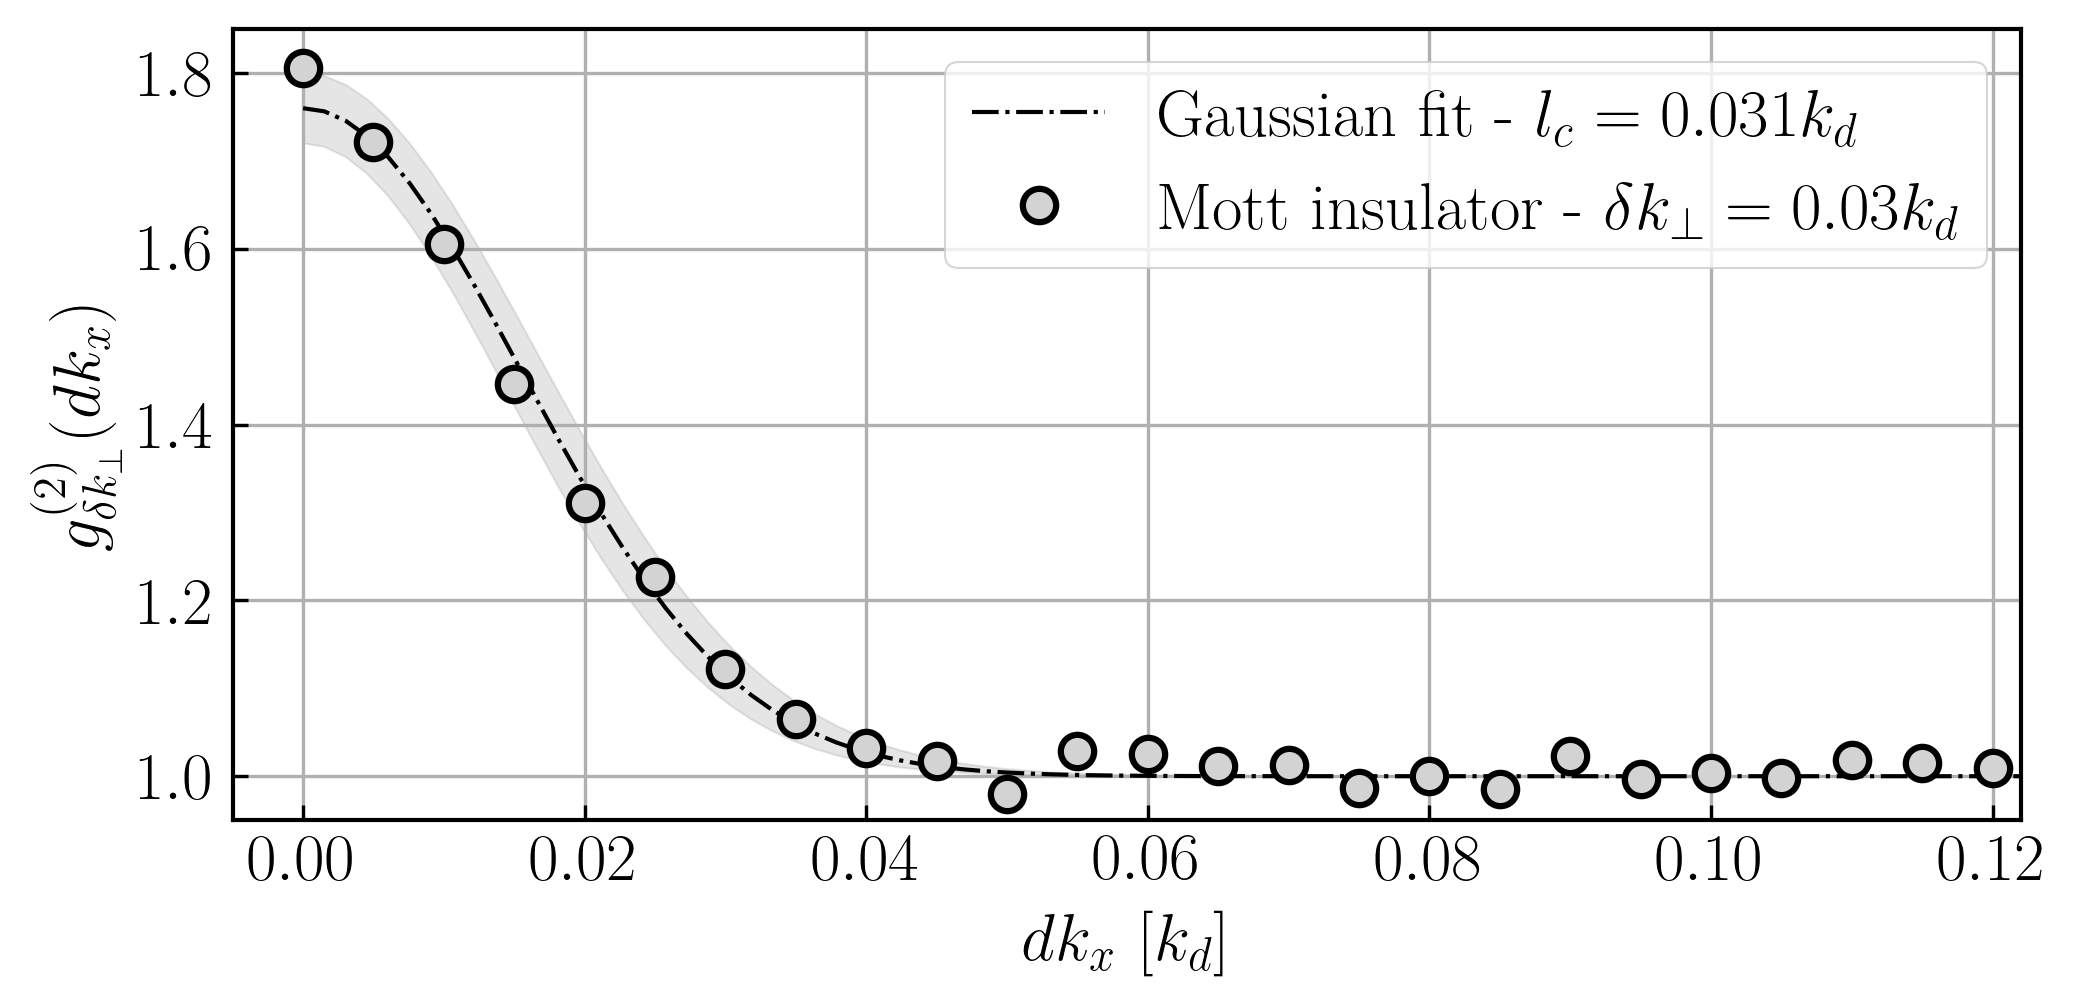

In [27]:
bins=[0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145]
g2=[1.80541326, 1.72158536, 1.60539317, 1.44594828, 1.31125398,
       1.2260893 , 1.12234867, 1.06470314, 1.03182298, 1.01707515,
       0.98031919, 1.02908882, 1.02473482, 1.01107052, 1.01241168,
       0.98685966, 0.99994079, 0.98525133, 1.02277209, 0.99677288,
       1.00312196, 0.99791412, 1.01878065, 1.01489505, 1.00925949,
       1.00344253, 0.9814652 , 1.01351556, 0.9832252 , 1.00454121]

fig, ax = plt.subplots(1, 1, figsize=(fig_width,0.7*fig_height), constrained_layout=True)

plt.errorbar(bins, g2, 
    marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='black',
        markeredgecolor='black',
        markerfacecolor='lightgray',
             markeredgewidth=1.5,lw=1.5, label='Mott insulator - $\delta k_{\perp}=0.03k_d$')#'$\delta k=l_c/6$ and $\delta_\perp=l_c$')

x=np.linspace(0,0.15,100)
lc=0.031
plt.plot(x,1+.76*np.exp(-2*x**2/(lc)**2),'-.',label='Gaussian fit - $l_c=0.031 k_d$', color='black')
plt.fill_between(x,1+.8*np.exp(-2*x**2/(lc+0.002)**2), 1+.72*np.exp(-2*x**2/(lc-0.002)**2),color='gray',alpha=.2)


plt.xlabel('$dk_x$ [$k_d$]')
plt.ylabel('$g^{(2)}_{\delta k_{\perp}}(dk_x)$')
plt.legend()
plt.xlim(-0.005,0.122)
plt.ylim(0.95,1.85)
plt.grid()

plt.savefig('fig-g2-Mott.pdf', dpi=300,bbox_inches='tight')
plt.show()

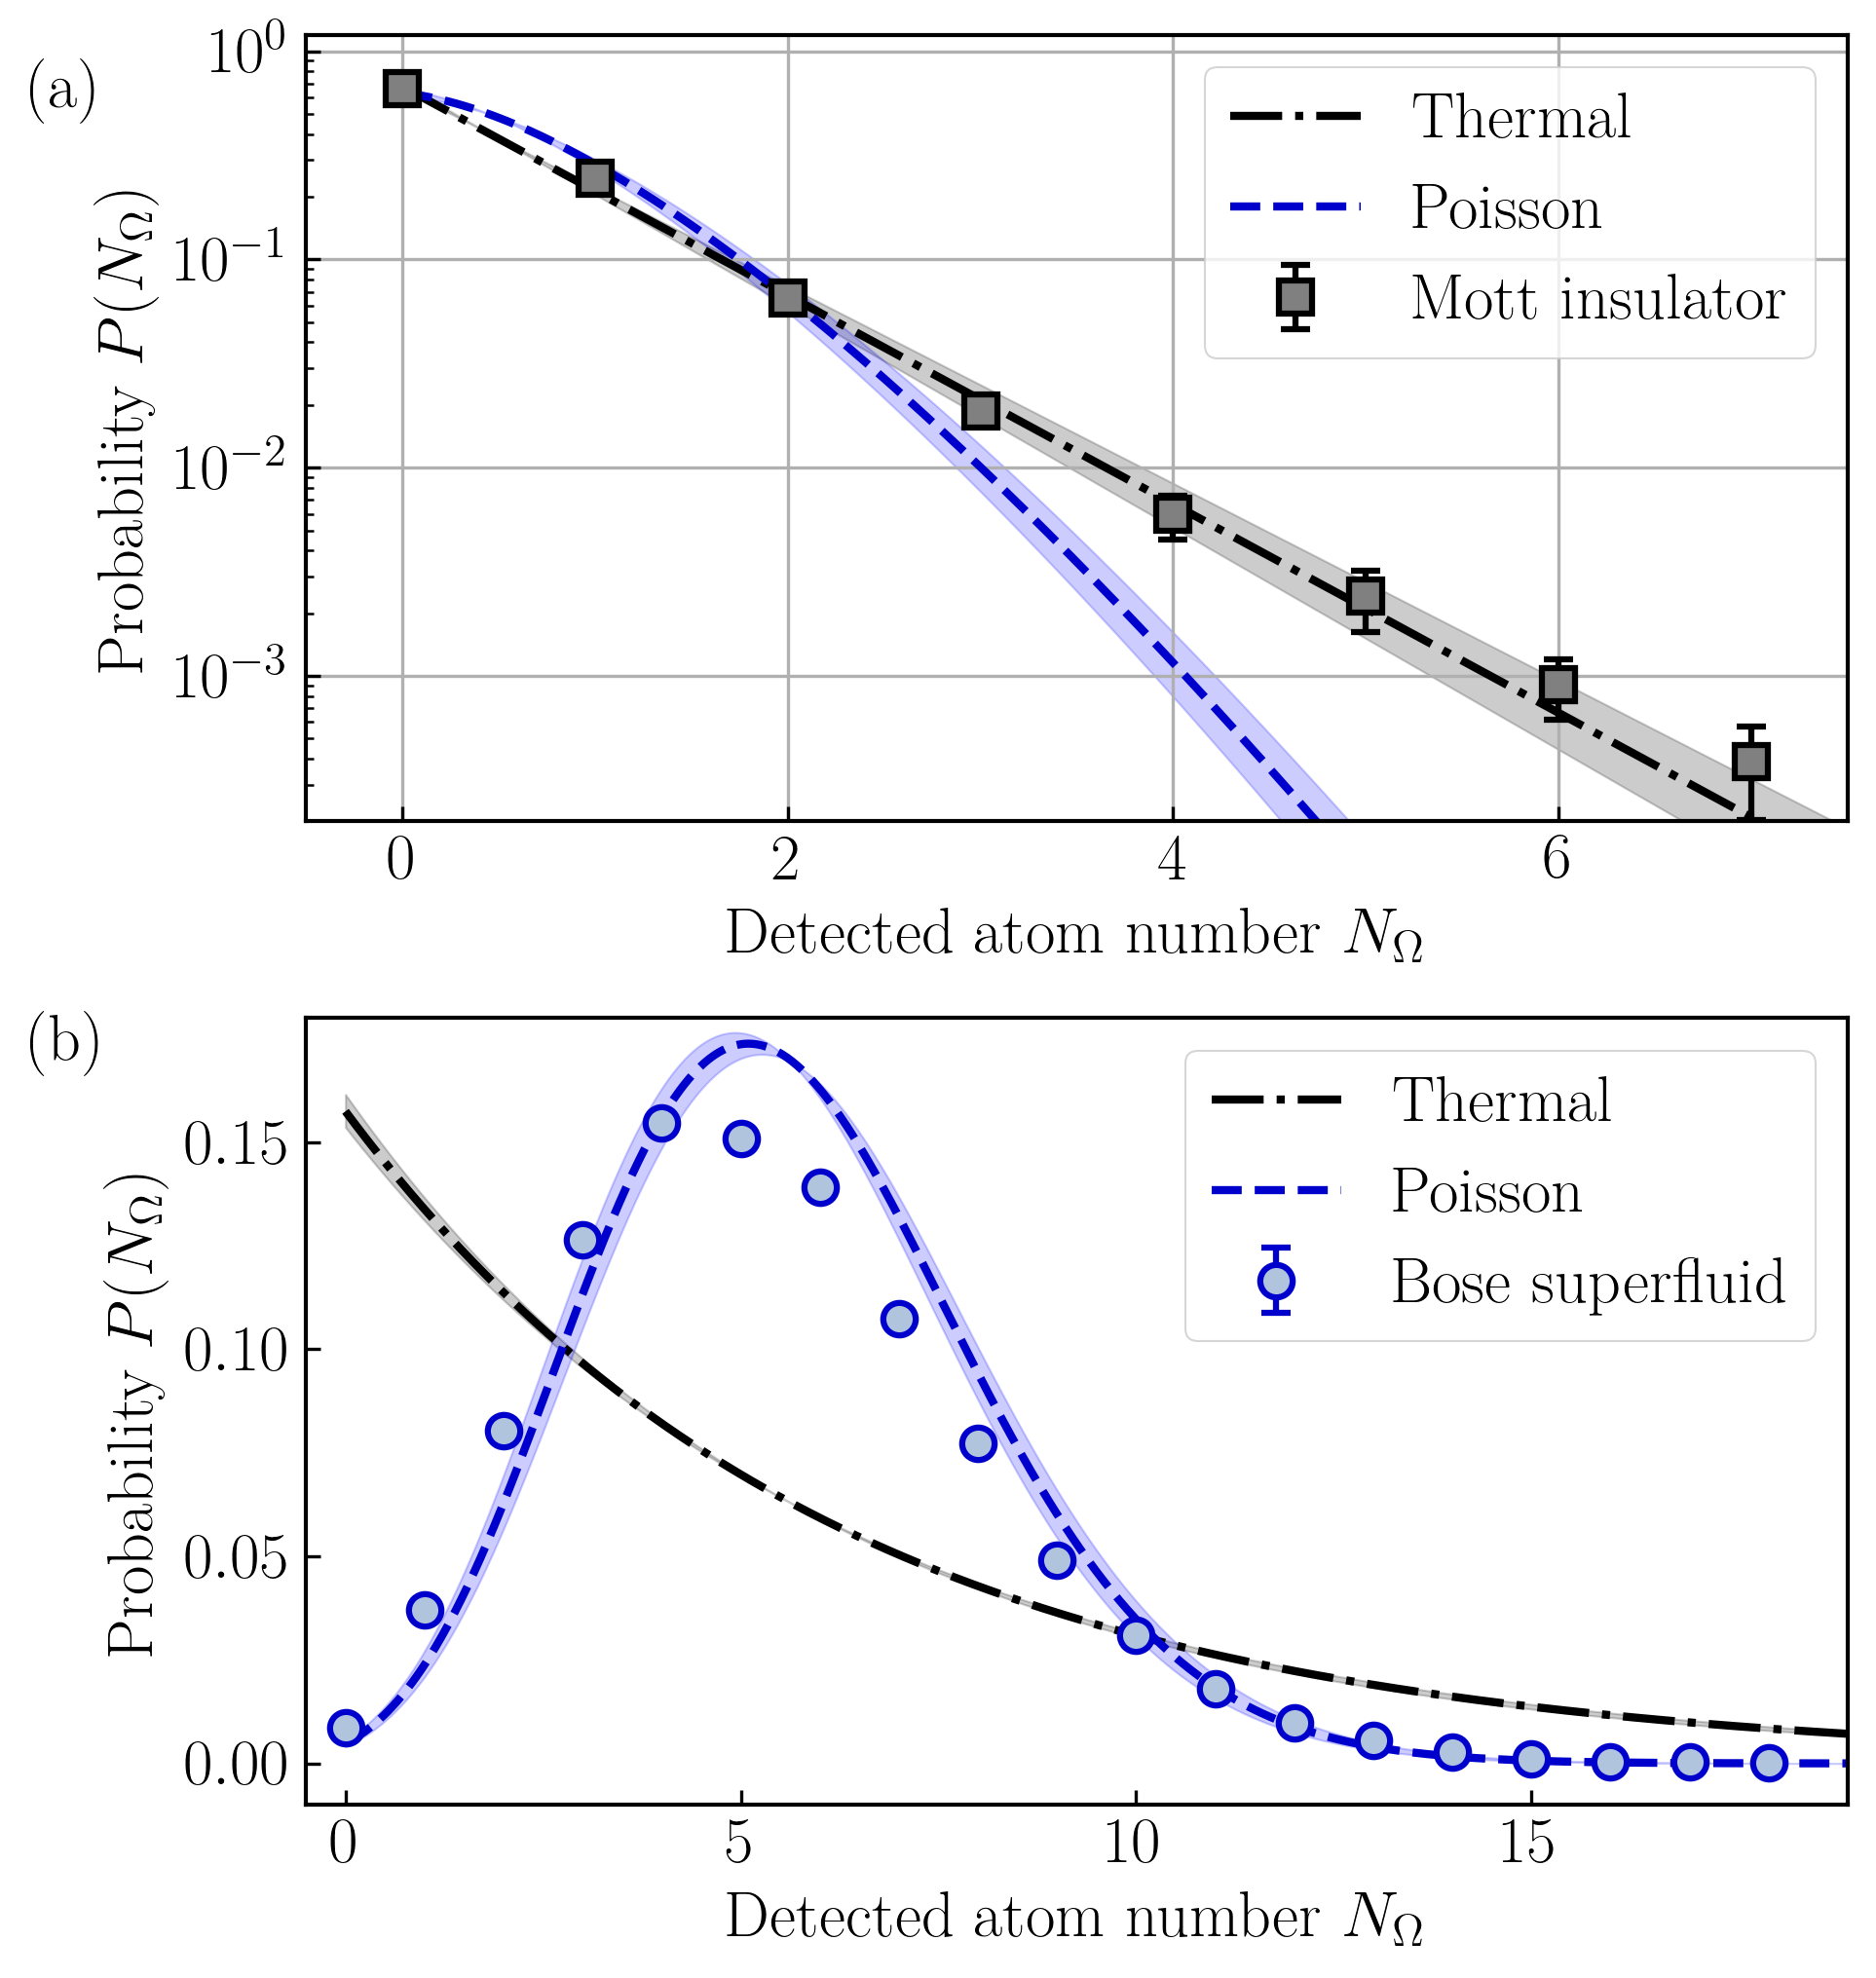

In [28]:
#########################################################  
##############       figure 1         ###################  
#########################################################  


plt.rcParams['figure.figsize'] = fig_width,1.7*fig_height


fig=plt.figure()

fig.subplots_adjust(hspace=0.25)

ax2 = plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,2)

ax1.text(-4,.4,'(a)')
ax1.text(-4,.17,'(b)')

ax1.errorbar(Nbin_UJ5, HistoN_UJ5, yerr=err_HistoN_UJ5,
         marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5,
        linestyle='none', color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'Bose superfluid')

ax1.plot(xN, thermal_UJ5,'-.',linewidth=2,color='black',label='Thermal')
ax1.fill_between(xN,thermal_UJ5p, thermal_UJ5m,color='black',alpha=.2)

ax1.plot(xN, poisson_UJ5,'--',linewidth=2,color='mediumblue',label='Poisson')
ax1.fill_between(xN,poisson_UJ5p, poisson_UJ5m,color='blue',alpha=.2)

ax1.set_ylim(-.01, 0.18)
ax1.set_xlim(-0.5, 19)
#ax1.semilogy()

#ax1.grid()
ax1.legend()
ax1.set_ylabel(r'Probability $P(N_{\Omega})$')
ax1.set_xlabel(r'Detected atom number $N_{\Omega}$')


#plt.subplot(1,3,2)

ax2.errorbar(Nbin_Mott, HistoN_Mott, yerr=err_HistoN_Mott,
    marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5, label=r"Mott insulator")
xN = np.linspace(0, 20, 1000)

ax2.plot(xN, thermal_Mott,'-.',linewidth=2,color='black',label='Thermal')
ax2.fill_between(xN,thermal_Mottp, thermal_Mottm,color='black',alpha=.2)

ax2.plot(xN, poisson_Mott,'--',linewidth=2,color='mediumblue',label='Poisson')
ax2.fill_between(xN,poisson_Mottp, poisson_Mottm,color='blue',alpha=.2)

ax2.semilogy()
ax2.set_ylim(2e-4, 1.2)
ax2.set_xlim(-.5,7.5)

ax2.grid()
ax2.legend()
ax2.set_ylabel(r'Probability $P(N_{\Omega})$')
ax2.set_xlabel(r'Detected atom number $N_{\Omega}$')


#plt.subplot(1,3,3)

ax3.errorbar(n_list1, gn_MOTT1, yerr=gn_MOTT_err1, fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5,label="Mott insulator")

ax3.errorbar([1], [1], yerr=[0],fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5)


plt.savefig('fig2.pdf', dpi=300,bbox_inches='tight')
plt.show()

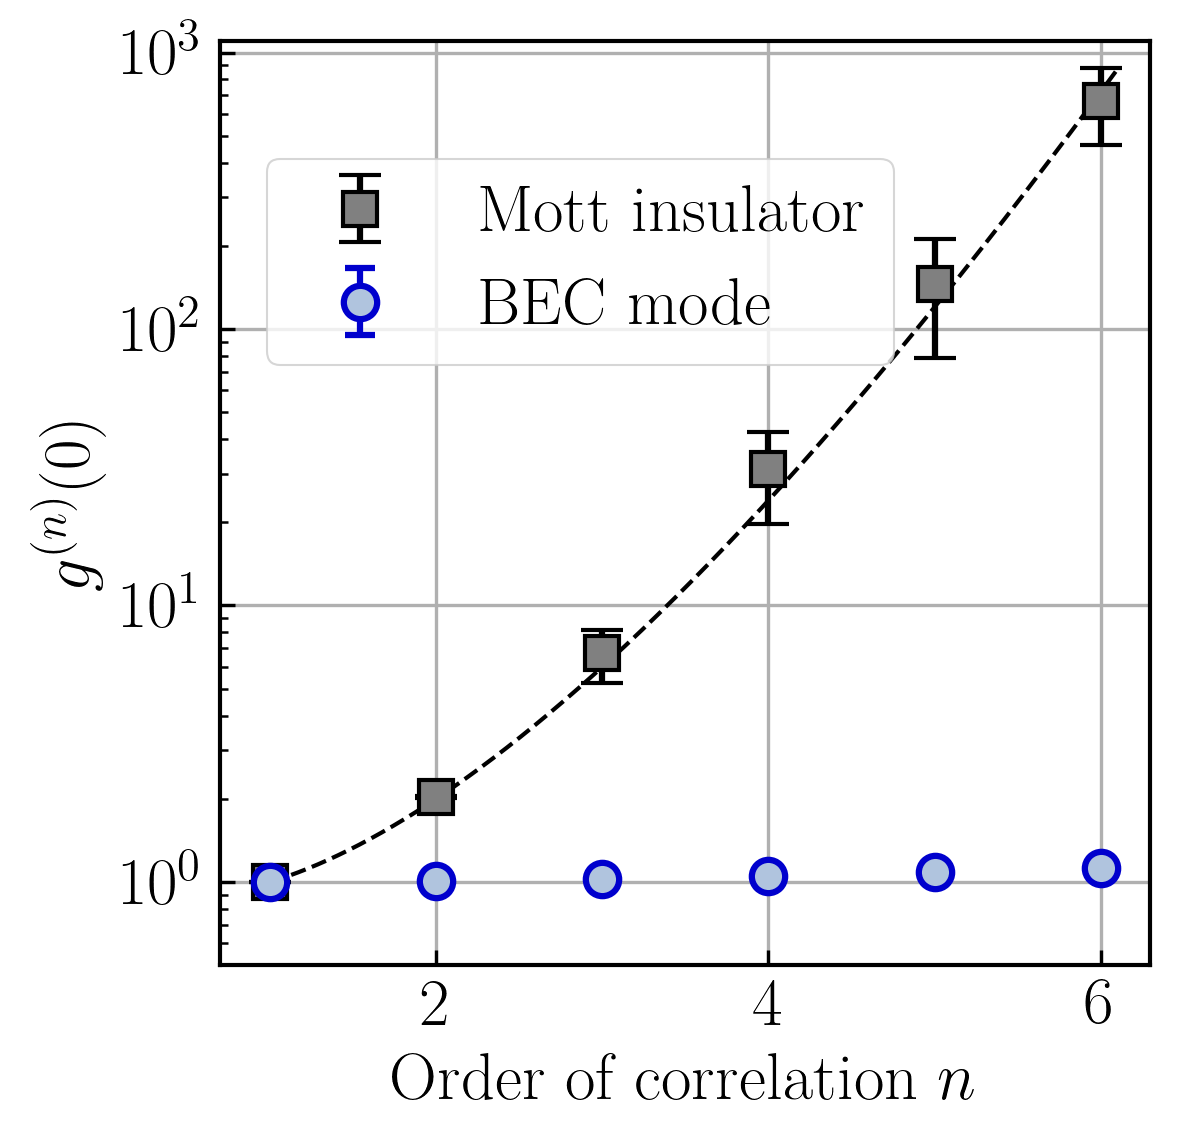

In [29]:
fig,ax3=plt.subplots(1,1,figsize=[4,4])

ax3.errorbar(n_list1, gn_MOTT1, yerr=gn_MOTT_err1, fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5,label="Mott insulator")

ax3.errorbar([1], [1], yerr=[0],fmt="s",markersize=8,
        linestyle='none',
        #color=(0/255,79/255,0/255),
        color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
        markeredgewidth=1.0,lw=1.5,
        capsize=5)
# n!
x = np.linspace(1, 6.1, 1000)
ax3.plot(x, gamma(x+1), '--', color='black')#,label="n!")

ax3.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'BEC mode')

ax3.set_xlabel('Order of correlation $n$')
ax3.set_ylabel('$g^{(n)}(0)$')


# specify the location of (left,bottom),width,height
#rect=patches.Rectangle((0.9,.9),5.2,.3, 
#                        fill = False,
#                        color = 'black',
#                        linewidth = 1,
#                       linestyle='--')#dashes=[6, 2])
#ax3.add_patch(rect)

ax3.legend(loc=(.05,.65))
ax3.grid()
ax3.set_ylim(0.5,1100)
ax3.semilogy()
ax3.set_xlim([0.7,6.3])

plt.savefig('Key-img.png', dpi=300,bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

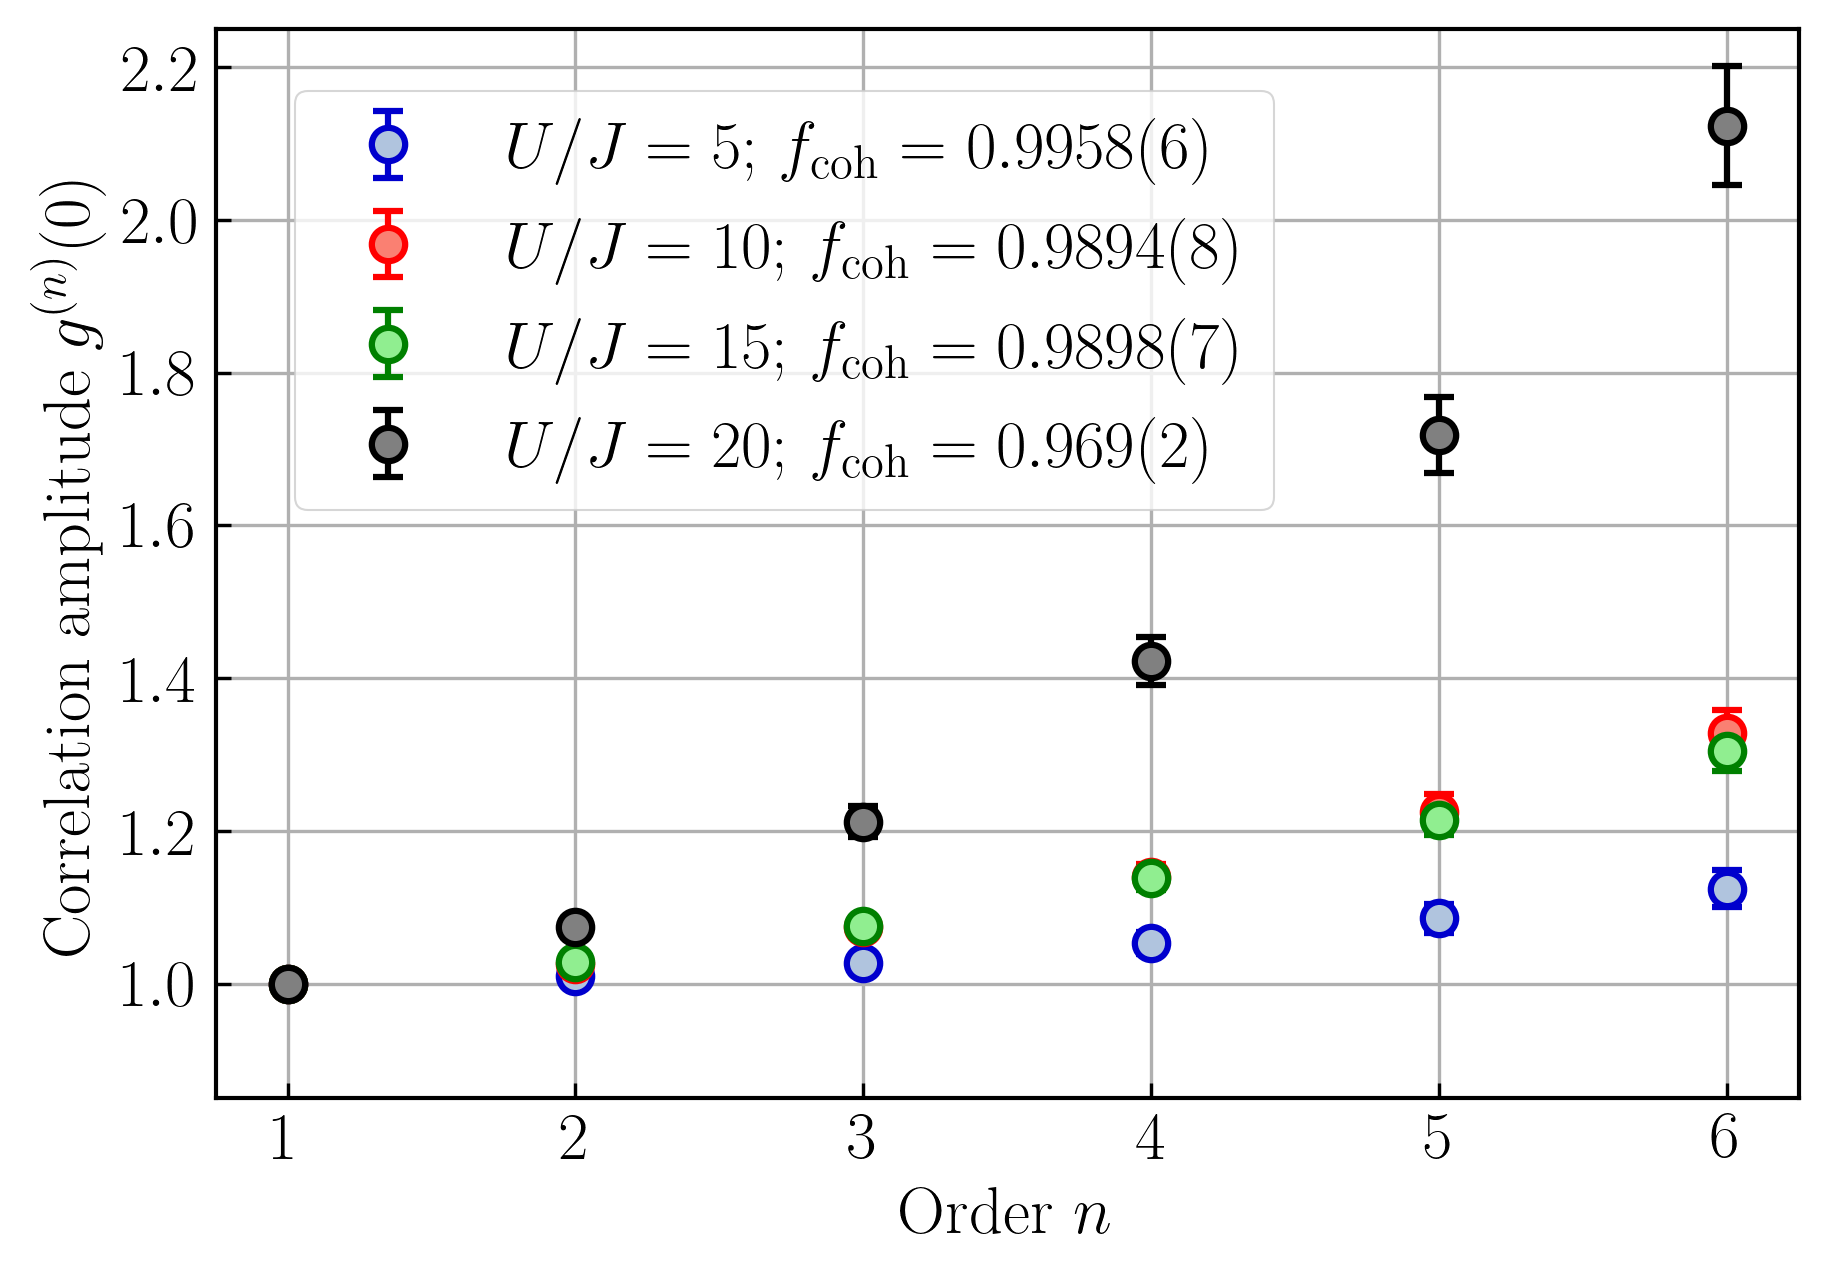

In [30]:
#########################################################  
##############       figure Supp Matt         ###################  
######################################################### 



fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=5$; $f_{\rm coh}=0.9958(6)$')
#plt.plot(xn,gn5th,'--',color='blue')
#plt.fill_between(xn,gn5th1, gn5th2,color='lightblue',alpha=.5)

plt.errorbar(xn,gn10,yerr=gn10err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='red',
             markeredgecolor='red',markerfacecolor='salmon',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=10$; $f_{\rm coh}=0.9894(8)$')
#plt.plot(xn,gn10th,'--',color='red')
#plt.fill_between(xn,gn10th1, gn10th2,color='salmon',alpha=.5)

plt.errorbar(xn,gn15,yerr=gn15err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='green',
             markeredgecolor='green',markerfacecolor='lightgreen',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=15$; $f_{\rm coh}=0.9898(7)$')
#plt.plot(xn,gn15th,'--',color='green')
#plt.fill_between(xn,gn15th1, gn15th2,color='limegreen',alpha=.5)

plt.errorbar(xn,gn20,yerr=gn20err,  
             marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=20$; $f_{\rm coh}=0.969(2)$')
#plt.plot(xn,gn20th,'--',color='black')
#plt.fill_between(xn,gn20th1, gn20th2,color='gray',alpha=.5)

plt.ylim(0.85,2.25)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'Correlation amplitude $g^{(n)}(0)$')
plt.legend(loc=[0.05,0.55])

plt.savefig('fig2-SI.pdf', dpi=300,bbox_inches='tight')
plt.show

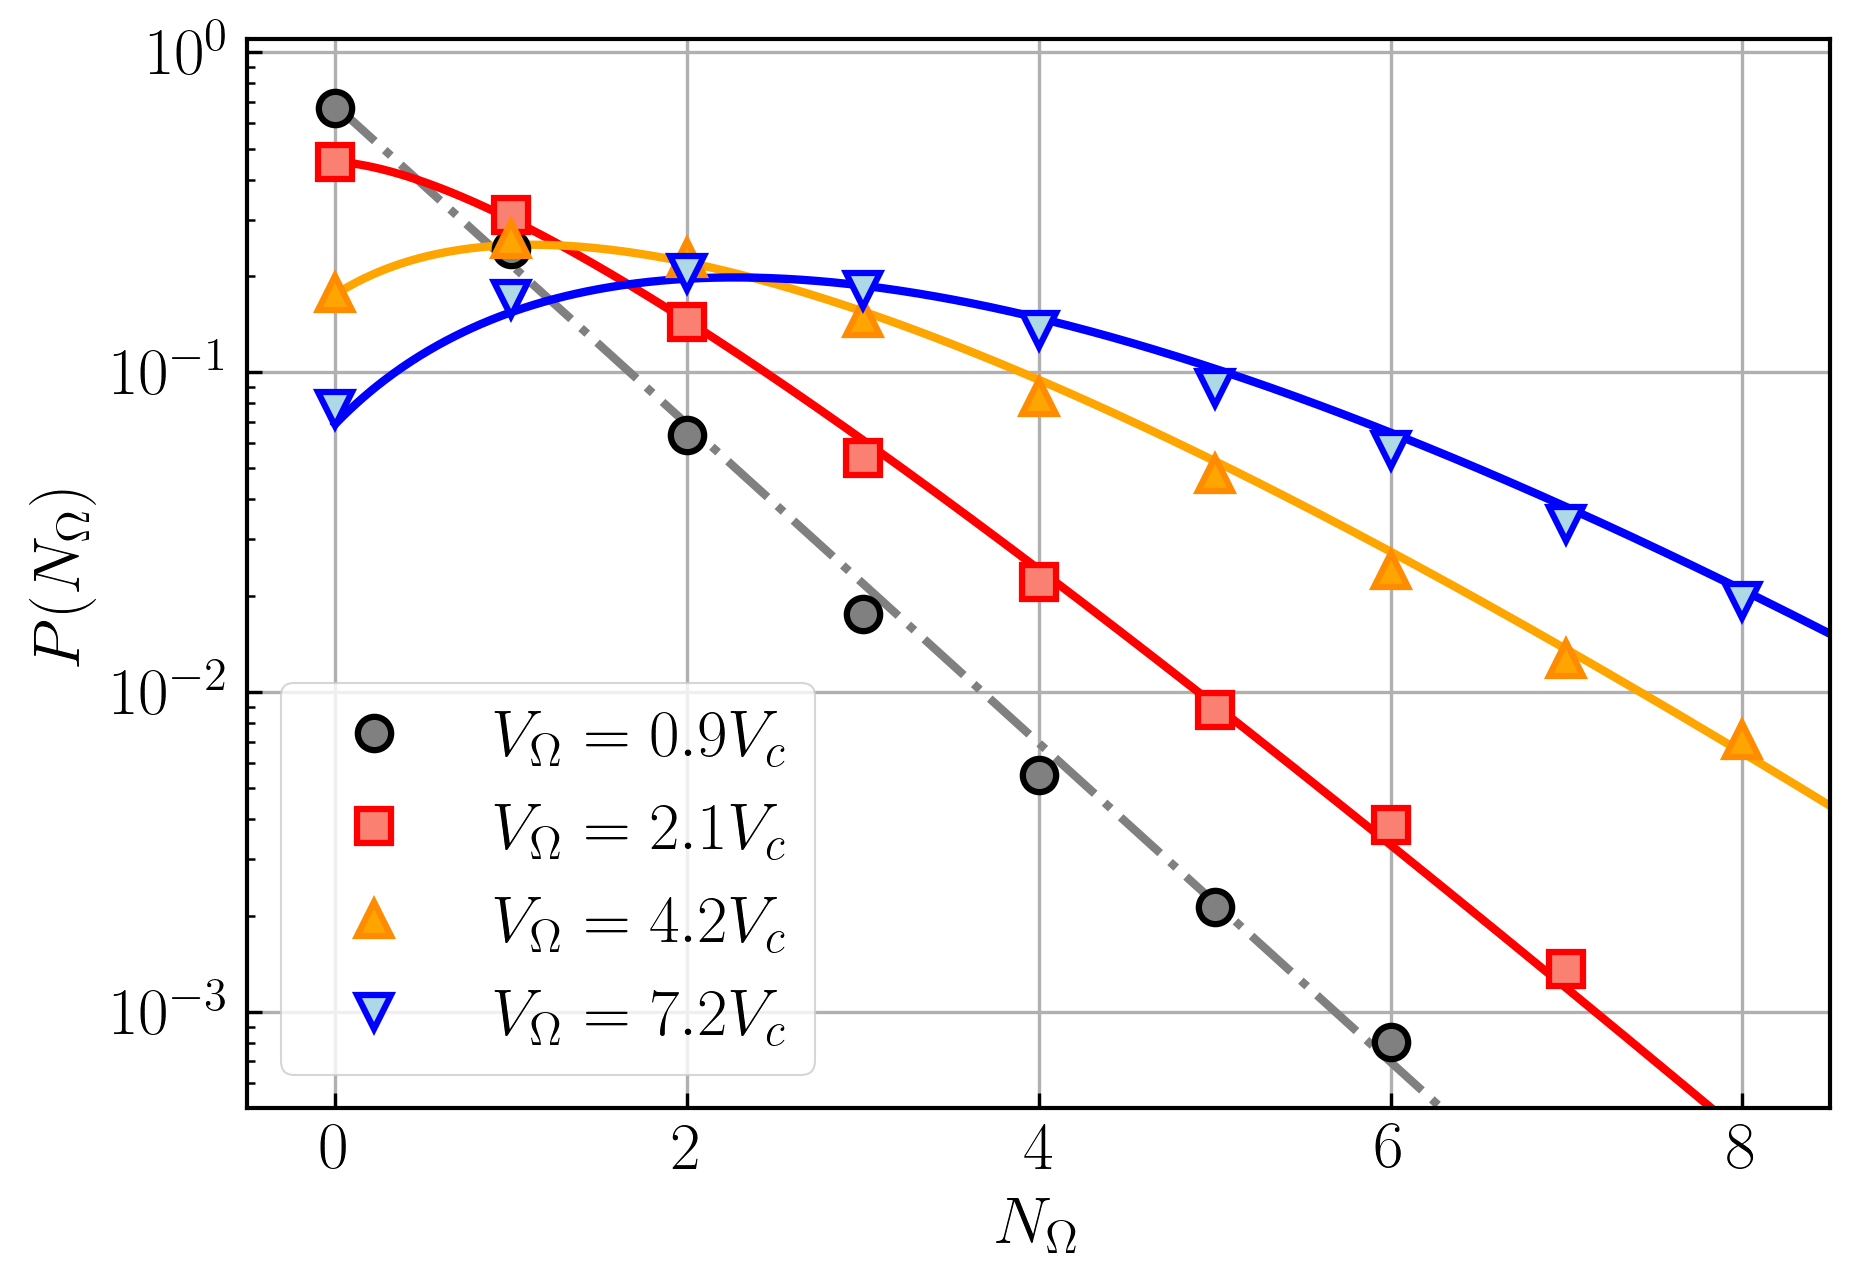

In [31]:
#########################################################  
##############       figure Supp Matt         ###################  
######################################################### 
# -- Poisson
def poisson(n, a=1):
    return a ** n / factorial(n) * np.exp(-a)


# -- Thermal / Bose
def thermal(n, n_mean=2):
    q = n_mean / (1 + n_mean)
    return (1 - q) * q ** n


# -- Multi thermal
def multi_thermal(n, M, n_mean):
    A = factorial(n + M - 1) / factorial(n) / factorial(M - 1)
    B = (n_mean / M) ** n / (1 + n_mean / M) ** (n + M)
    return A * B

#Mott subsets @ u=76
x = np.linspace(0, 10, 1000)

x_order=[0., 1., 2., 3., 4., 5., 6., 7., 8.]

data_Mott_dk0p03=[9.36140758e-01, 5.93433216e-02, 4.14191935e-03, 3.12597687e-04, 4.46568124e-05, 
                  1.67463046e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]
data_Mott_dk0p04=[8.66522132e-01, 1.15136689e-01, 1.53616064e-02, 2.37670137e-03, 4.75340274e-04, 
                  6.95619913e-05, 5.79683261e-05, 0.00000000e+00, 0.00000000e+00]
data_Mott_dk0p06=[6.67195052e-01, 2.42606933e-01, 6.35621849e-02, 1.75666545e-02, 5.50906918e-03, 
                  2.13086638e-03, 8.05571436e-04, 0.00000000e+00, 0.00000000e+00]
data_Mott_dk0p08=[4.52845762e-01, 3.10557669e-01, 1.43902964e-01, 5.40802412e-02, 2.21057920e-02,
                  8.75619034e-03, 3.83980478e-03, 1.36366899e-03, 0]
data_Mott_dk0p1=[1.76599887e-01, 2.60126861e-01, 2.27720907e-01, 1.47836463e-01, 8.34641713e-02, 
                 4.81065126e-02, 2.41160585e-02, 1.26860516e-02, 7.09665264e-03]
data_Mott_dk0p12=[7.67104933e-02, 1.69332552e-01, 2.04672975e-01, 1.80051922e-01, 1.35750775e-01,
                  8.93560003e-02, 5.71978896e-02, 3.34142869e-02, 1.92613684e-02]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

#plt.plot(x_order,data_Mott_dk0p03,'o',label='$\delta k =0.03 k_d$')
#thermal = dist.thermal(x, 0.0688)
#plt.plot(x, thermal,'-.',linewidth=2,color='blue')

#plt.plot(x_order,data_Mott_dk0p04,'o',label='$\delta k =0.04 k_d$')
#thermal = dist.thermal(x, 0.15566)
#plt.plot(x, thermal,'-.',linewidth=2,color='orange')

plt.errorbar(x_order, data_Mott_dk0p06, 
    marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5, label='$V_{\Omega} = 0.9 V_c$')
#plt.plot(x, thermal_dist,'-.',linewidth=1,color='gray')
multi_thermal_dist = multi_thermal(x, 1, 0.4649)
plt.plot(x, multi_thermal_dist,'-.',linewidth=2,color='gray')#,label='Multimode $M=2.1$')


plt.errorbar(x_order, data_Mott_dk0p08, 
    marker='s',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='red',
        markeredgecolor='red',
        markerfacecolor='salmon',
             markeredgewidth=1.5,lw=1.5, label='$V_{\Omega} = 2.1 V_c$')
thermal_dist = thermal(x, 0.9494)
#plt.plot(x, thermal_dist,'-.',linewidth=1,color='red')
multi_thermal_dist = multi_thermal(x, 2.15, 0.9494)
plt.plot(x, multi_thermal_dist,'-',linewidth=2,color='red')#,label='Multimode $M=2.1$')

plt.errorbar(x_order, data_Mott_dk0p1, 
    marker='^',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',       
        markeredgecolor='darkorange',
        markerfacecolor='orange',
             markeredgewidth=1.5,lw=1.5, label='$V_{\Omega} = 4.2 V_c$')
thermal_dist = thermal(x, 2.161)
#plt.plot(x, thermal_dist,'-.',linewidth=1,color='orange')
multi_thermal_dist = multi_thermal(x, 4.2, 2.161)
plt.plot(x, multi_thermal_dist,'-',linewidth=2,color='orange')#,label='Multimode $M=4.2$')

plt.errorbar(x_order, data_Mott_dk0p12, 
    marker='v',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',       
        markeredgecolor='blue',
        markerfacecolor='lightblue',
             markeredgewidth=1.5,lw=1.5, label='$V_{\Omega} = 7.2 V_c$')
thermal_dist = thermal(x, 3.24)
#plt.plot(x, thermal_dist,'-.',linewidth=1,color='blue')
multi_thermal_dist = multi_thermal(x, 7.2, 3.24)
plt.plot(x, multi_thermal_dist,'-',linewidth=2,color='blue')#,label='Multimode $M=4.2$')

plt.semilogy()
plt.ylim(5e-4, 1.1)
plt.xlim(-0.5,8.5)

plt.grid()
plt.legend()
plt.ylabel(r'$P(N_{\Omega})$')
plt.xlabel(r'$N_{\Omega}$')

plt.savefig('fig0-SI.pdf', dpi=300,bbox_inches='tight')
plt.show()

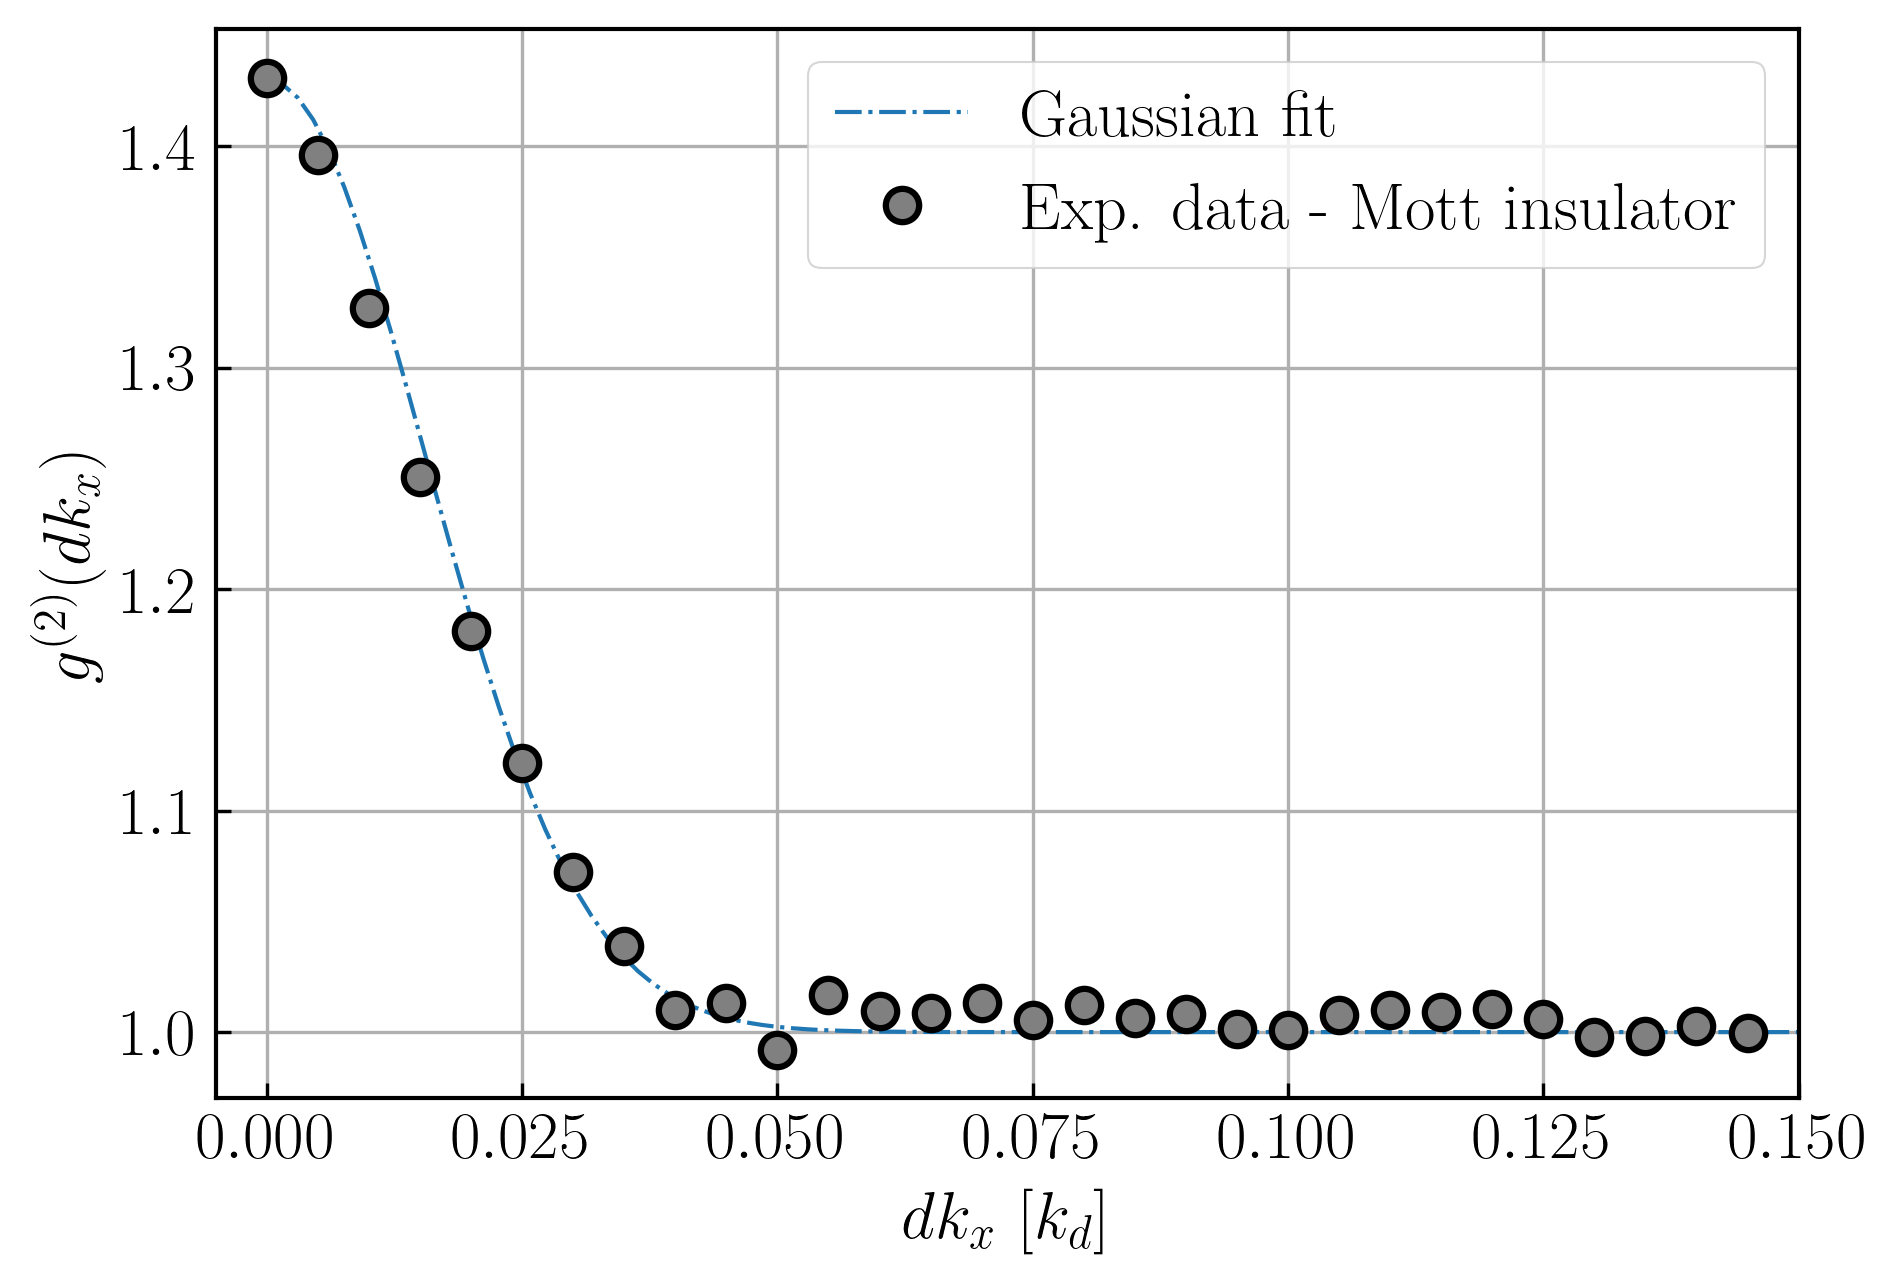

In [32]:
# Mott data - delta k_perp=0.03 ; delta k=0.005

bins = [0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145]
g2_Mott=[1.43090788, 1.39605703, 1.32677082, 1.25064517, 1.18121455,
       1.12130354, 1.07217101, 1.03905474, 1.00986816, 1.0130664 ,
       0.99211127, 1.01668963, 1.00936073, 1.00862178, 1.01322467,
       1.00537822, 1.01238419, 1.00620948, 1.00803535, 1.00130882,
       1.00103665, 1.00752456, 1.01017647, 1.00913989, 1.01031705,
       1.00609198, 0.99796185, 0.99845209, 1.0027745 , 0.99937301]

fig,ax=plt.subplots(1,1,figsize=[fig_width,fig_height])

plt.errorbar(bins, g2_Mott, 
    marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5, label='Exp. data - Mott insulator')#'$\delta k=l_c/6$ and $\delta_\perp=l_c$')

x=np.linspace(0,0.15,100)
lc=0.031
plt.plot(x,1+.43*np.exp(-2*x**2/(lc)**2),'-.',label='Gaussian fit')

plt.xlabel('$dk_x$ [$k_d$]')
plt.ylabel('$g^{(2)}(dk_x)$')
plt.legend()
plt.xlim(-0.005,0.15)
plt.grid()
plt.show()

In [33]:
###########################
# Loading density profiles
###########################

data_u5=np.loadtxt("density_5k_5ms_v14_cut_width_0p03_range_1p2_high_flux.txt")

x_UJ5=data_u5[:,0]
y_UJ5=data_u5[:,1]

y_UJ5=[x_UJ5/max(y_UJ5) for x_UJ5 in y_UJ5]


data_u20=np.loadtxt("dataUJ20.txt")

y_UJ20=data_u20[0,:]
y_UJ20=y_UJ20/max(y_UJ20)
x_UJ20=data_u20[1,:]

###########################
# Fitting lorentzian to the tails
###########################

def lor(dk, Amp, sig, N=1):
    return  Amp/4 * sig**2/ (dk**2+(sig/2)**2)

def gauss(dk, Amp, sig, off, N=1):
    return  Amp * np.exp(-dk**2/sig**2) + off

xmin=840
xmax=1160
xM=955
xMin=1050

kspace=np.concatenate((x_UJ20[xmin:xM],x_UJ20[xMin:xmax]), axis=0)
func=np.concatenate((y_UJ20[xmin:xM],y_UJ20[xMin:xmax]), axis=0)
#plt.semilogy(kspace,func,linewidth=3,color='gray',label=r'$U/J=20$')

fit_func = partial(lor, N=1)
fit_guess=[0.03,0.1]

fit_res20, cov20 = curve_fit(fit_func, 
                        kspace, 
                        func,
                        p0=fit_guess) 
err20 = np.sqrt(np.diag(cov20))
print("size ",fit_res20[1])

#xk=np.linspace(-.6,.6,1000)
#plt.plot(xk,lor(xk,fit_res20[0],fit_res20[1],1))
#plt.plot(xk,lor(xk,fit_res20[0]+err20[0],fit_res20[1]-err20[1],1))
#plt.plot(xk,lor(xk,fit_res20[0]-err20[0],fit_res20[1]+err20[1],1))
#plt.show()


##########################################@

xmin=60
xmax=180
xM=95
xMin=140

kspace=np.concatenate((x_UJ5[xmin:xM],x_UJ5[xMin:xmax]), axis=0)
func=np.concatenate((y_UJ5[xmin:xM],y_UJ5[xMin:xmax]), axis=0)

#plt.figure()
#plt.semilogy(kspace,func,linewidth=3,color='gray',label=r'$U/J=20$')

fit_func = partial(lor, N=1)
#fit_guess=[0.01,0.11, 5e-5]  # for gaussian
fit_guess=[0.01,0.11]

fit_res5, cov5 = curve_fit(fit_func, 
                        kspace, 
                        func,
                        p0=fit_guess) 
err5 = np.sqrt(np.diag(cov5))
print("size ",fit_res5[1])

#xk=np.linspace(-.6,.6,1000)
#plt.plot(xk,lor(xk,fit_res5[0],fit_res5[1],1))


size  0.1110631406875699
size  0.10868907855345206


/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/1600297170.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/1600297170.py:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


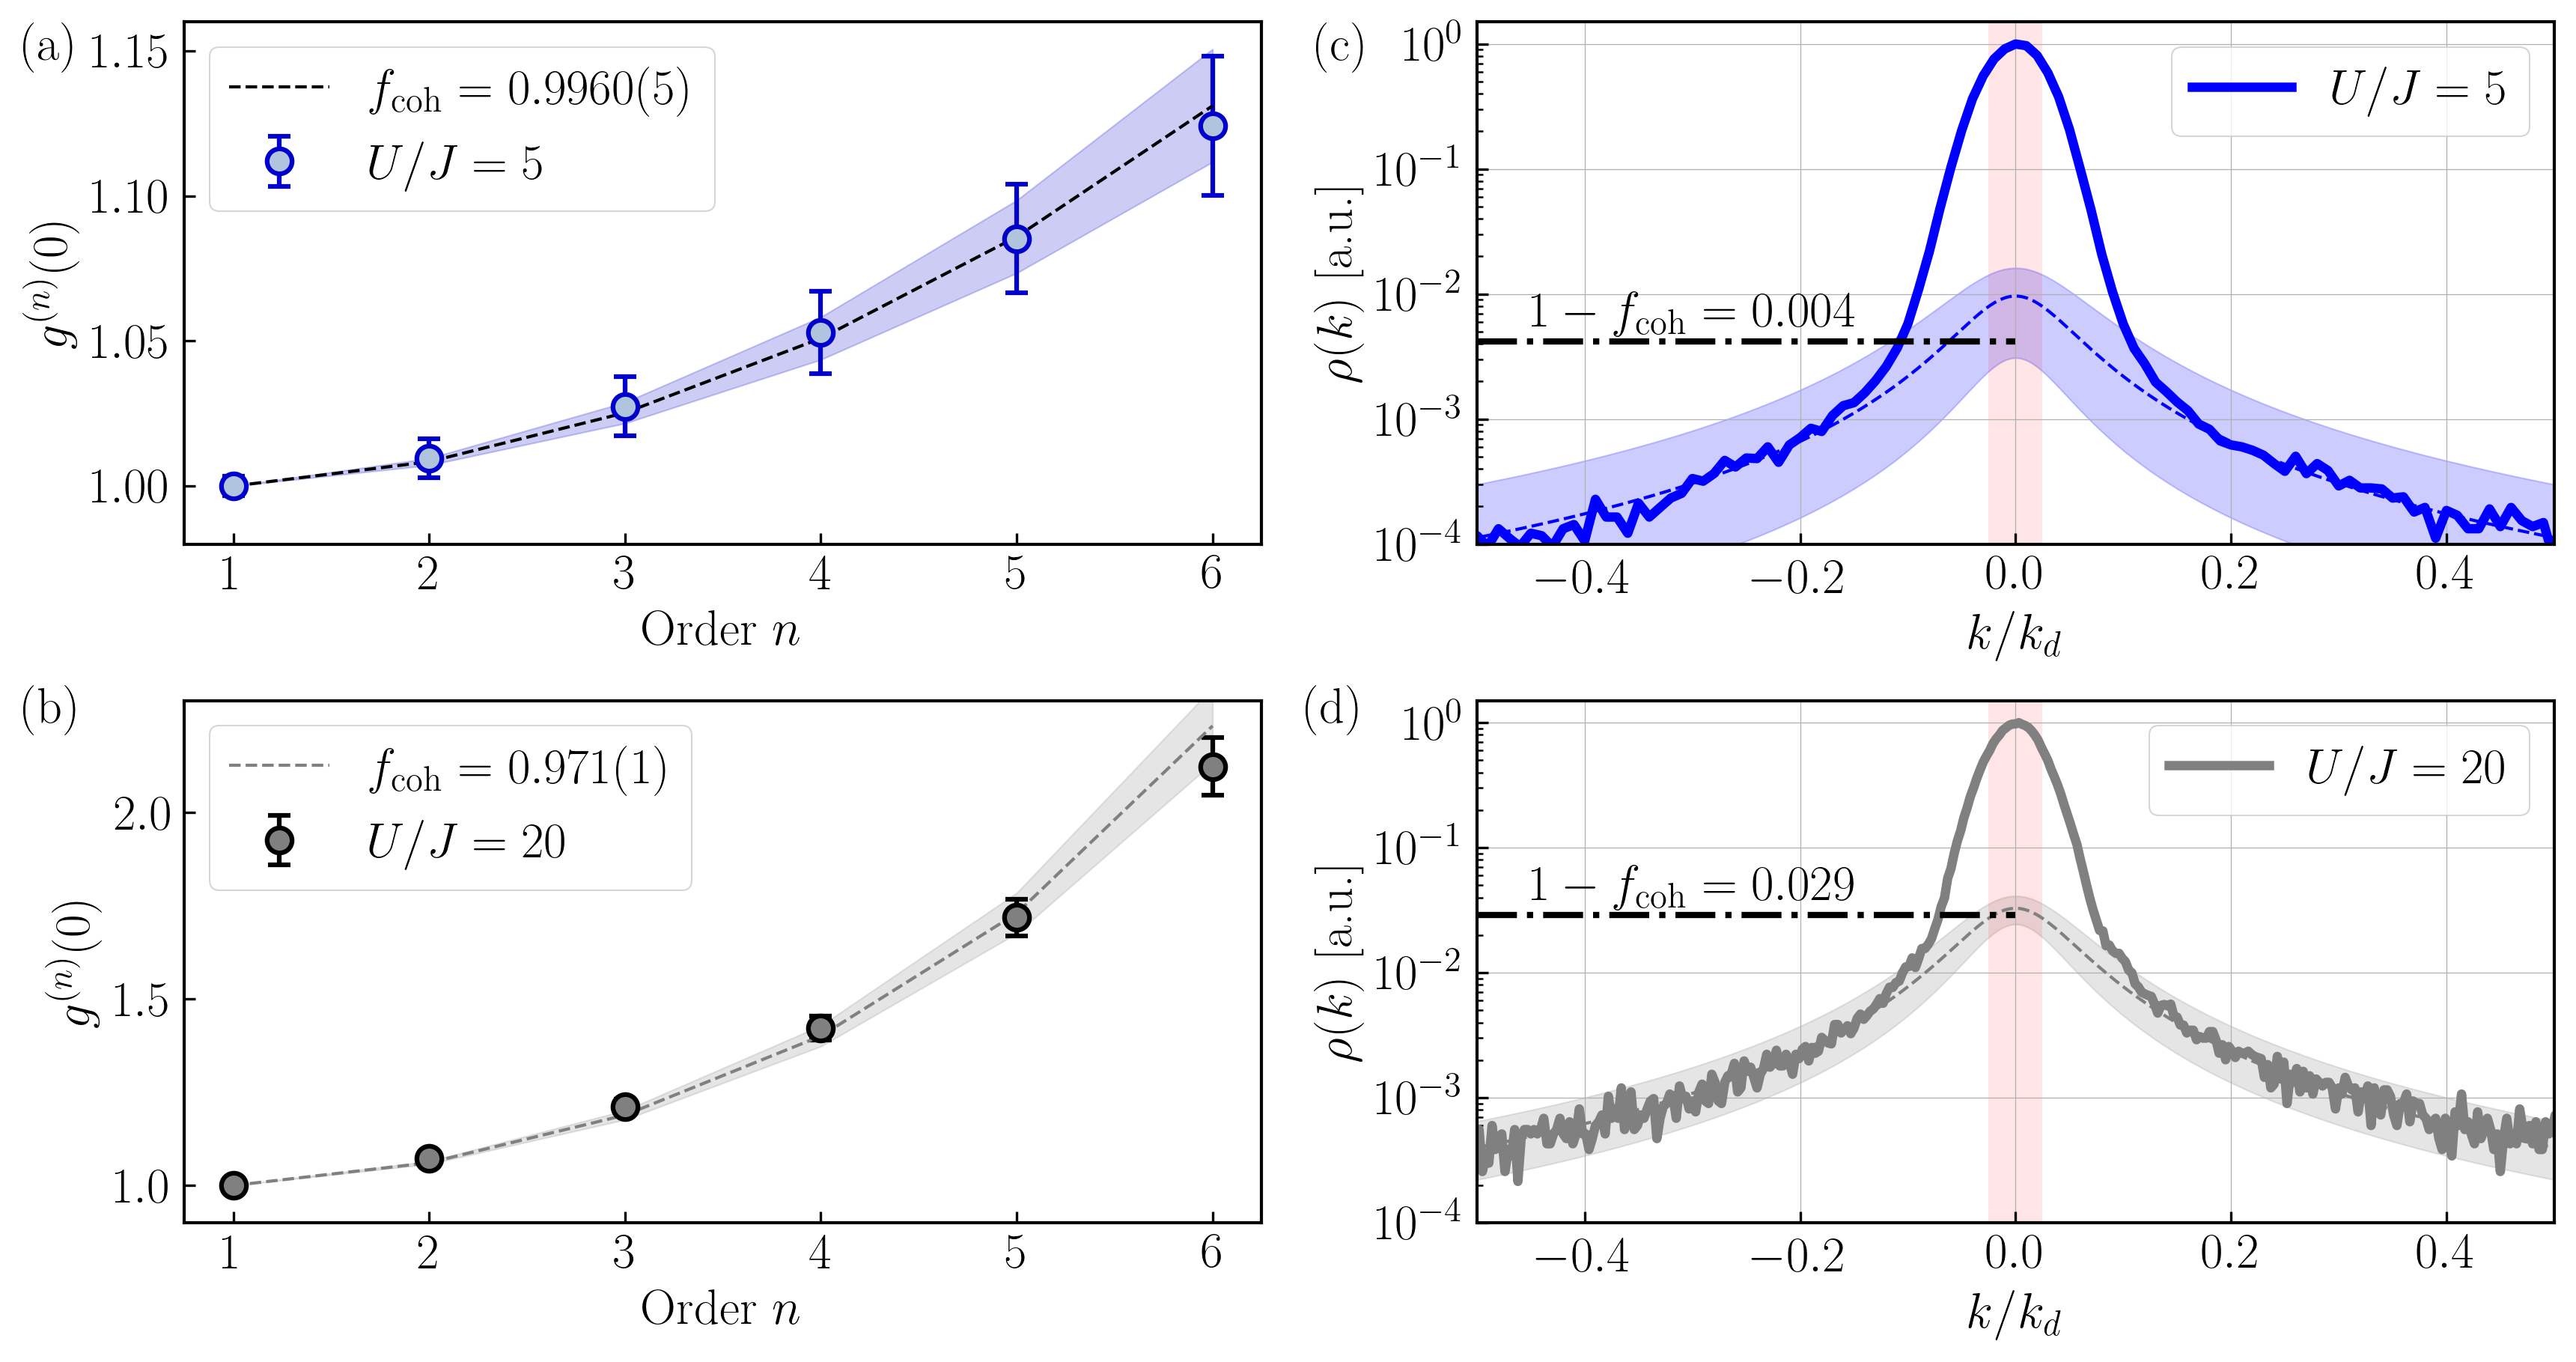

In [34]:

#########################################################  
##############       figure 2       ###################  
######################################################### 

# data u=5
k=[0,.035,.06,.085]
f_coh=[1-.9958, (1-0.993), (1-0.925), (1-0.75)]
err_f_coh=[0.0005, .0005, 0.002 , 0.01]

################## zoonm in density 
fig, ax=plt.subplots(1,2,figsize=[2*fig_width ,1.5*fig_height])

fig.subplots_adjust(hspace=0.3)

xp=np.linspace(-0.5,0.5,100)
sig=.175
amp=0.0042
siglor=0.2
amplor=0.0006*siglor

#### linear
plt.subplot(2,2,1)
plt.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=5$')
plt.plot(xnth,gn5th,'--',color='black',label=r'$f_{\rm coh}=0.9960(5)$')
plt.fill_between(xnth,gn5th1, gn5th2,color='mediumblue',alpha=.2)

#plt.ylim(0.9,1.2)
plt.ylim(0.98,1.16)
#plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'$g^{(n)}(0)$')
plt.legend(loc='upper left')

### semilog
plt.subplot(2,2,2)

#plt.plot(x_UJ20[xmin:xmax],y_UJ20[xmin:xmax],'--',linewidth=2,color='gray',label=r'$U/J=20$',alpha=0.3)

plt.semilogy(x_UJ5,y_UJ5,linewidth=3,color='blue',label=r'$U/J=5$')


xk=np.linspace(-.6,.6,1000)
#plt.plot(xp,np.exp(-xp**2/2/(0.03)**2),'--',color='red',linewidth=2)
plt.plot(xk,lor(xk,fit_res5[0],fit_res5[1],1),'--',color='blue',linewidth=1)

plt.fill_between(xk,lor(xk,fit_res5[0]+err5[0]/1.5,fit_res5[1]+err5[1]/2,1),
                 lor(xk,fit_res5[0]-err5[0]/1.5,fit_res5[1]-err5[1]/4,1), 
                 color='blue',alpha=.2)

plt.axhline(y=amp, xmin=0., xmax=0.5,color='black', linestyle="-.",linewidth=2)
plt.text(-.45, 0.0055, r'$1-f_{\rm coh}=0.004$')

# specify the location of (left,bottom),width,height
rect=patches.Rectangle((-.025,5e-5),0.05,1.5, 
                        fill = True,
                        color = 'red',
                        linewidth = 0,
                      alpha=0.1)
plt.gca().add_patch(rect)



plt.xlim([-.5,.5])
plt.ylim([1e-4,1.5])
#ax4.set_xticks([-0.5,-0.25,0,0.25,0.5])
plt.xlabel(r'$k/k_d$')
plt.ylabel(r'$\rho(k)$ [a.u.]')
plt.grid(lw=0.3)
plt.legend(loc='upper right')

#plt.savefig('DenDepUJ5.pdf', dpi=300,bbox_inches='tight')
#plt.show()

########################

xmin=800
xmax=1200

xp=np.linspace(-0.5,0.5,100)
sig=.12
amp=0.029

#plt.subplots(1,2,figsize=[12,6])

plt.subplot(2,2,3)

plt.fill_between(xnth,gn20th1, gn20th2,color='gray',alpha=.2)

plt.errorbar(xn,gn20,yerr=gn20err,  
            marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=20$')
plt.plot(xnth,gn20th,'--',color='gray',label=r'$f_{\rm coh}=0.971(1)$')

plt.ylim(0.9,2.3)
#plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'$g^{(n)}(0)$')
plt.legend(loc='upper left')

### semilog
plt.subplot(2,2,4)

plt.semilogy(x_UJ20[xmin:xmax],y_UJ20[xmin:xmax],linewidth=3,color='gray',label=r'$U/J=20$')


#plt.plot(xp,amp/4*sig**2/(xp**2+(sig/2)**2),'--',color='red',linewidth=2)
xk=np.linspace(-.6,.6,1000)
#plt.plot(xp,np.exp(-xp**2/2/(0.025)**2),'--',color='red',linewidth=2)
plt.plot(xk,lor(xk,fit_res20[0],fit_res20[1],1),'--',color='gray',linewidth=1)
#plt.plot(xk,lor(xk,fit_res20[0]-err20[0],fit_res20[1]-err20[1],1),'--',color='gray',linewidth=1)
plt.fill_between(xk,lor(xk,fit_res20[0]+err20[0],fit_res20[1]+err20[1],1),
                 lor(xk,fit_res20[0]-err20[0],fit_res20[1]-err20[1],1), 
                 color='gray',alpha=.2)

plt.axhline(y=amp, xmin=0., xmax=0.5,color='black', linestyle="-.",linewidth=2)
plt.text(-.45, 0.038, r'$1-f_{\rm coh}=0.029$')


# specify the location of (left,bottom),width,height
rect=patches.Rectangle((-.025,5e-5),0.05,1.5, 
                        fill = True,
                        color = 'red',
                        linewidth = 0,
                      alpha=0.1)
plt.gca().add_patch(rect)


plt.legend()
#plt.plot(xp,amplor/(xp**2+siglor**2))
plt.xlim([-0.5,.5])
plt.ylim([1e-4,1.5])

plt.grid(True,lw=0.3)
plt.xlabel(r'$k/k_d$')
plt.ylabel(r'$\rho(k)$ [a.u.]')
plt.grid(lw=0.3)
plt.legend(loc='upper right')

plt.text(-1.85,2e5,'(a)')
plt.text(-1.85,1,'(b)')
plt.text(-.65,2e5,'(c)')
plt.text(-.66,1,'(d)')

plt.savefig('fig3.pdf', dpi=300,bbox_inches='tight')
plt.show()

/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/358028763.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/358028763.py:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


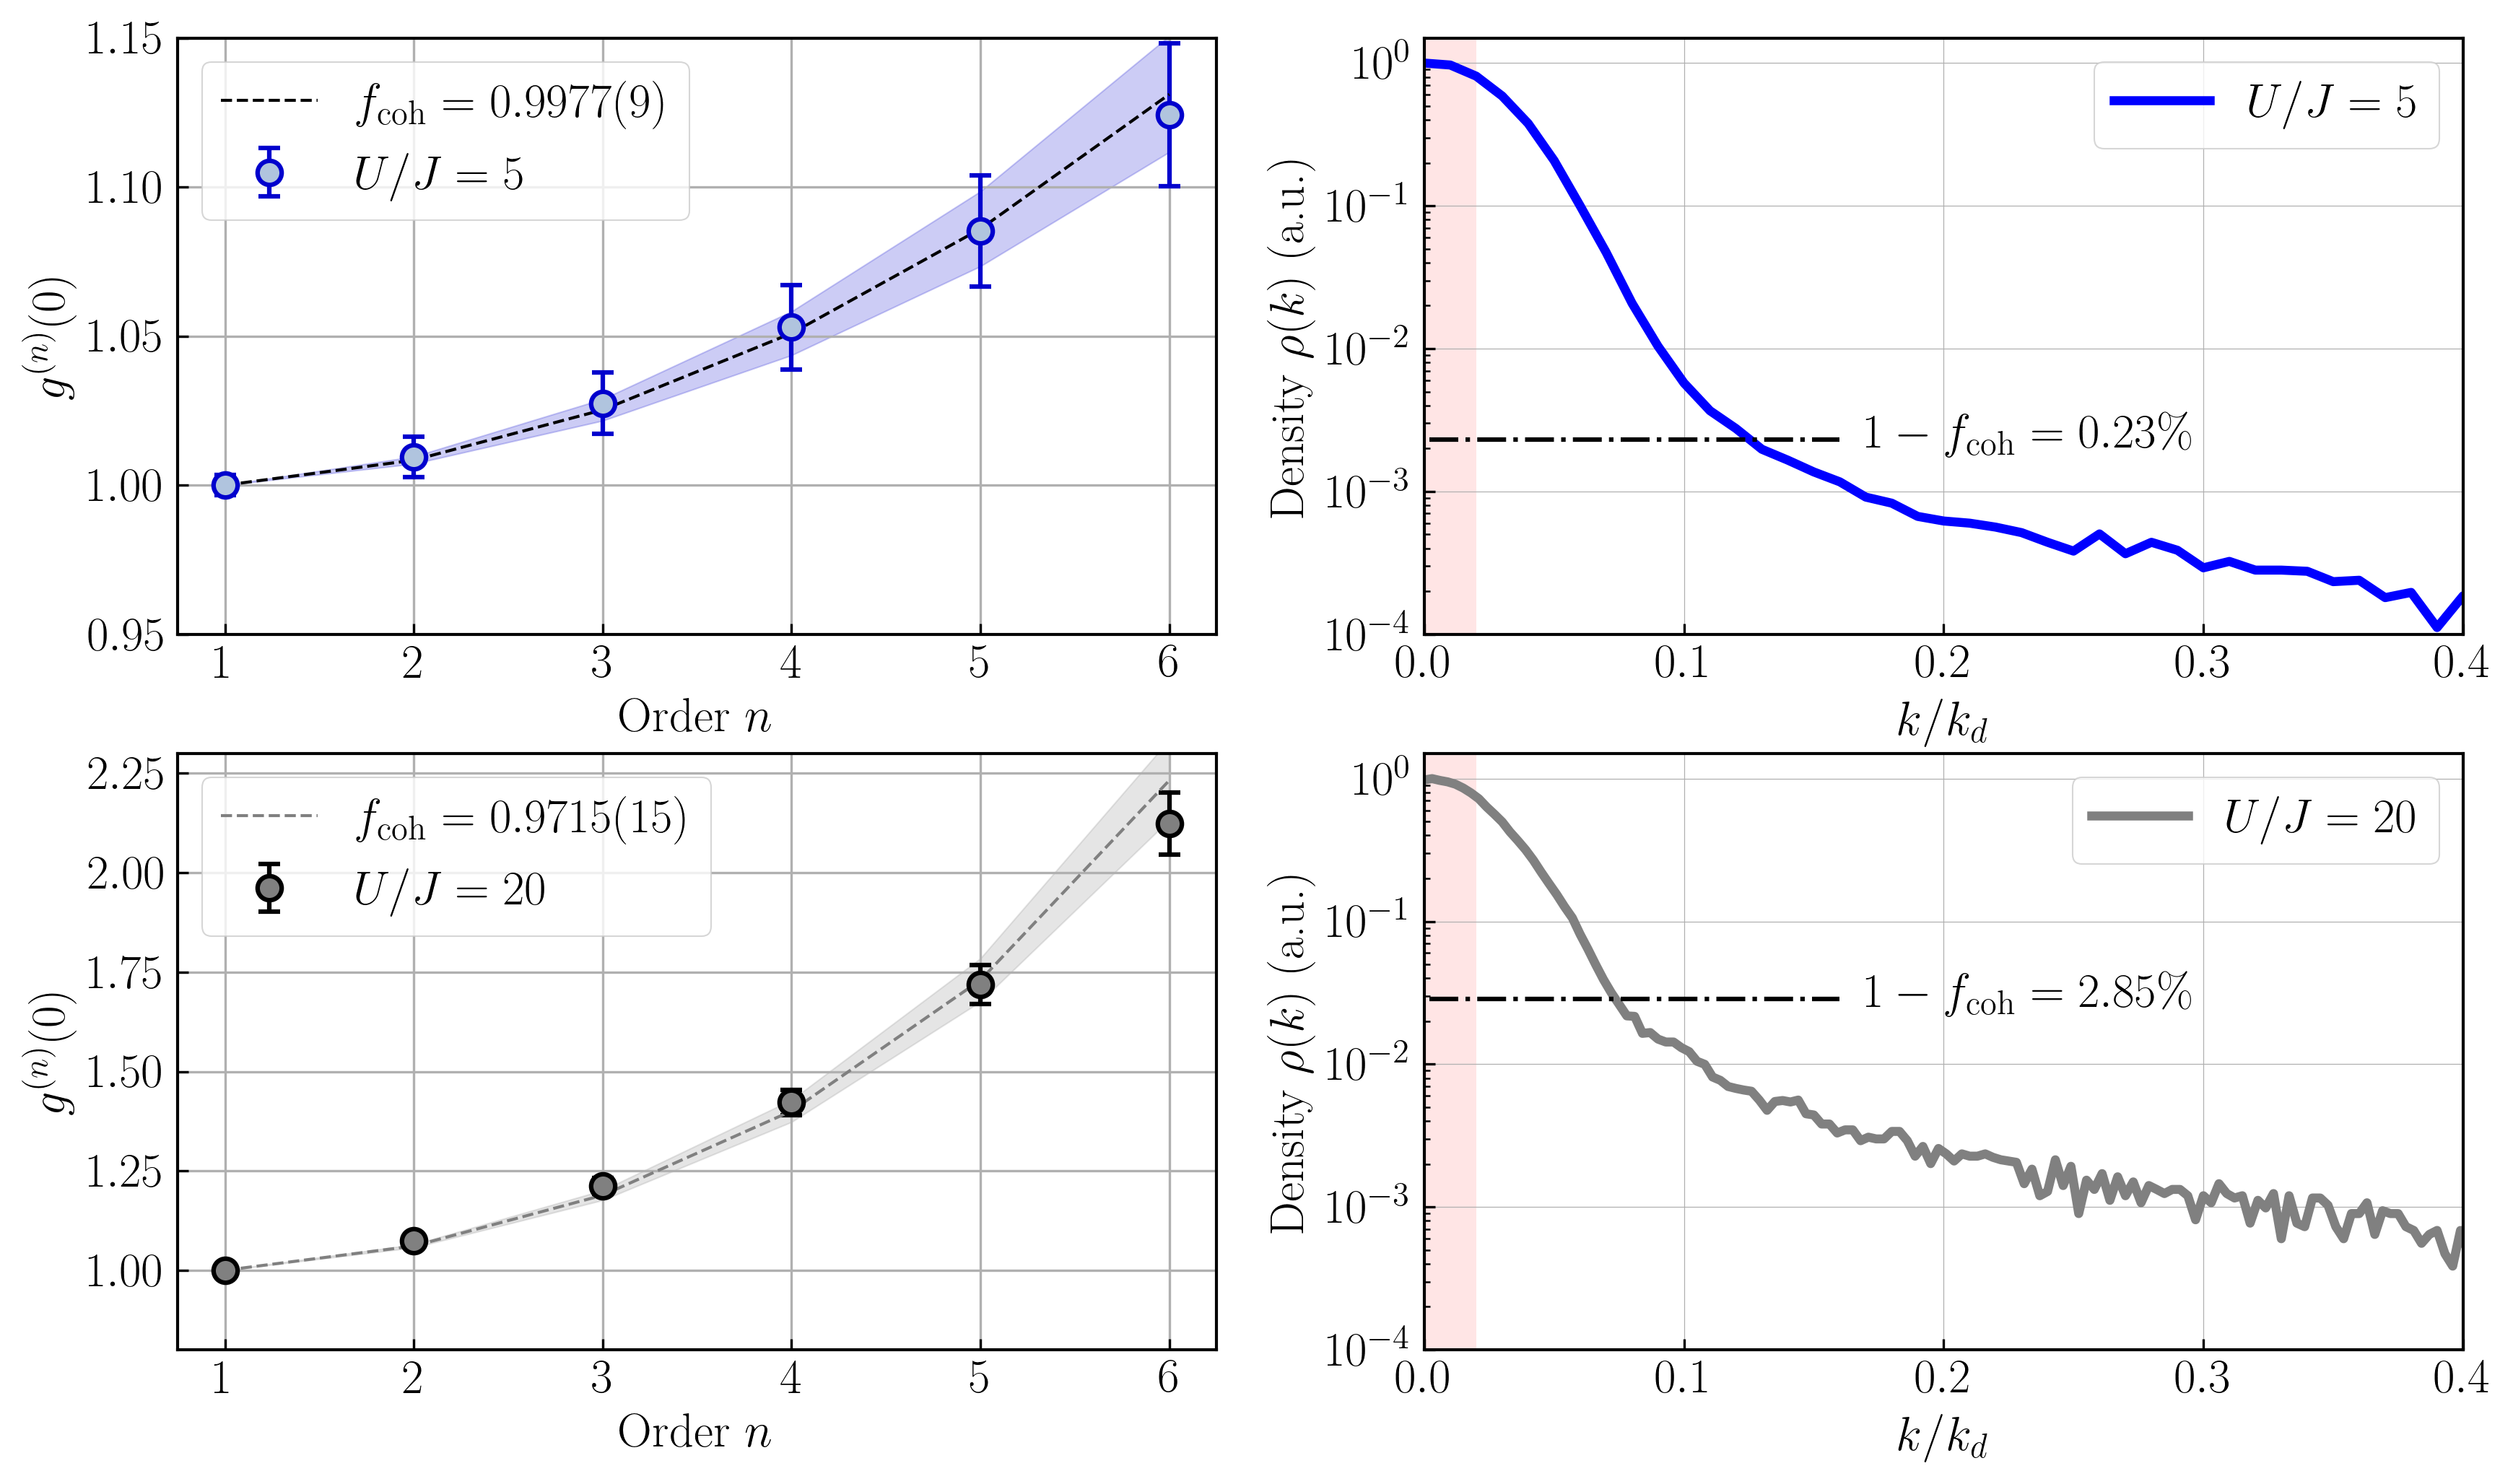

In [35]:
#########################################################  
##############       figure 2       ###################  
######################################################### 

data_5ms=np.loadtxt("density_5k_5ms_v14_cut_width_0p03_range_1p2_high_flux.txt")

x=data_5ms[:,0]
y=data_5ms[:,1]

y=[x/max(y) for x in y]

# data u=5
k=[0,.035,.06,.085]
f_coh=[1-.9958, (1-0.993), (1-0.925), (1-0.75)]
err_f_coh=[0.0005, .0005, 0.002 , 0.01]

################## zoonm in density 
fig, ax=plt.subplots(1,2,figsize=[2*fig_width ,1.7*fig_height])

xp=np.linspace(-0.2,0.2,100)
sig=.115
amp=0.0023
siglor=0.05
amplor=0.0006*siglor

#### linear
plt.subplot(2,2,1)
plt.errorbar(xn,gn5,yerr=gn5err, marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none',         color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=5$')
plt.plot(xnth,gn5th,'--',color='black',label=r'$f_{\rm coh}=0.9977(9)$')
plt.fill_between(xnth,gn5th1, gn5th2,color='mediumblue',alpha=.2)

#plt.ylim(0.9,1.2)
plt.ylim(0.95,1.15)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'$g^{(n)}(0)$')
plt.legend(loc='upper left')

### semilog
plt.subplot(2,2,2)

#plt.plot(x_UJ20[xmin:xmax],y_UJ20[xmin:xmax],'--',linewidth=2,color='gray',label=r'$U/J=20$',alpha=0.3)

plt.semilogy(x,y,linewidth=3,color='blue',label=r'$U/J=5$')

#plt.semilogy(xp,amp*np.exp(-xp**2/2/sig**2)+1e-4,'--',linewidth=2,color='blue',alpha=0.8)

plt.axhline(y=amp, xmin=.5e-2, xmax=0.4,color='black', linestyle="-.",linewidth=1.5)
#plt.text(.52e-2, 0.0033, r'$1-f_{\rm coh}=0.23\%$')
#plt.arrow(0.11, 0.003, -0.1, 0.0, head_width=0.0005, head_length=0.0005, fc='k', ec='k')
plt.text(.17, 0.002, r'$1-f_{\rm coh}=0.23\%$')

# specify the location of (left,bottom),width,height
rect=patches.Rectangle((.1e-3,5e-5),0.02,1.5, 
                        fill = True,
                        color = 'red',
                        linewidth = 0,
                      alpha=0.1)
plt.gca().add_patch(rect)


#plt.errorbar(k,f_coh,yerr=err_f_coh,  
#            marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
#             linestyle='none', color='black',
#        markeredgecolor='black',
#        markerfacecolor='gray',
#             markeredgewidth=1.5,lw=1.5,label=r'test')

plt.xlim([0,.4])
plt.ylim([1e-4,1.5])
#ax4.set_xticks([-0.5,-0.25,0,0.25,0.5])
plt.grid(True,lw=0.3)
plt.xlabel(r'$k/k_d$')
plt.ylabel(r'Density $\rho(k)$ (a.u.)')
plt.grid(lw=0.3)
plt.legend(loc='upper right')

#plt.savefig('DenDepUJ5.pdf', dpi=300,bbox_inches='tight')
#plt.show()

########################

data=np.loadtxt("dataUJ20.txt")

y_UJ20=data[0,:]
y_UJ20=y_UJ20/max(y_UJ20)
x_UJ20=data[1,:]

xmin=800
xmax=1200

xp=np.linspace(-0.12,0.12,100)
sig=.05
amp=0.0285

#plt.subplots(1,2,figsize=[12,6])

plt.subplot(2,2,3)

plt.fill_between(xnth,gn20th1, gn20th2,color='gray',alpha=.2)

plt.errorbar(xn,gn20,yerr=gn20err,  
            marker='o',markersize=8,capsize=3.5,elinewidth=1.5,capthick=1.5, 
             linestyle='none', color='black',
        markeredgecolor='black',
        markerfacecolor='gray',
             markeredgewidth=1.5,lw=1.5,label=r'$U/J=20$')
plt.plot(xnth,gn20th,'--',color='gray',label=r'$f_{\rm coh}=0.9715(15)$')

plt.ylim(0.8,2.3)
plt.grid(True)
plt.xlabel('Order $n$')
plt.ylabel(r'$g^{(n)}(0)$')
plt.legend(loc='upper left')

### semilog
plt.subplot(2,2,4)
#.semilogy(x,y,'--',linewidth=2,color='blue',label=r'$U/J=5$',alpha=0.3)

plt.semilogy(x_UJ20[xmin:xmax],y_UJ20[xmin:xmax],linewidth=3,color='gray',label=r'$U/J=20$')
#plt.loglog(x_UJ20[xmin:xmax],y_UJ20[xmin:xmax],linewidth=3,color='gray',label=r'$U/J=20$')


#plt.plot(xp,amp*np.exp(-xp**2/2/sig**2)+1e-3,'--',color='gray',linewidth=2)
#plt.semilogy()
#
plt.axhline(y=amp, xmin=.5e-2, xmax=0.4,color='black', linestyle="-.",linewidth=1.5)
#plt.arrow(0.11, 0.03, -0.1, 0.0, head_width=0.01, head_length=0.01, fc='k', ec='k')
plt.text(.17, 0.025, r'$1-f_{\rm coh}=2.85\%$')


# specify the location of (left,bottom),width,height
rect=patches.Rectangle((.1e-3,5e-5),0.02,1.5, 
                        fill = True,
                        color = 'red',
                        linewidth = 0,
                      alpha=0.1)
plt.gca().add_patch(rect)

plt.legend()
#plt.plot(xp,amplor/(xp**2+siglor**2))
#plt.xlim([-.5,.5])
plt.xlim([0,.4])
plt.ylim([1e-4,1.5])
#ax4.set_xticks([-0.5,-0.25,0,0.25,0.5])
plt.grid(True,lw=0.3)
plt.xlabel(r'$k/k_d$')
plt.ylabel(r'Density $\rho(k)$ (a.u.)')
plt.grid(lw=0.3)
plt.legend(loc='upper right')

#plt.text(-1.85,1e5,'(a)')
#plt.text(-1.85,1,'(b)')
#plt.text(-.65,1e5,'(c)')
#plt.text(-.66,1,'(d)')

plt.savefig('fig2.pdf', dpi=300,bbox_inches='tight')
plt.show()


## Coherent and condensed fractions

/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/1309148195.py:19: RuntimeWarning: invalid value encountered in power
  muscale=wscale*(fc0*(1-u/uc)**beta)**(2/5)
/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/1309148195.py:20: RuntimeWarning: invalid value encountered in power
  Rscale=(fc0*(1-u/uc)**beta)**(1/5)
/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/1309148195.py:25: RuntimeWarning: invalid value encountered in power
  fcoh_rsize=factor*fc0*(1-u/uc)**beta/(fc0*(1-u/uc)**beta+(1-fc0*(1-u/uc)**beta)*ratiosize**3)
/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/1309148195.py:26: RuntimeWarning: invalid value encountered in power
  fcoh_rsizep=factor*fc0*(1-u/uc1)**beta/(fc0*(1-u/uc1)**beta+(1-fc0*(1-u/uc1)**beta)*ratiosize**3)
/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/1309148195.py:27: RuntimeWarning: invalid value encountered in power
  fcoh_rsizem=factor*fc0*(1-u/uc2)**beta/(fc0*(1-u/u

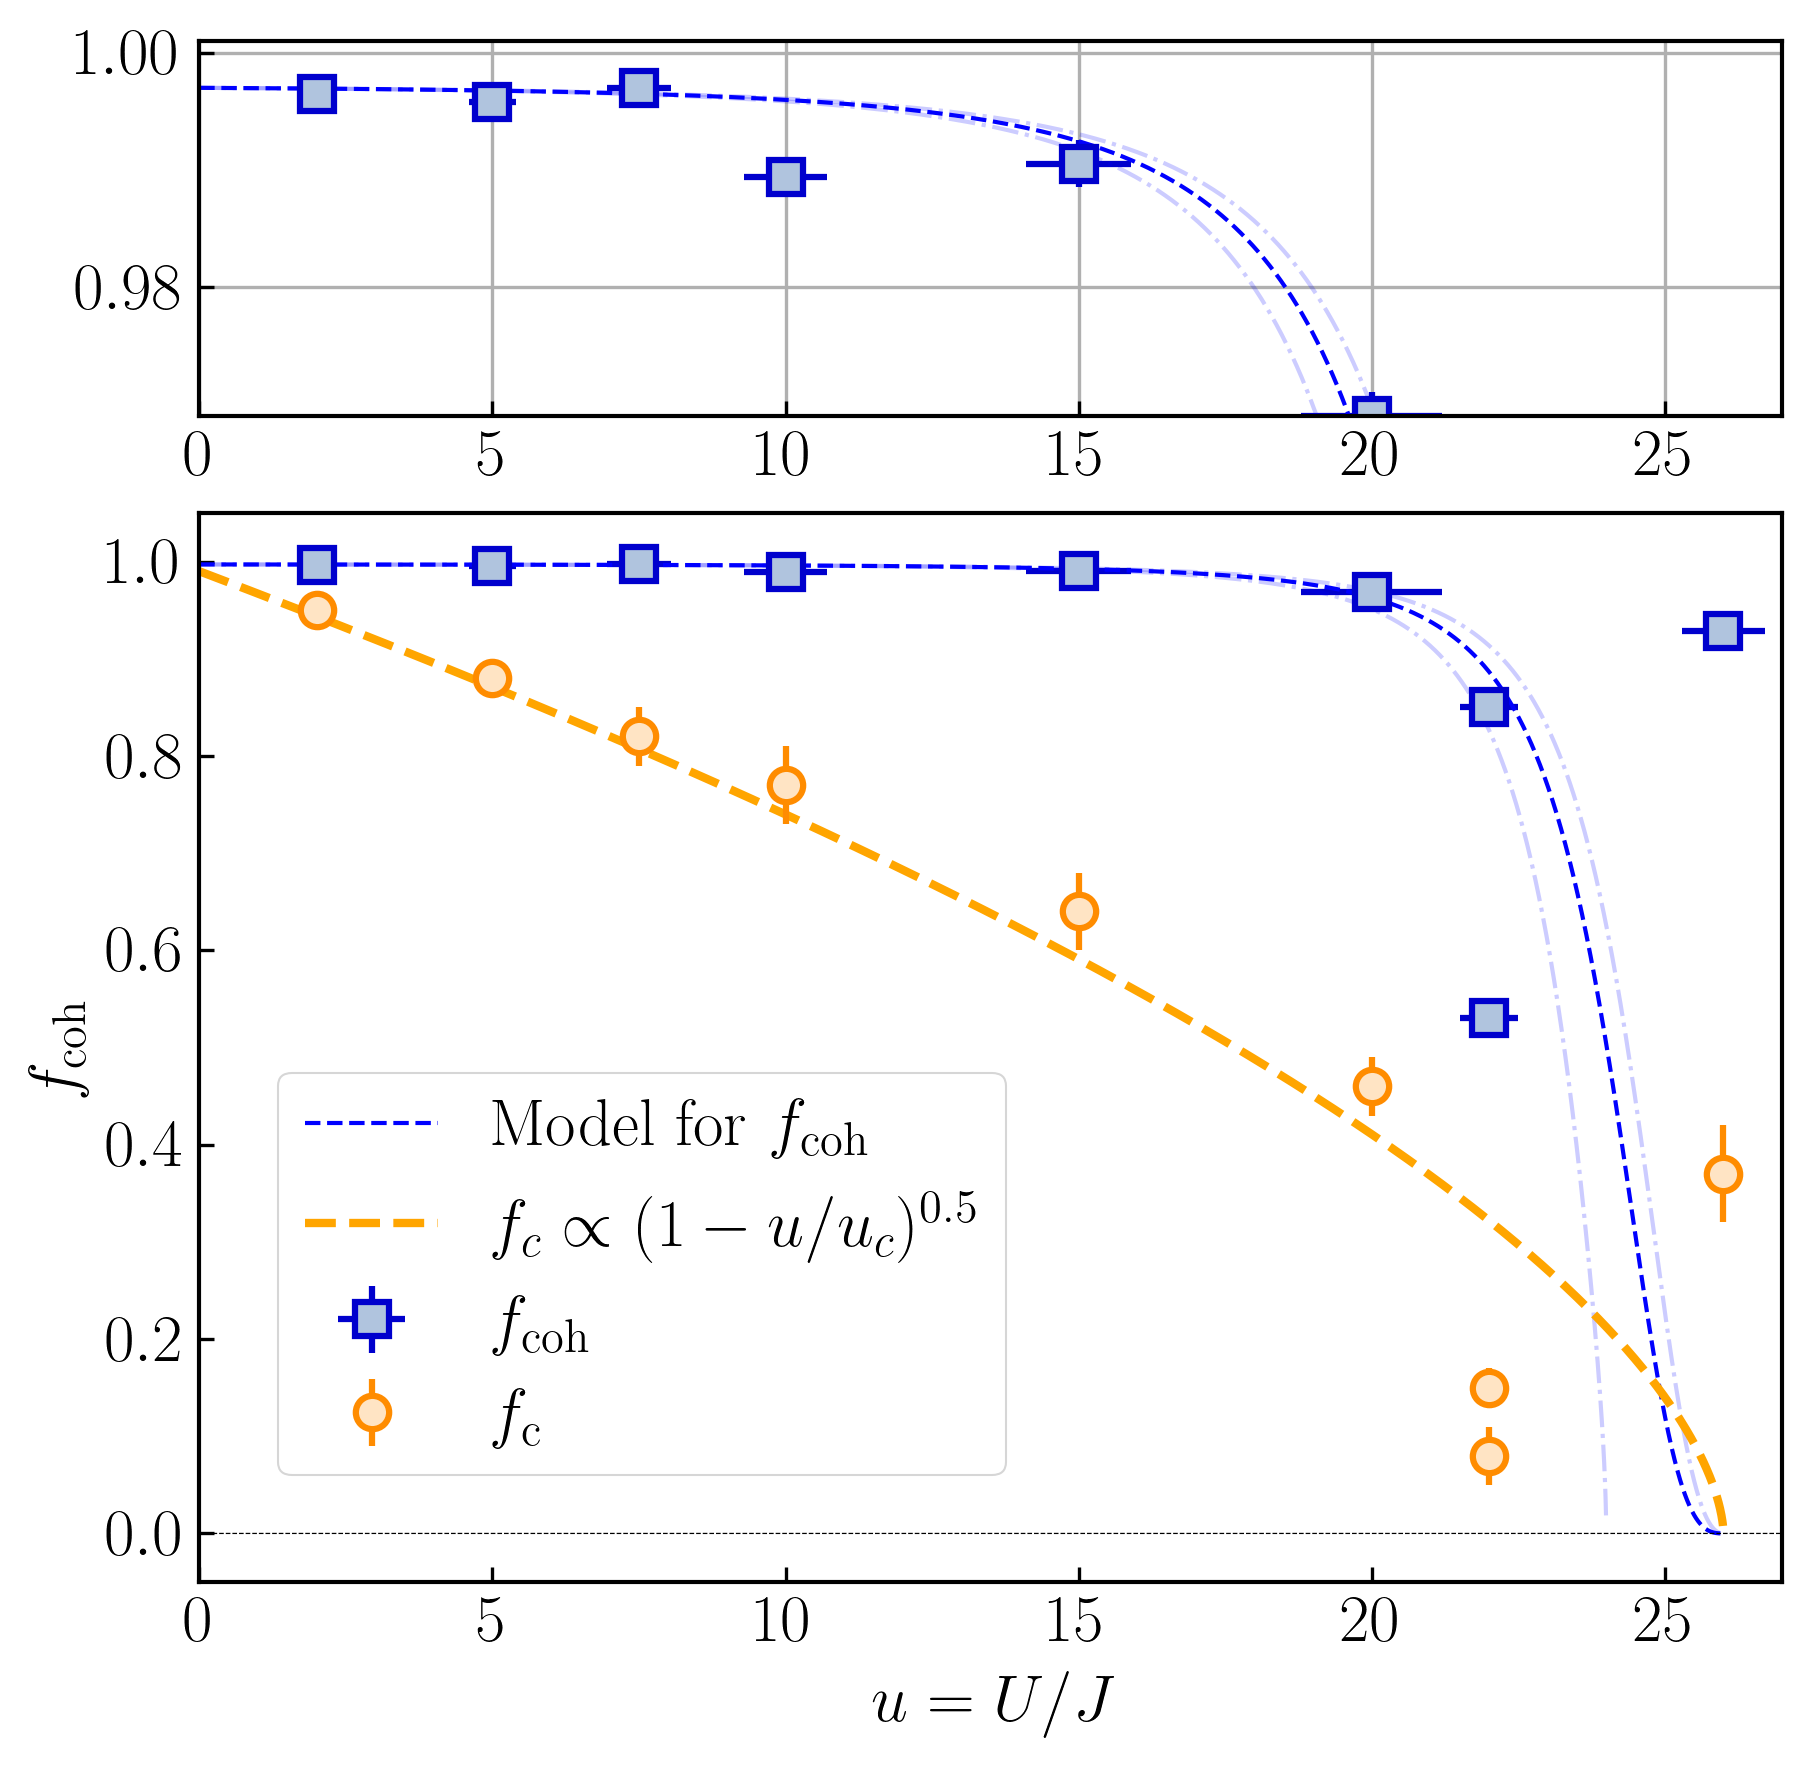

In [36]:

UsuJ=[2, 5,7.5,10,15,20,22,22,26]
errUsuJ=[.2,.4,.55,.7,.9,1.2,.5,.5,0.7]
fcoh=[0.9965,0.9958,0.997, 0.9894,0.9905,0.969,0.53,0.85,0.928]
err_fcoh=[0.001,0.001,0.001, 0.0015, 0.002, 0.002,0.02,.01,.01]

UsuJfc=[2, 5, 7.5, 10, 15, 20, 22,22,26]
fc=[.95, .88, .82, .77, .64, .46, 0.08,.15,0.37]
err_fc=[.02, .02, .03, 0.04, .04, 0.03, 0.03, .02,0.05]

u=np.linspace(0,40,5000)

fc0=0.99
beta=0.6

factor=0.997
uc=26
ratiosize0=0.1
wscale=1
muscale=wscale*(fc0*(1-u/uc)**beta)**(2/5)
Rscale=(fc0*(1-u/uc)**beta)**(1/5)
ratiosize=ratiosize0/Rscale**6

uc1=uc-2
uc2=uc+2
fcoh_rsize=factor*fc0*(1-u/uc)**beta/(fc0*(1-u/uc)**beta+(1-fc0*(1-u/uc)**beta)*ratiosize**3)
fcoh_rsizep=factor*fc0*(1-u/uc1)**beta/(fc0*(1-u/uc1)**beta+(1-fc0*(1-u/uc1)**beta)*ratiosize**3)
fcoh_rsizem=factor*fc0*(1-u/uc2)**beta/(fc0*(1-u/uc2)**beta+(1-fc0*(1-u/uc2)**beta)*ratiosize**3)

plt.figure(figsize=[fig_width ,fig_height])
plt.errorbar(UsuJ, fcoh, xerr=errUsuJ, yerr=err_fcoh,
                    marker='s',markersize=8,
        linestyle='none', color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
        markeredgewidth=1.5,lw=1.5,
            label=r'$f_{\rm coh}$')


plt.plot(u,fcoh_rsize,'--',color='blue',label=r'Model for $f_{\rm coh}$')
plt.plot(u,fcoh_rsizep,'-.',color='blue',alpha=.2)
plt.plot(u,fcoh_rsizem,'-.',color='blue',alpha=.2)
#plt.fill_between(u,fcoh_rsizep, fcoh_rsizem,color='gray',alpha=.2)

plt.plot(u,fc0*(1-u/uc)**beta,'--',linewidth=2,color='orange',label=r'$f_c\propto(1-u/u_c)^{0.5}$')

plt.errorbar(UsuJfc, fc, yerr=err_fc,
                    marker='o',markersize=8,
        linestyle='none', color='darkorange',
        markeredgecolor='darkorange',
        markerfacecolor='bisque',
        markeredgewidth=1.5,lw=1.5,
            label=r'$f_{\rm c}$')

plt.plot(u,0*u,'--',linewidth=0.3,color='black')
plt.xlabel(r'$u=U/J$')
plt.ylabel(r'$f_{\rm coh}$')
plt.ylim(-0.05,1.05)
plt.xlim(0,27)
plt.legend(loc=(.05,.1))


# this is an inset axes over the main axes
inset = plt.axes([.125, .95, .775, .27])
plt.grid(True)
inset.set_ylim(0.969,1.001)
inset.set_xlim(0.,27)

inset.errorbar(UsuJ, fcoh, xerr=errUsuJ, yerr=err_fcoh, 
                    marker='s',markersize=8,
        linestyle='none', color='mediumblue',
        markeredgecolor='mediumblue',
        markerfacecolor='lightsteelblue',
        markeredgewidth=1.5,lw=1.5,
            label=r'$f_{\rm coh}$')
inset.plot(u,fcoh_rsize,'--',color='blue',label=r'Model for $f_{\rm coh}$')
plt.plot(u,fcoh_rsizep,'-.',color='blue',alpha=.2)
plt.plot(u,fcoh_rsizem,'-.',color='blue',alpha=.2)
#plt.fill_between(u,fcoh_rsizep, fcoh_rsizem,color='gray',alpha=.2)
inset.plot(u,0.9*(1-u/uc)**0.68,'--',linewidth=2,color='orange',label=r'$f_c\propto(1-u/u_c)^{ 0.6 }$')
inset.plot(u,0*u,'--',linewidth=0.3,color='black')

#plt.savefig('fig3.pdf', dpi=300,bbox_inches='tight')
plt.show()

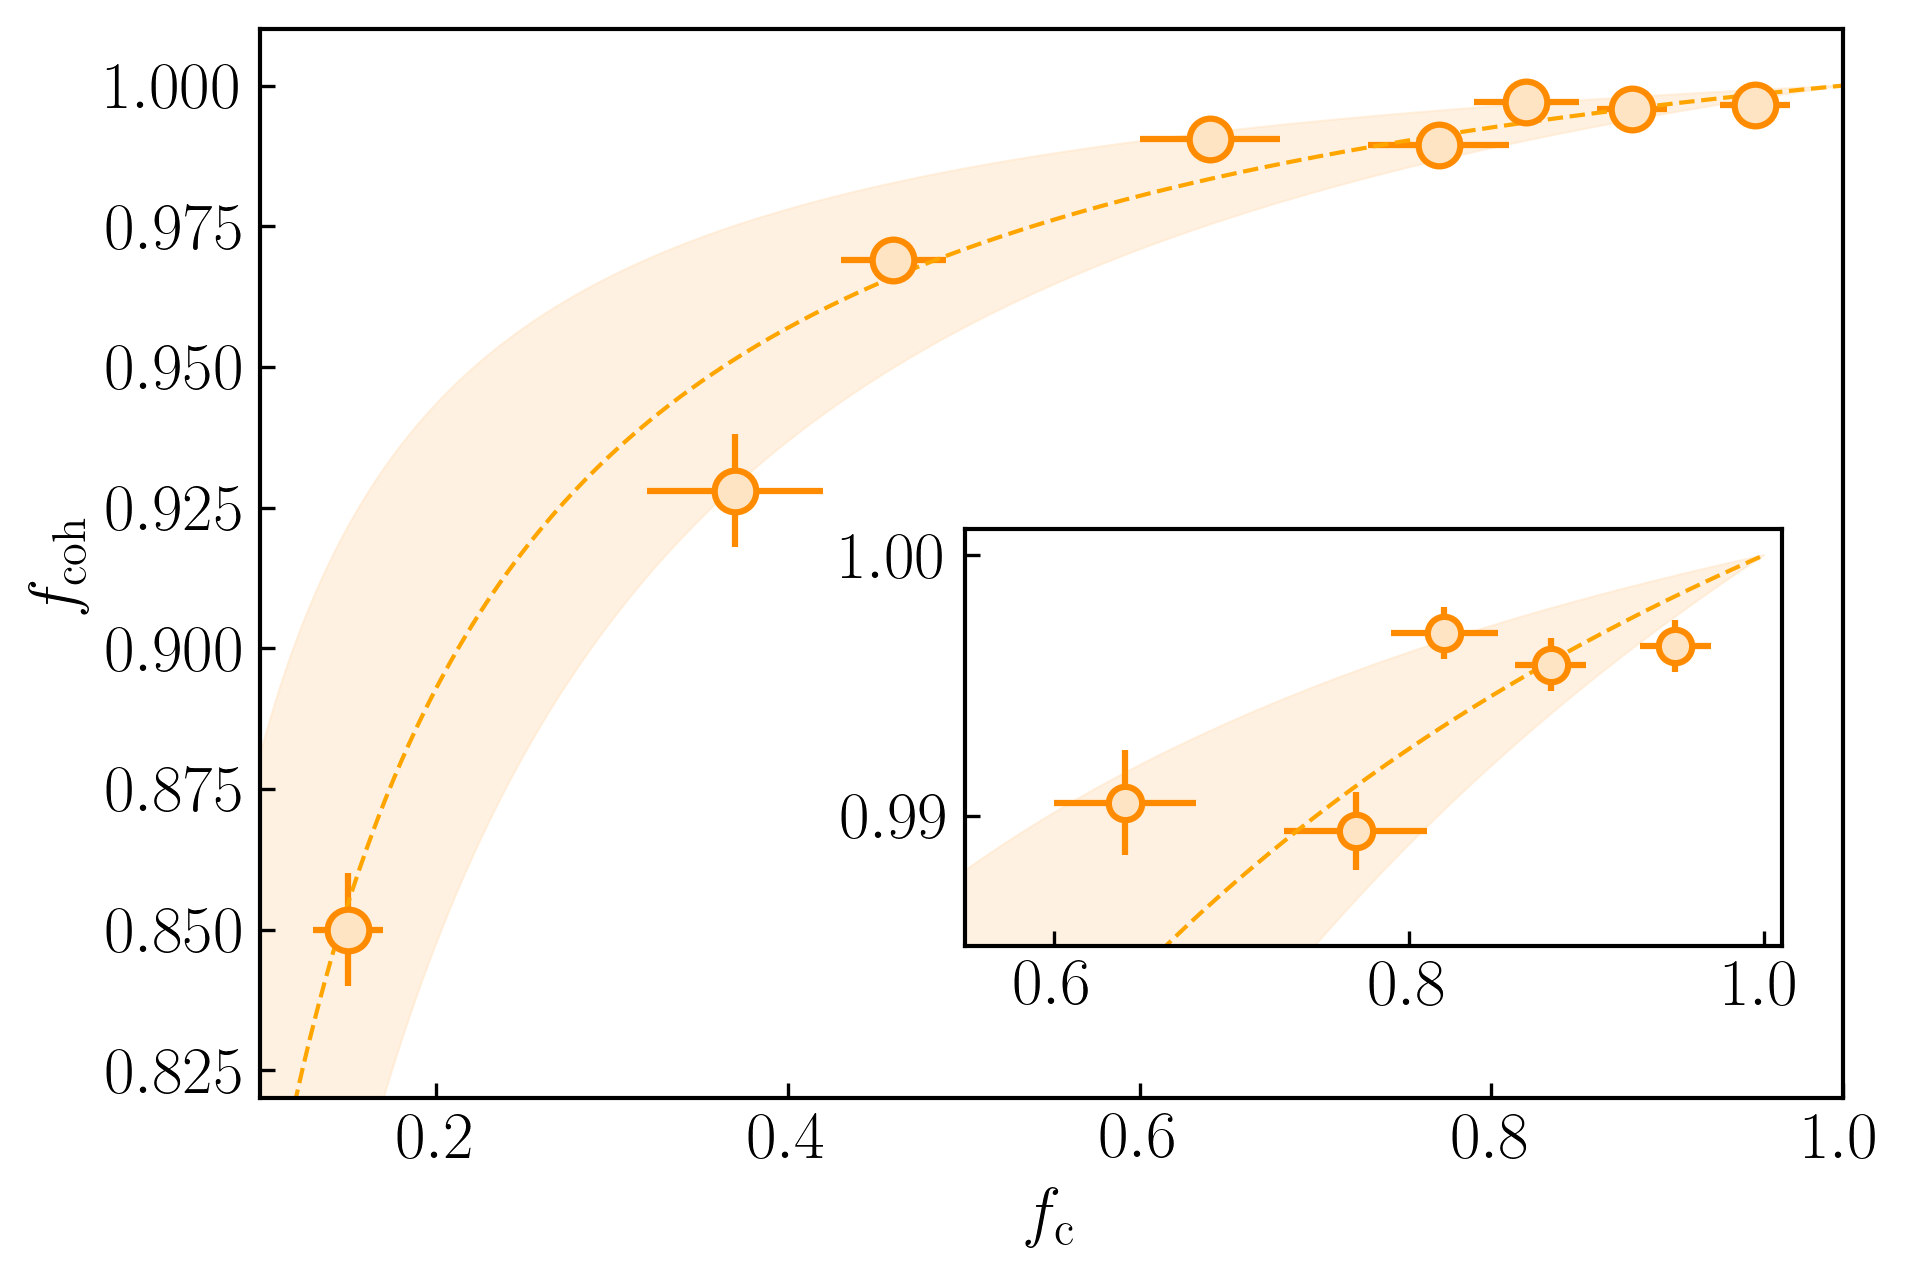

In [37]:
#########################################################  
##############       figure 3       ###################  
######################################################### 


fc_test=np.linspace(0,1,500)
alpha=0.03
alpha1=0.015
alpha2=0.045

fcoh_th=fc_test/(fc_test+(1-fc_test)*alpha)
fcoh_th1=fc_test/(fc_test+(1-fc_test)*alpha1)
fcoh_th2=fc_test/(fc_test+(1-fc_test)*alpha2)

plt.figure(figsize=[fig_width ,fig_height])
plt.errorbar(fc, fcoh, xerr=err_fc, yerr=err_fcoh,
                    marker='o',markersize=10,
        linestyle='none', color='darkorange',
        markeredgecolor='darkorange',
        markerfacecolor='bisque',
        markeredgewidth=1.5,lw=1.5,
            label=r'$f_{\rm coh}$')
plt.xlim([0.1,1])
plt.ylim([0.82,1.01])
plt.ylabel(r'$f_{\rm coh}$')
plt.xlabel(r'$f_{\rm c}$')


plt.plot(fc_test,fcoh_th,'--',color='orange')
plt.fill_between(fc_test,fcoh_th1, fcoh_th2,color='bisque',alpha=.5)
#plt.semilogy()
#plt.grid()

# this is an inset axes over the main axes
ax2 = plt.axes([.47, .22, .4, .3])

ax2.errorbar(fc, fcoh, xerr=err_fc, yerr=err_fcoh,
                    marker='o',markersize=8,
        linestyle='none', color='darkorange',
        markeredgecolor='darkorange',
        markerfacecolor='bisque',
        markeredgewidth=1.5,lw=1.5)
ax2.plot(fc_test,fcoh_th,'--',color='orange')
ax2.fill_between(fc_test,fcoh_th1, fcoh_th2,color='bisque',alpha=.5)
#ax2.grid(True)
ax2.set_ylim([0.985,1.001])
ax2.set_xlim([0.55,1.01])

plt.savefig('fig4.pdf', dpi=300,bbox_inches='tight')
plt.show()

/var/folders/33/dnxtnbgs4x9bd02xgsmd58v80000gp/T/ipykernel_22069/3043466026.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,1/no810**2*x/x)


0.5044001538263613

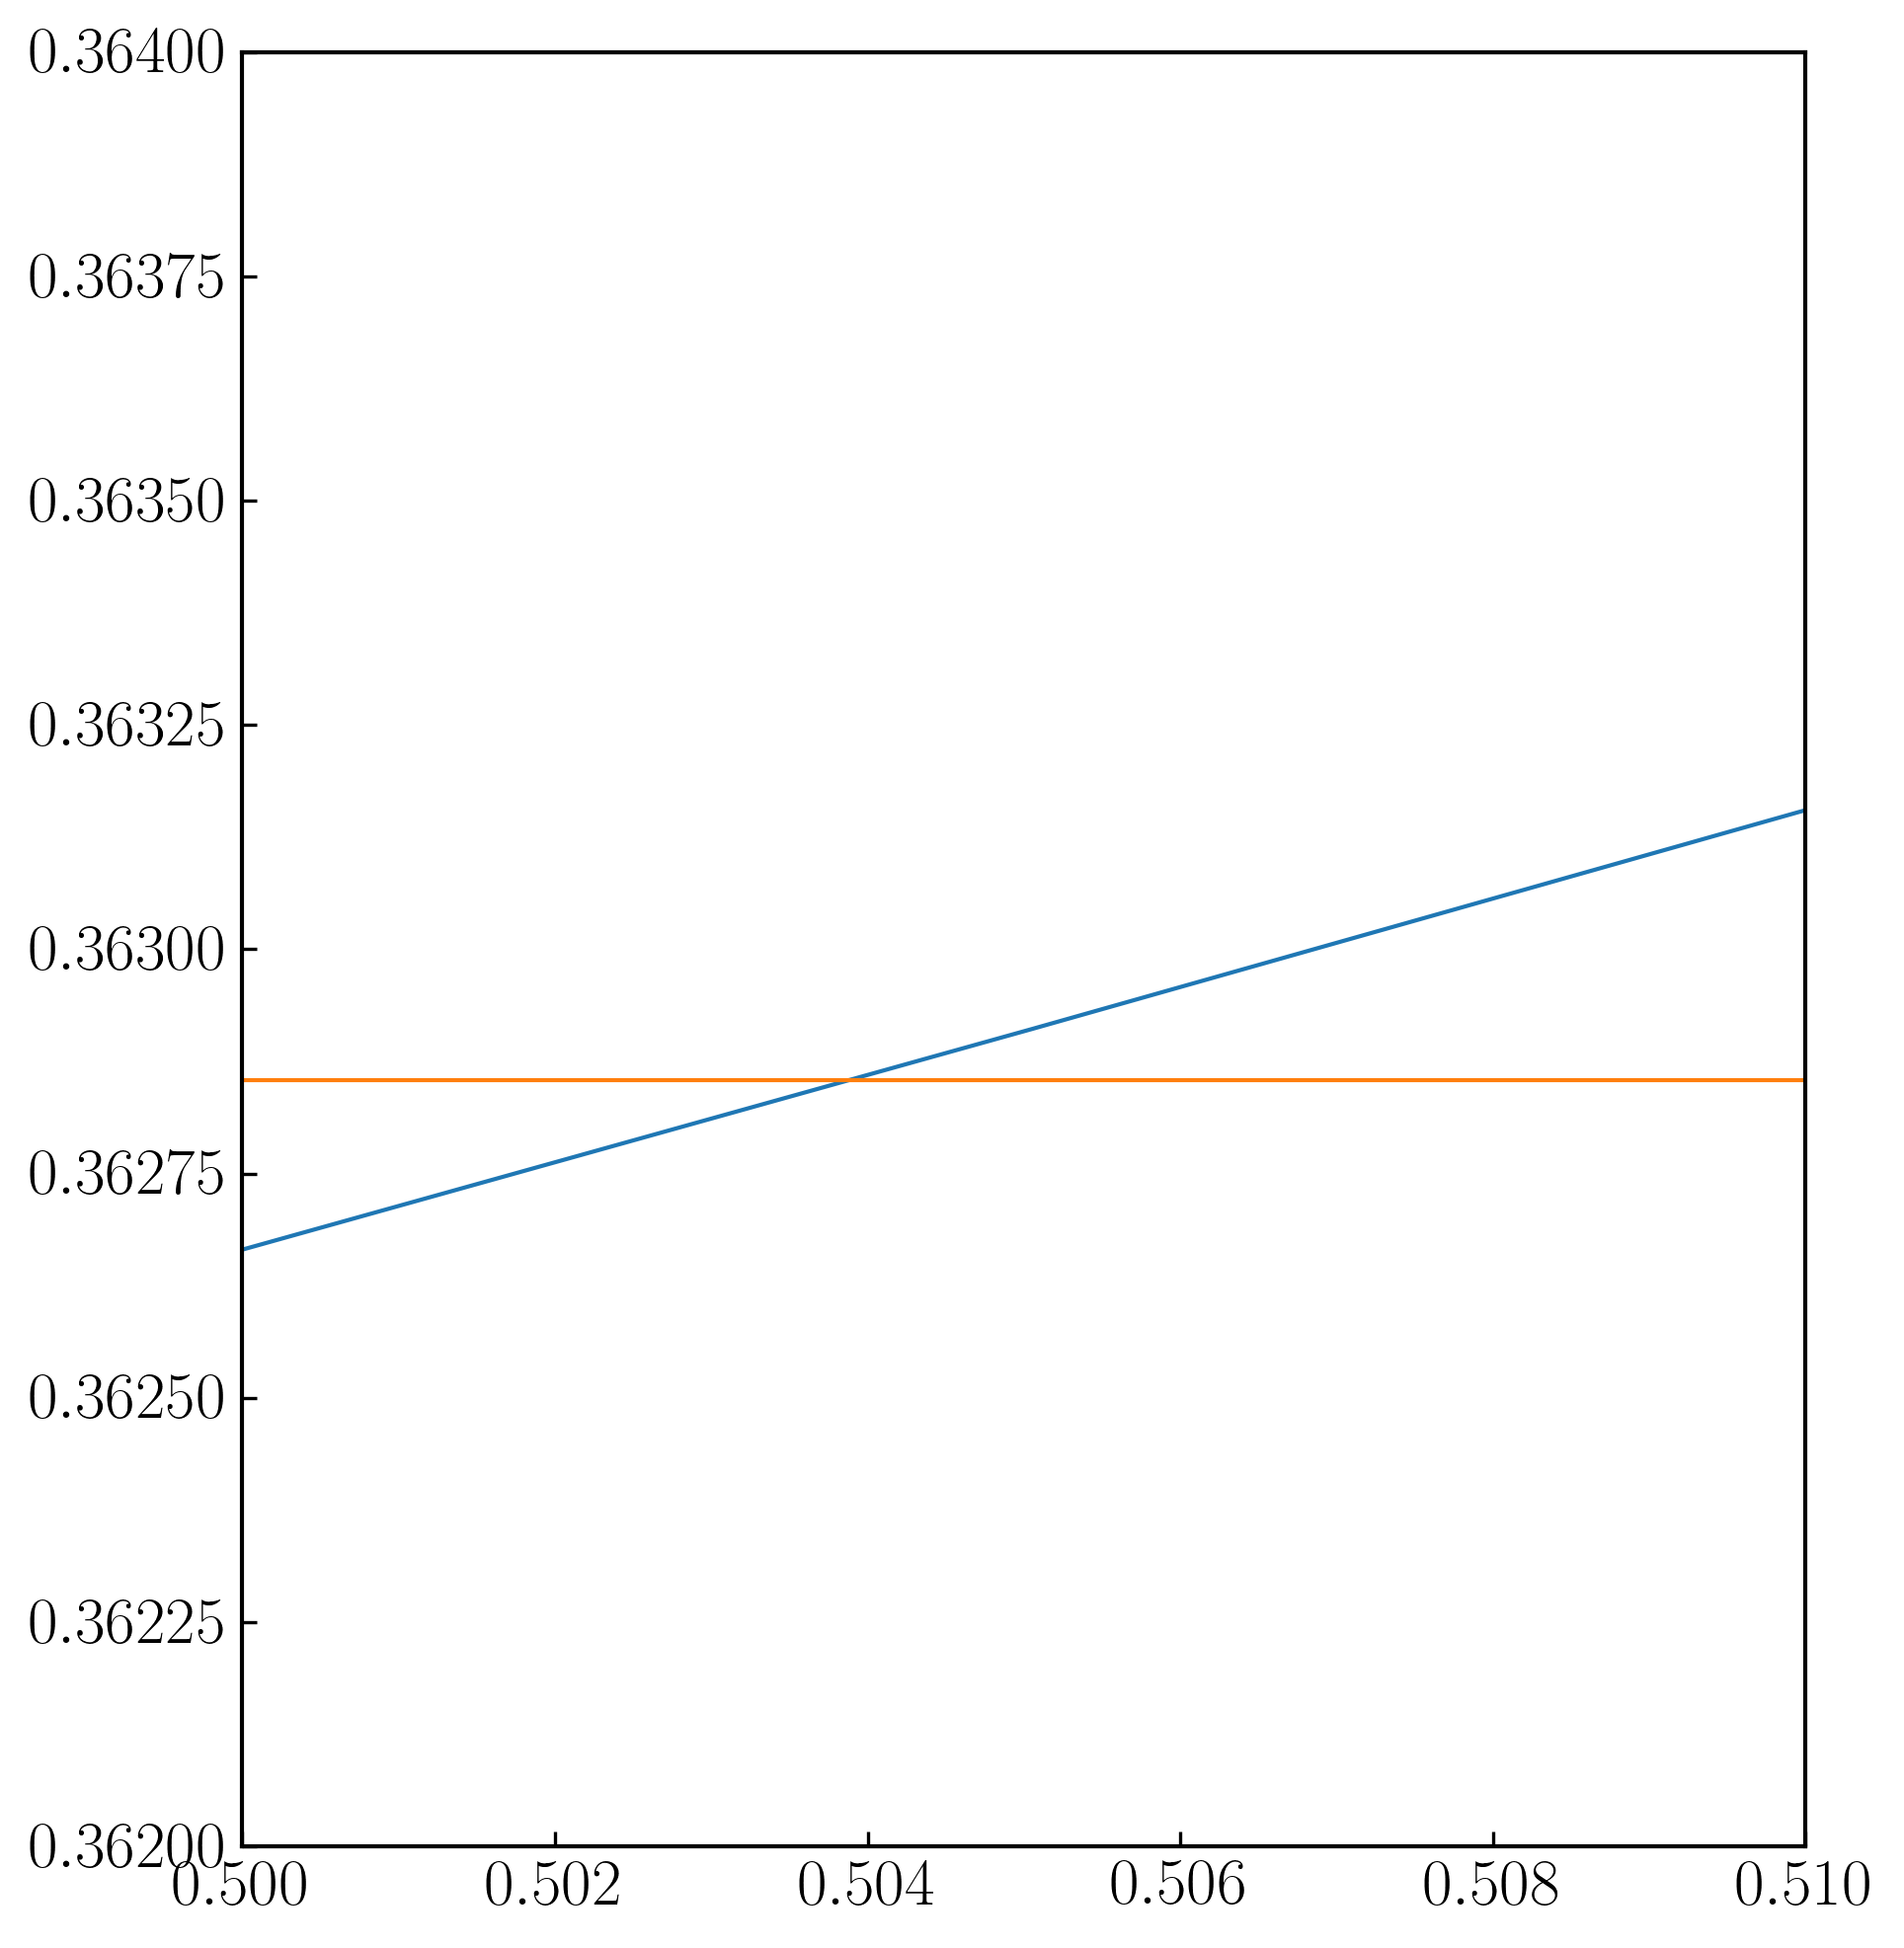

In [38]:
no405=1.691835
ne405=1.567071
no810=1.6601
ne810=1.544019

x=np.linspace(0,1,100)

plt.figure()
plt.plot(x,np.sin(x)**2/ne405**2+np.cos(x)**2/no405**2)
plt.plot(x,1/no810**2*x/x)
plt.xlim(0.5,0.51)
plt.ylim(0.362,0.364)

28.9*np.pi/180